# 2017 장애인 실태조사 지체장애 및 뇌병변장애 재활치료서비스 탐색

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-whitegrid')
plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [8]:
# 원본 데이터 불러오기
raw_df = pd.read_excel('pydata/2017 장애인실태조사_뇌병변장애.xlsx', sheet_name = 1)
len(raw_df)

# 뇌병변 중 뇌졸중과 뇌손상 불러오기
df = raw_df[(raw_df['주된 진단명(1)']==2) | (raw_df['주된 진단명(1)']==3)]
df.head()

,조사표 종류,가구원 일련번호(장애인),가구원 일련번호(응답자),조사지역(시도),응답자 유형,대리응답이유,장애유형확인1,장애유형확인2,장애유형확인3,개인번호,...,"보육,교육비","보호,간병비",재활기관이용료,통신비,"장애인보조기기 구입,유지비",부모사후 및 노후대비비,기타.4,월평균 총 추가비용,wg_p,ws_p
13,2,2,2,21,NaN,NaN,2,NaN,NaN,2,...,0,0,0,0,0,0,0,110,461.979521,1.176911
15,2,2,1,21,3.0,1.0,2,5.0,NaN,2,...,0,0,0,0,0,0,0,8,493.318225,1.256747
42,2,1,1,21,NaN,NaN,2,NaN,NaN,1,...,0,0,0,0,0,0,0,20,761.982341,1.671569
85,2,1,1,21,NaN,NaN,2,NaN,NaN,1,...,0,0,0,0,10,0,90,240,493.214478,1.081970
118,2,1,88,21,8.0,1.0,2,NaN,NaN,1,...,0,500,0,0,0,0,0,578,493.214478,1.081970


---
## 재활치료서비스 여부
### 뇌졸중(뇌경색, 뇌출혈)

In [147]:
stroke_care = df.loc[df['주된 진단명(1)'] == 2][['물리치료-이용여부', '작업치료-이용여부', '언어치료-이용여부', '음악치료-이용여부', '놀이치료-이용여부', '미술치료-이용여부', '심리행동치료-이용여부', '기타-이용여부']]
stroke_care.head()

,물리치료-이용여부,작업치료-이용여부,언어치료-이용여부,음악치료-이용여부,놀이치료-이용여부,미술치료-이용여부,심리행동치료-이용여부,기타-이용여부
13,1,2,2,2,2,2,2,2
15,2,2,2,2,2,2,2,2
42,1,2,2,2,2,2,2,2
85,1,2,2,2,2,2,2,2
118,1,2,2,2,2,2,2,2


In [148]:
# 각 컬럼명에서 필요한 문자열만 추출(치료명만 추출한다.)
new_stroke_col = []

stroke_care_lst = stroke_care.columns.tolist()
for i in range(len(stroke_care_lst)):
    new_stroke_col.append(stroke_care_lst[i][:len(stroke_care_lst[i])-5]) # 필요있는 부분만 출력

stroke_care.columns = new_stroke_col

stroke_care.head()

,물리치료,작업치료,언어치료,음악치료,놀이치료,미술치료,심리행동치료,기타
13,1,2,2,2,2,2,2,2
15,2,2,2,2,2,2,2,2
42,1,2,2,2,2,2,2,2
85,1,2,2,2,2,2,2,2
118,1,2,2,2,2,2,2,2


In [149]:
# 2-> 0 변경
stroke_care_lst = stroke_care.columns.tolist()
for i in range(len(stroke_care_lst)):
    stroke_care.replace({stroke_care_lst[i]: 2}, {stroke_care_lst[i]: 0}, inplace = True)
stroke_care.head()

,물리치료,작업치료,언어치료,음악치료,놀이치료,미술치료,심리행동치료,기타
13,1,0,0,0,0,0,0,0
15,0,0,0,0,0,0,0,0
42,1,0,0,0,0,0,0,0
85,1,0,0,0,0,0,0,0
118,1,0,0,0,0,0,0,0


In [150]:
# 1값에 해당 컬럼명 넣기 
for i in range(len(stroke_care.columns)): # 열 개수
    for j in range(len(stroke_care.index)): # 행 개수
        if stroke_care.iloc[j, i] == 0:
            pass
        else:
            stroke_care.iloc[j, i] = stroke_care.columns[i]
            
stroke_care.head()

,물리치료,작업치료,언어치료,음악치료,놀이치료,미술치료,심리행동치료,기타
13,물리치료,0,0,0,0,0,0,0
15,0,0,0,0,0,0,0,0
42,물리치료,0,0,0,0,0,0,0
85,물리치료,0,0,0,0,0,0,0
118,물리치료,0,0,0,0,0,0,0


In [151]:
# 행별로 각 값들을 특수문자('/')로 연결하여 새로운 컬럼 생성 및 불용어 처리
stroke_care_lst = stroke_care.columns.tolist()
stroke_care['Full Name'] = stroke_care[stroke_care_lst].apply(lambda row: '/'.join(row.values.astype(str)), axis=1)
stroke_care.head()

## Full name 변수의 불용어 처리(위의 결과에서 '0/'과 '/0' 문자열을 없앤다.)
import re

text1=[]
for i in range(len(stroke_care)):
    text1.append(re.sub('0/', "", stroke_care['Full Name'].tolist()[i])) # '0-' 제거
    
text2 = []
for i in range(len(text1)):
    text2.append(re.sub('/0', "", text1[i])) # '-0' 제거

In [152]:
text2

['물리치료',
 '0',
 '물리치료',
 '물리치료',
 '물리치료',
 '0',
 '물리치료',
 '0',
 '0',
 '0',
 '0',
 '물리치료',
 '물리치료',
 '0',
 '물리치료',
 '0',
 '0',
 '0',
 '0',
 '물리치료',
 '0',
 '물리치료',
 '0',
 '0',
 '0',
 '물리치료',
 '0',
 '0',
 '0',
 '물리치료',
 '0',
 '물리치료',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '물리치료',
 '물리치료',
 '0',
 '0',
 '0',
 '물리치료',
 '0',
 '0',
 '0',
 '0',
 '물리치료',
 '물리치료',
 '0',
 '0',
 '0',
 '물리치료',
 '물리치료',
 '0',
 '0',
 '0',
 '0',
 '0',
 '물리치료',
 '0',
 '물리치료',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '물리치료/작업치료/기타',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '물리치료',
 '0',
 '0',
 '0',
 '0',
 '물리치료',
 '0',
 '물리치료/작업치료',
 '물리치료',
 '물리치료',
 '0',
 '0',
 '물리치료',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '물리치료/작업치료',
 '0',
 '0',
 '0',
 '물리치료/언어치료',
 '0',
 '0',
 '0',
 '0',
 '물리치료',
 '0',
 '물리치료',
 '물리치료',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '물리치료',
 '물리치료/언어치료',
 '물리치료',
 '물리치료',
 '0',
 '0',
 '0',
 '물리치료',
 '물리치료',
 '물리치료',
 '0',
 '0',
 '물리치료',
 '0',
 '물리치료',
 '물리치료',
 '물리치료',
 '물리치료/기타',
 '0',
 '0

In [157]:
# 전처리 결과를 데이터 프레임 변경 및 그룹화하여 갯수 파악
stroke_group_care = pd.DataFrame(text2)
stroke_group_care.rename(columns={0: 'name'}, inplace=True)
stroke_group_care = stroke_group_care.groupby('name')[['name']].count().add_suffix('_Count').reset_index().sort_values('name_Count', ascending = False)
stroke_group_care.rename(columns={'name':'cares', 'name_Count': 'counts'}, inplace=True)

In [170]:
# 0 -> '이용하지 않음' 변경
stroke_group_care.replace({'cares': '0'}, {'cares': '이용하지 않음'}, inplace=True)
stroke_group_care.head()

,cares,counts
0,이용하지 않음,309
1,물리치료,140
4,물리치료/작업치료,9
2,물리치료/기타,5
3,물리치료/언어치료,3


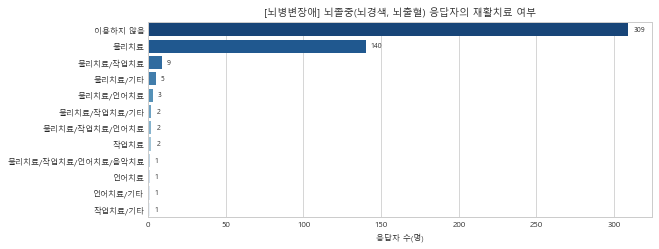

In [176]:
# 최종 시각화
fig, ax = plt.subplots(1,1)
fig.set_size_inches(10, 4)

palette = sns.color_palette("Blues", n_colors=12) 
palette.reverse() # 색상 진한 정도 거꾸로

splot = sns.barplot(data = stroke_group_care, y = 'cares', x='counts', palette=palette)

for p in splot.patches:
    ax.annotate("%.0f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center", size = 7)

ax.set_title('[뇌병변장애] 뇌졸중(뇌경색, 뇌출혈) 응답자의 재활치료 여부', size = 10)
ax.set_xlabel('응답자 수(명)', size = 8)
ax.set_ylabel('')
plt.yticks(size = 8)
plt.xticks(size = 8)

plt.gcf().subplots_adjust(left=0.20) # 왼쪽 여백 조정
plt.gcf().subplots_adjust(bottom=0.20) # 왼쪽 여백 조정
plt.savefig("pyvisual/뇌병변장애/[뇌병변장애] 뇌졸중(뇌경색, 뇌출혈) 응답자의 재활치료 여부.png", dpi=300)
plt.show()

### 뇌손상

In [178]:
damage_care = df.loc[df['주된 진단명(1)'] == 3][['물리치료-이용여부', '작업치료-이용여부', '언어치료-이용여부', '음악치료-이용여부', '놀이치료-이용여부', '미술치료-이용여부', '심리행동치료-이용여부', '기타-이용여부']]
damage_care.head()

,물리치료-이용여부,작업치료-이용여부,언어치료-이용여부,음악치료-이용여부,놀이치료-이용여부,미술치료-이용여부,심리행동치료-이용여부,기타-이용여부
228,2,2,2,2,2,2,2,2
229,2,2,2,2,2,2,2,2
236,2,2,2,2,2,2,2,2
238,2,2,2,2,2,2,2,2
239,2,2,2,2,2,2,2,2


In [179]:
# 각 컬럼명에서 필요한 문자열만 추출(치료명만 추출한다.)
new_damage_col = []

damage_care_lst = damage_care.columns.tolist()
for i in range(len(damage_care_lst)):
    new_damage_col.append(damage_care_lst[i][:len(damage_care_lst[i])-5]) # 필요있는 부분만 출력

damage_care.columns = new_damage_col

damage_care.head()

# 2-> 0 변경
damage_care_lst = damage_care.columns.tolist()
for i in range(len(damage_care_lst)):
    damage_care.replace({damage_care_lst[i]: 2}, {damage_care_lst[i]: 0}, inplace = True)
damage_care.head()

# 1값에 해당 컬럼명 넣기 
for i in range(len(damage_care.columns)): # 열 개수
    for j in range(len(damage_care.index)): # 행 개수
        if damage_care.iloc[j, i] == 0:
            pass
        else:
            damage_care.iloc[j, i] = damage_care.columns[i]
            
damage_care.head()

# 행별로 각 값들을 특수문자('/')로 연결하여 새로운 컬럼 생성 및 불용어 처리
damage_care_lst = damage_care.columns.tolist()
damage_care['Full Name'] = damage_care[stroke_care_lst].apply(lambda row: '/'.join(row.values.astype(str)), axis=1)
damage_care.head()

## Full name 변수의 불용어 처리(위의 결과에서 '0/'과 '/0' 문자열을 없앤다.)
import re

text3=[]
for i in range(len(damage_care)):
    text3.append(re.sub('0/', "", damage_care['Full Name'].tolist()[i])) # '0-' 제거
    
text4 = []
for i in range(len(text3)):
    text4.append(re.sub('/0', "", text3[i])) # '-0' 제거

# 전처리 결과를 데이터 프레임 변경 및 그룹화하여 갯수 파악
damage_group_care = pd.DataFrame(text4)
damage_group_care.rename(columns={0: 'name'}, inplace=True)
damage_group_care = damage_group_care.groupby('name')[['name']].count().add_suffix('_Count').reset_index().sort_values('name_Count', ascending = False)
damage_group_care.rename(columns={'name':'cares', 'name_Count': 'counts'}, inplace=True)

# 0 -> '이용하지 않음' 변경
damage_group_care.replace({'cares': '0'}, {'cares': '이용하지 않음'}, inplace=True)
damage_group_care.head()

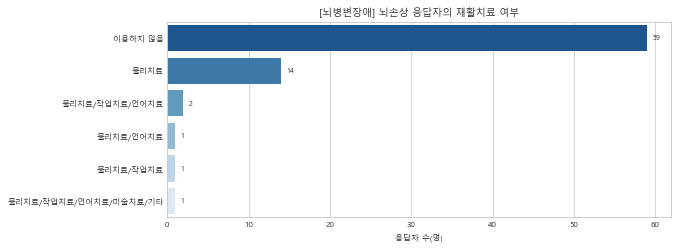

In [188]:
# 최종 시각화
fig, ax = plt.subplots(1,1)
fig.set_size_inches(10, 4)

palette = sns.color_palette("Blues", n_colors=6) 
palette.reverse() # 색상 진한 정도 거꾸로

splot = sns.barplot(data = damage_group_care, y = 'cares', x='counts', palette=palette)

for p in splot.patches:
    ax.annotate("%.0f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center", size = 7)

ax.set_title('[뇌병변장애] 뇌손상 응답자의 재활치료 여부', size = 10)
ax.set_xlabel('응답자 수(명)', size = 8)
ax.set_ylabel('')
plt.yticks(size = 8)
plt.xticks(size = 8)

plt.gcf().subplots_adjust(left=0.20) # 왼쪽 여백 조정
plt.gcf().subplots_adjust(bottom=0.20) # 왼쪽 여백 조정
plt.savefig("pyvisual/뇌병변장애/[뇌병변장애] 뇌손상 응답자의 재활치료 여부.png", dpi=300)
plt.show()

### 지체장애인

In [190]:
phy_care = raw_df[raw_df['지체장애여부']==1][['물리치료-이용여부', '작업치료-이용여부', '언어치료-이용여부', '음악치료-이용여부', '놀이치료-이용여부', '미술치료-이용여부', '심리행동치료-이용여부', '기타-이용여부']]
phy_care

,물리치료-이용여부,작업치료-이용여부,언어치료-이용여부,음악치료-이용여부,놀이치료-이용여부,미술치료-이용여부,심리행동치료-이용여부,기타-이용여부
0,2,2,2,2,2,2,2,2
1,1,2,2,2,2,2,2,2
2,2,2,2,2,2,2,2,2
3,2,2,2,2,2,2,2,2
8,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...
6542,1,2,2,2,2,2,2,2
6543,2,2,2,2,2,2,2,2
6544,2,2,2,2,2,2,2,2
6545,2,2,2,2,2,2,2,2


In [191]:
# 각 컬럼명에서 필요한 문자열만 추출(치료명만 추출한다.)
new_phy_col = []

phy_care_lst = phy_care.columns.tolist()
for i in range(len(phy_care_lst)):
    new_phy_col.append(damage_care_lst[i][:len(phy_care_lst[i])-5]) # 필요있는 부분만 출력

phy_care.columns = new_phy_col

damage_care.head()

# 2-> 0 변경
phy_care_lst = phy_care.columns.tolist()
for i in range(len(phy_care_lst)):
    phy_care.replace({phy_care_lst[i]: 2}, {phy_care_lst[i]: 0}, inplace = True)
phy_care.head()

# 1값에 해당 컬럼명 넣기 
for i in range(len(phy_care.columns)): # 열 개수
    for j in range(len(phy_care.index)): # 행 개수
        if phy_care.iloc[j, i] == 0:
            pass
        else:
            phy_care.iloc[j, i] = phy_care.columns[i]
            
phy_care.head()

# 행별로 각 값들을 특수문자('/')로 연결하여 새로운 컬럼 생성 및 불용어 처리
phy_care_lst = phy_care.columns.tolist()
phy_care['Full Name'] = phy_care[phy_care_lst].apply(lambda row: '/'.join(row.values.astype(str)), axis=1)
phy_care.head()

## Full name 변수의 불용어 처리(위의 결과에서 '0/'과 '/0' 문자열을 없앤다.)
import re

text5=[]
for i in range(len(phy_care)):
    text5.append(re.sub('0/', "", phy_care['Full Name'].tolist()[i])) # '0-' 제거
    
text6 = []
for i in range(len(text5)):
    text6.append(re.sub('/0', "", text5[i])) # '-0' 제거

# 전처리 결과를 데이터 프레임 변경 및 그룹화하여 갯수 파악
phy_group_care = pd.DataFrame(text6)
phy_group_care.rename(columns={0: 'name'}, inplace=True)
phy_group_care = phy_group_care.groupby('name')[['name']].count().add_suffix('_Count').reset_index().sort_values('name_Count', ascending = False)
phy_group_care.rename(columns={'name':'cares', 'name_Count': 'counts'}, inplace=True)

# 0 -> '이용하지 않음' 변경
phy_group_care.replace({'cares': '0'}, {'cares': '이용하지 않음'}, inplace=True)
phy_group_care.head()

,cares,counts
0,이용하지 않음,2230
3,물리치료,1037
5,물리치료/작업치료,9
1,기타,4
4,물리치료/기타,4


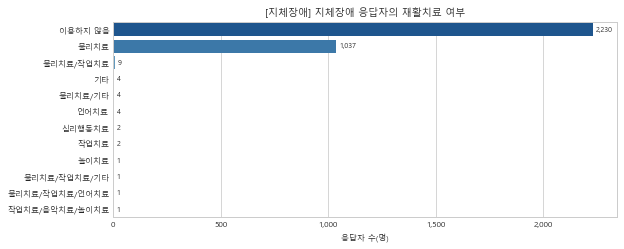

In [213]:
# 최종 시각화
fig, ax = plt.subplots(1,1)
fig.set_size_inches(10, 4)

palette = sns.color_palette("Blues", n_colors=6) 
palette.reverse() # 색상 진한 정도 거꾸로

splot = sns.barplot(data = phy_group_care, y = 'cares', x='counts', palette=palette)

for p in splot.patches:
    ax.annotate("{:,}".format(int(p.get_width())), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(3, 0), textcoords='offset points', ha="left", va="center", size = 7)    
    
ax.set_title('[지체장애] 지체장애 응답자의 재활치료 여부', size = 10)
ax.set_xlabel('응답자 수(명)', size = 8)
ax.set_ylabel('')
plt.yticks(size = 8)
plt.xticks(size = 8)

### 천단위 콤마 표시(x축)
import matplotlib.ticker as tkr
def xfunc(x, pos):
    s = '{:0,d}'.format(int(x))
    return s
x_format = tkr.FuncFormatter(xfunc)
ax.xaxis.set_major_formatter(x_format)

plt.gcf().subplots_adjust(left=0.20) # 왼쪽 여백 조정
plt.gcf().subplots_adjust(bottom=0.20) # 왼쪽 여백 조정
plt.savefig("pyvisual/지체장애/[지체장애]지체장애 응답자의 재활치료 여부.png", dpi=300)
plt.show()

### 지체장애(절단)

In [281]:
cut_care = raw_df[raw_df['지체장애여부']==1][(raw_df['가장 불편한부위']>=11)&(raw_df['가장 불편한부위']<=19)][['물리치료-이용여부', '작업치료-이용여부', '언어치료-이용여부', '음악치료-이용여부', '놀이치료-이용여부', '미술치료-이용여부', '심리행동치료-이용여부', '기타-이용여부']]
cut_care.head() # 436개 행 존재

<ipython-input-281-a444b6bff25c>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cut_care = raw_df[raw_df['지체장애여부']==1][(raw_df['가장 불편한부위']>=11)&(raw_df['가장 불편한부위']<=19)][['물리치료-이용여부', '작업치료-이용여부', '언어치료-이용여부', '음악치료-이용여부', '놀이치료-이용여부', '미술치료-이용여부', '심리행동치료-이용여부', '기타-이용여부']]


,물리치료-이용여부,작업치료-이용여부,언어치료-이용여부,음악치료-이용여부,놀이치료-이용여부,미술치료-이용여부,심리행동치료-이용여부,기타-이용여부
1,1,2,2,2,2,2,2,2
16,1,2,2,2,2,2,2,2
53,2,2,2,2,2,2,2,2
60,2,2,2,2,2,2,2,2
75,2,2,2,2,2,2,2,2


In [282]:
# 각 컬럼명에서 필요한 문자열만 추출(치료명만 추출한다.)
new_cut_col = []

cut_care_lst = cut_care.columns.tolist()
for i in range(len(cut_care_lst)):
    new_cut_col.append(cut_care_lst[i][:len(cut_care_lst[i])-5]) # 필요있는 부분만 출력

cut_care.columns = new_cut_col

cut_care.head()

# 2-> 0 변경
cut_care_lst = cut_care.columns.tolist()
for i in range(len(cut_care_lst)):
    cut_care.replace({cut_care_lst[i]: 2}, {cut_care_lst[i]: 0}, inplace = True)
cut_care.head()

# 1값에 해당 컬럼명 넣기 
for i in range(len(cut_care.columns)): # 열 개수
    for j in range(len(cut_care.index)): # 행 개수
        if cut_care.iloc[j, i] == 0:
            pass
        else:
            cut_care.iloc[j, i] = cut_care.columns[i]
            

cut_care.head()

# 행별로 각 값들을 특수문자('/')로 연결하여 새로운 컬럼 생성 및 불용어 처리
cut_care['Full Name'] = cut_care[cut_care_lst].apply(lambda row: '/'.join(row.values.astype(str)), axis=1)
cut_care.head()

## Full name 변수의 불용어 처리(위의 결과에서 '0/'과 '/0' 문자열을 없앤다.)
import re

text7=[]
for i in range(len(cut_care)):
    text7.append(re.sub('0/', "", cut_care['Full Name'].tolist()[i])) # '0-' 제거
    
text8 = []
for i in range(len(text7)):
    text8.append(re.sub('/0', "", text7[i])) # '-0' 제거

# 전처리 결과를 데이터 프레임 변경 및 그룹화하여 갯수 파악
cut_group_care = pd.DataFrame(text8)
cut_group_care.rename(columns={0: 'name'}, inplace=True)
cut_group_care = cut_group_care.groupby('name')[['name']].count().add_suffix('_Count').reset_index().sort_values('name_Count', ascending = False)
cut_group_care.rename(columns={'name':'cares', 'name_Count': 'counts'}, inplace=True)

# 0 -> '이용하지 않음' 변경
cut_group_care.replace({'cares': '0'}, {'cares': '이용하지 않음'}, inplace=True)
cut_group_care.head()

,cares,counts
0,이용하지 않음,363
2,물리치료,71
1,기타,1
3,작업치료,1


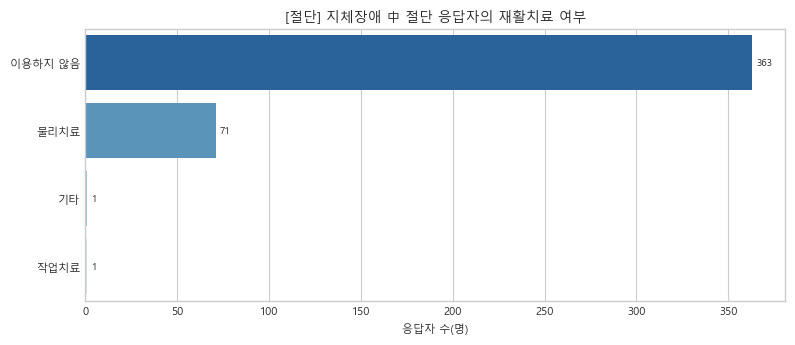

In [315]:
# 최종 시각화
fig, ax = plt.subplots(1,1)
fig.set_size_inches(10, 4)

palette = sns.color_palette("Blues", n_colors=4) 
palette.reverse() # 색상 진한 정도 거꾸로

splot = sns.barplot(data = cut_group_care, y = 'cares', x='counts', palette=palette)

for p in splot.patches:
    ax.annotate("{:,}".format(int(p.get_width())), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(3, 0), textcoords='offset points', ha="left", va="center", size = 7)    
    
ax.set_title('[절단] 지체장애 中 절단 응답자의 재활치료 여부', size = 10)
ax.set_xlabel('응답자 수(명)', size = 8)
ax.set_ylabel('')
plt.yticks(size = 8)
plt.xticks(size = 8)

### 천단위 콤마 표시(x축)
import matplotlib.ticker as tkr
def xfunc(x, pos):
    s = '{:0,d}'.format(int(x))
    return s
x_format = tkr.FuncFormatter(xfunc)
ax.xaxis.set_major_formatter(x_format)

plt.gcf().subplots_adjust(left=0.20) # 왼쪽 여백 조정
plt.gcf().subplots_adjust(bottom=0.20) # 왼쪽 여백 조정
plt.savefig("pyvisual/지체장애/[절단]지체장애 中 절단 응답자의 재활치료 여부.png", dpi=300)
plt.show()

### 지체장애(마비)

In [296]:
paralysis_care = raw_df[raw_df['지체장애여부']==1][(raw_df['가장 불편한부위']>=21)&(raw_df['가장 불편한부위']<=27)][['물리치료-이용여부', '작업치료-이용여부', '언어치료-이용여부', '음악치료-이용여부', '놀이치료-이용여부', '미술치료-이용여부', '심리행동치료-이용여부', '기타-이용여부']]
paralysis_care.head() # 417개 행 존재

<ipython-input-296-bf1564b9ec90>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  paralysis_care = raw_df[raw_df['지체장애여부']==1][(raw_df['가장 불편한부위']>=21)&(raw_df['가장 불편한부위']<=27)][['물리치료-이용여부', '작업치료-이용여부', '언어치료-이용여부', '음악치료-이용여부', '놀이치료-이용여부', '미술치료-이용여부', '심리행동치료-이용여부', '기타-이용여부']]


,물리치료-이용여부,작업치료-이용여부,언어치료-이용여부,음악치료-이용여부,놀이치료-이용여부,미술치료-이용여부,심리행동치료-이용여부,기타-이용여부
34,2,2,2,2,2,2,2,2
39,2,2,2,2,2,2,2,2
44,2,2,2,2,2,2,2,2
57,2,2,2,2,2,2,2,2
79,1,2,2,2,2,2,2,2


In [297]:
# 각 컬럼명에서 필요한 문자열만 추출(치료명만 추출한다.)
new_paralysis_col = []

paralysis_care_lst = paralysis_care.columns.tolist()
for i in range(len(paralysis_care_lst)):
    new_paralysis_col.append(paralysis_care_lst[i][:len(paralysis_care_lst[i])-5]) # 필요있는 부분만 출력

paralysis_care.columns = new_paralysis_col

paralysis_care.head()

# 2-> 0 변경
paralysis_care_lst = paralysis_care.columns.tolist()
for i in range(len(cut_care_lst)):
    paralysis_care.replace({cut_care_lst[i]: 2}, {cut_care_lst[i]: 0}, inplace = True)
paralysis_care.head()

# 1값에 해당 컬럼명 넣기 
for i in range(len(paralysis_care.columns)): # 열 개수
    for j in range(len(paralysis_care.index)): # 행 개수
        if paralysis_care.iloc[j, i] == 0:
            pass
        else:
            paralysis_care.iloc[j, i] = paralysis_care.columns[i]
            
cut_care.head()

# 행별로 각 값들을 특수문자('/')로 연결하여 새로운 컬럼 생성 및 불용어 처리
paralysis_care['Full Name'] = paralysis_care[cut_care_lst].apply(lambda row: '/'.join(row.values.astype(str)), axis=1)
paralysis_care.head()

## Full name 변수의 불용어 처리(위의 결과에서 '0/'과 '/0' 문자열을 없앤다.)
import re

text9=[]
for i in range(len(paralysis_care)):
    text9.append(re.sub('0/', "", paralysis_care['Full Name'].tolist()[i])) # '0-' 제거
    
text10 = []
for i in range(len(text9)):
    text10.append(re.sub('/0', "", text9[i])) # '-0' 제거

# 전처리 결과를 데이터 프레임 변경 및 그룹화하여 갯수 파악
paralysis_group_care = pd.DataFrame(text10)
paralysis_group_care.rename(columns={0: 'name'}, inplace=True)
paralysis_group_care = paralysis_group_care.groupby('name')[['name']].count().add_suffix('_Count').reset_index().sort_values('name_Count', ascending = False)
paralysis_group_care.rename(columns={'name':'cares', 'name_Count': 'counts'}, inplace=True)

# 0 -> '이용하지 않음' 변경
paralysis_group_care.replace({'cares': '0'}, {'cares': '이용하지 않음'}, inplace=True)
paralysis_group_care.head()

,cares,counts
0,이용하지 않음,322
2,물리치료,82
3,물리치료/작업치료,6
6,언어치료,3
1,기타,1


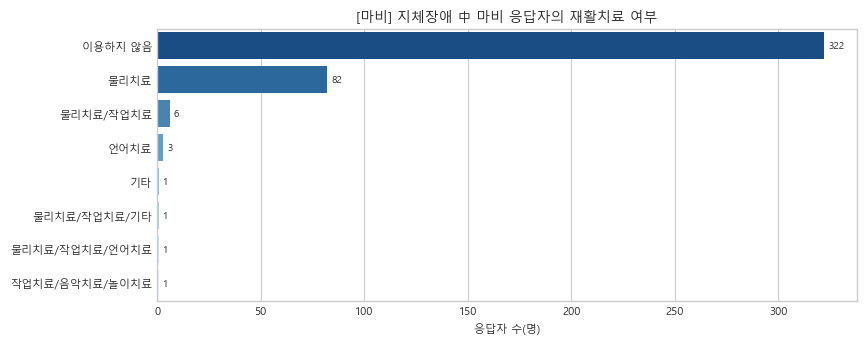

In [314]:
# 최종 시각화
fig, ax = plt.subplots(1,1)
fig.set_size_inches(10, 4)

palette = sns.color_palette("Blues", n_colors=8) 
palette.reverse() # 색상 진한 정도 거꾸로

splot = sns.barplot(data = paralysis_group_care, y = 'cares', x='counts', palette=palette)

for p in splot.patches:
    ax.annotate("{:,}".format(int(p.get_width())), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(3, 0), textcoords='offset points', ha="left", va="center", size = 7)    
    
ax.set_title('[마비] 지체장애 中 마비 응답자의 재활치료 여부', size = 10)
ax.set_xlabel('응답자 수(명)', size = 8)
ax.set_ylabel('')
plt.yticks(size = 8)
plt.xticks(size = 8)

### 천단위 콤마 표시(x축)
import matplotlib.ticker as tkr
def xfunc(x, pos):
    s = '{:0,d}'.format(int(x))
    return s
x_format = tkr.FuncFormatter(xfunc)
ax.xaxis.set_major_formatter(x_format)

plt.gcf().subplots_adjust(left=0.20) # 왼쪽 여백 조정
plt.gcf().subplots_adjust(bottom=0.20) # 왼쪽 여백 조정
plt.savefig("pyvisual/지체장애/[마비]지체장애 中 마비 응답자의 재활치료 여부.png", dpi=300)
plt.show()

### 지체장애(관절장애)

In [305]:
articulation_care = raw_df[raw_df['지체장애여부']==1][(raw_df['가장 불편한부위']>=31)&(raw_df['가장 불편한부위']<=38)][['물리치료-이용여부', '작업치료-이용여부', '언어치료-이용여부', '음악치료-이용여부', '놀이치료-이용여부', '미술치료-이용여부', '심리행동치료-이용여부', '기타-이용여부']]
articulation_care.head() # 2258개 행 존재

<ipython-input-305-2062b00d757c>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  articulation_care = raw_df[raw_df['지체장애여부']==1][(raw_df['가장 불편한부위']>=31)&(raw_df['가장 불편한부위']<=38)][['물리치료-이용여부', '작업치료-이용여부', '언어치료-이용여부', '음악치료-이용여부', '놀이치료-이용여부', '미술치료-이용여부', '심리행동치료-이용여부', '기타-이용여부']]


,물리치료-이용여부,작업치료-이용여부,언어치료-이용여부,음악치료-이용여부,놀이치료-이용여부,미술치료-이용여부,심리행동치료-이용여부,기타-이용여부
0,2,2,2,2,2,2,2,2
2,2,2,2,2,2,2,2,2
3,2,2,2,2,2,2,2,2
8,2,2,2,2,2,2,2,2
11,2,2,2,2,2,2,2,2


In [306]:
# 각 컬럼명에서 필요한 문자열만 추출(치료명만 추출한다.)
new_articulation_col = []

articulation_care_lst = articulation_care.columns.tolist()
for i in range(len(articulation_care_lst)):
    new_articulation_col.append(articulation_care_lst[i][:len(articulation_care_lst[i])-5]) # 필요있는 부분만 출력

articulation_care.columns = new_articulation_col

paralysis_care.head()

# 2-> 0 변경
articulation_care_lst = articulation_care.columns.tolist()
for i in range(len(articulation_care_lst)):
    articulation_care.replace({articulation_care_lst[i]: 2}, {articulation_care_lst[i]: 0}, inplace = True)
articulation_care.head()

# 1값에 해당 컬럼명 넣기 
for i in range(len(articulation_care.columns)): # 열 개수
    for j in range(len(articulation_care.index)): # 행 개수
        if articulation_care.iloc[j, i] == 0:
            pass
        else:
            articulation_care.iloc[j, i] = articulation_care.columns[i]
            
articulation_care.head()

# 행별로 각 값들을 특수문자('/')로 연결하여 새로운 컬럼 생성 및 불용어 처리
articulation_care['Full Name'] = articulation_care[cut_care_lst].apply(lambda row: '/'.join(row.values.astype(str)), axis=1)
articulation_care.head()

## Full name 변수의 불용어 처리(위의 결과에서 '0/'과 '/0' 문자열을 없앤다.)
import re

text11=[]
for i in range(len(articulation_care)):
    text11.append(re.sub('0/', "", articulation_care['Full Name'].tolist()[i])) # '0-' 제거
    
text12 = []
for i in range(len(text11)):
    text12.append(re.sub('/0', "", text11[i])) # '-0' 제거

# 전처리 결과를 데이터 프레임 변경 및 그룹화하여 갯수 파악
articulation_group_care = pd.DataFrame(text12)
articulation_group_care.rename(columns={0: 'name'}, inplace=True)
articulation_group_care = articulation_group_care.groupby('name')[['name']].count().add_suffix('_Count').reset_index().sort_values('name_Count', ascending = False)
articulation_group_care.rename(columns={'name':'cares', 'name_Count': 'counts'}, inplace=True)

# 0 -> '이용하지 않음' 변경
articulation_group_care.replace({'cares': '0'}, {'cares': '이용하지 않음'}, inplace=True)
articulation_group_care.head()

,cares,counts
0,이용하지 않음,1406
3,물리치료,840
4,물리치료/기타,4
5,물리치료/작업치료,3
1,기타,2


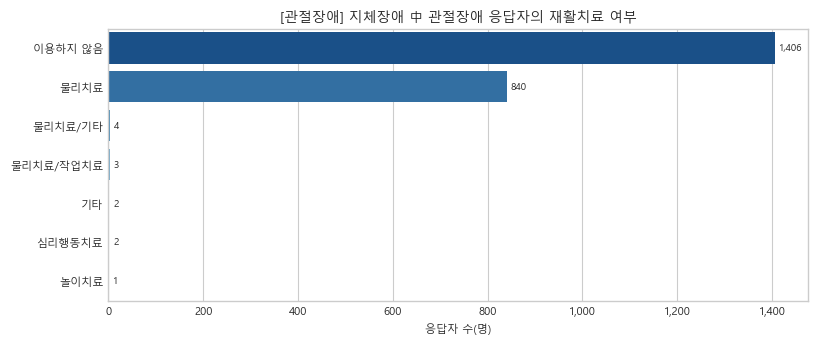

In [313]:
# 최종 시각화
fig, ax = plt.subplots(1,1)
fig.set_size_inches(10, 4)

palette = sns.color_palette("Blues", n_colors=7) 
palette.reverse() # 색상 진한 정도 거꾸로

splot = sns.barplot(data = articulation_group_care, y = 'cares', x='counts', palette=palette)

for p in splot.patches:
    ax.annotate("{:,}".format(int(p.get_width())), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(3, 0), textcoords='offset points', ha="left", va="center", size = 7)    
    
ax.set_title('[관절장애] 지체장애 中 관절장애 응답자의 재활치료 여부', size = 10)
ax.set_xlabel('응답자 수(명)', size = 8)
ax.set_ylabel('')
plt.yticks(size = 8)
plt.xticks(size = 8)

### 천단위 콤마 표시(x축)
import matplotlib.ticker as tkr
def xfunc(x, pos):
    s = '{:0,d}'.format(int(x))
    return s
x_format = tkr.FuncFormatter(xfunc)
ax.xaxis.set_major_formatter(x_format)

plt.gcf().subplots_adjust(left=0.20) # 왼쪽 여백 조정
plt.gcf().subplots_adjust(bottom=0.20) # 왼쪽 여백 조정
plt.savefig("pyvisual/지체장애/[관절장애]지체장애 中 관절장애 응답자의 재활치료 여부.png", dpi=300)
plt.show()

---
## 재활치료서비스 여부 파레토 차트
### 뇌졸중(뇌경색, 뇌출혈)

In [233]:
stroke_care = df.loc[df['주된 진단명(1)'] == 2][['물리치료-이용여부', '작업치료-이용여부', '언어치료-이용여부', '음악치료-이용여부', '놀이치료-이용여부', '미술치료-이용여부', '심리행동치료-이용여부', '기타-이용여부']]

# 각 컬럼명에서 필요한 문자열만 추출(치료명만 추출한다.)
new_stroke_col = []

stroke_care_lst = stroke_care.columns.tolist()
for i in range(len(stroke_care_lst)):
    new_stroke_col.append(stroke_care_lst[i][:len(stroke_care_lst[i])-5]) # 필요있는 부분만 출력
stroke_care.columns = new_stroke_col

# 2-> 0 변경
stroke_care_lst = stroke_care.columns.tolist()
for i in range(len(stroke_care_lst)):
    stroke_care.replace({stroke_care_lst[i]: 2}, {stroke_care_lst[i]: 0}, inplace = True)

stroke_care_pareto = pd.DataFrame(stroke_care.sum(axis = 0)).reset_index()

# 변수명 변경
stroke_care_pareto.rename(columns={'index':'care', 0:'n'}, inplace=True)
stroke_care_pareto.sort_values(by = 'n', ascending=False, inplace=True)
stroke_care_pareto.head()

stroke_care_pareto["pct"] = round(stroke_care_pareto["n"].cumsum()/stroke_care_pareto.n.sum()*100, 2)
stroke_care_pareto

,care,n,pct
0,물리치료,162,82.23
1,작업치료,17,90.86
7,기타,9,95.43
2,언어치료,8,99.49
3,음악치료,1,100.00
4,놀이치료,0,100.00
5,미술치료,0,100.00
6,심리행동치료,0,100.00


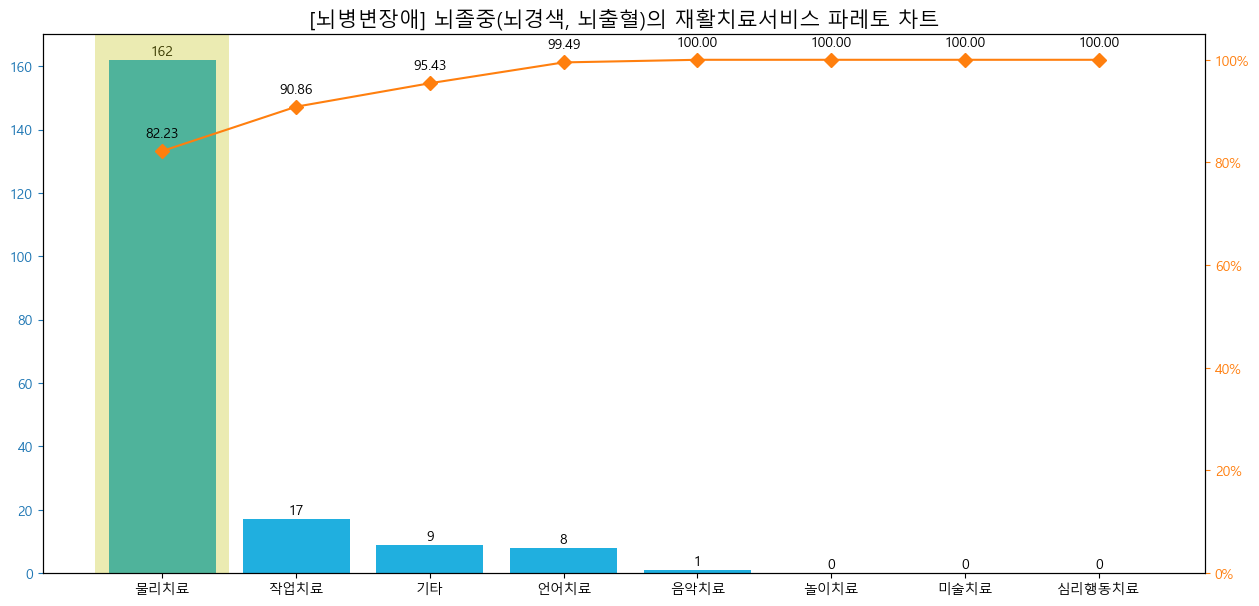

In [247]:
from matplotlib.ticker import PercentFormatter
plt.style.use("default") # 그래프 배경 서식 설정
plt.rc('font', family = 'Malgun Gothic') # 글꼴 설정
plt.rcParams['axes.unicode_minus'] = False # 음수 기호 표시

fig, ax = plt.subplots() # 서브 플롯 설정
fig.set_size_inches(15, 7) # 플롯 크기 설정

## ax1(barchart)
splot = sns.barplot(data=stroke_care_pareto, x = 'care', y = 'n', color = 'deepskyblue') # barchart 생성

ax.set_title('[뇌병변장애] 뇌졸중(뇌경색, 뇌출혈)의 재활치료서비스 파레토 차트', size = 15) # 제목
ax.set_xlabel('') # x축 이름 
ax.set_ylabel('') # y축 이름
# plt.xticks(rotation=90) # x축 라벨 회전
ax.tick_params(axis="y", colors="C0") # y축 눈금 색깔

for bar in splot.patches: # value label 생성
    ax.annotate("{:,}".format(int(bar.get_height())), # 천단위 콤마 표시
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 6),
                   textcoords='offset points')
    
## ax2(line chart)
ax2 = ax.twinx()
splot2 = ax2.plot(stroke_care_pareto['care'], stroke_care_pareto["pct"], color="C1", marker="D", ms=7) # line chart 생성
ax2.yaxis.set_major_formatter(PercentFormatter())

for x, y in zip(stroke_care_pareto['care'], stroke_care_pareto['pct']): # value label 생성
    label = "{:.2f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

### 천단위 콤마 표시(y축)
import matplotlib.ticker as tkr
def yfunc(y, pos):
    s = '{:0,d}'.format(int(y))
    return s
y_format = tkr.FuncFormatter(yfunc)
ax.yaxis.set_major_formatter(y_format) 

ax2.set_ylim([0, 105]) # y축 눈금 범위
ax2.tick_params(axis="y", colors="C1") # y축 눈금 색깔
plt.axvspan(-0.5, 0.5, facecolor='y', alpha=0.3)
# plt.gcf().subplots_adjust(bottom=0.24)
plt.savefig("pyvisual/뇌병변장애/[뇌병변장애] 뇌졸중(뇌경색, 뇌출혈)의 재활치료서비스 파레토 차트.png", dpi=300) # 저장
plt.show()

### 뇌손상

In [236]:
damage_care = df.loc[df['주된 진단명(1)'] == 3][['물리치료-이용여부', '작업치료-이용여부', '언어치료-이용여부', '음악치료-이용여부', '놀이치료-이용여부', '미술치료-이용여부', '심리행동치료-이용여부', '기타-이용여부']]

# 각 컬럼명에서 필요한 문자열만 추출(치료명만 추출한다.)
new_damage_col = []

damage_care_lst = damage_care.columns.tolist()
for i in range(len(damage_care_lst)):
    new_damage_col.append(damage_care_lst[i][:len(damage_care_lst[i])-5]) # 필요있는 부분만 출력
damage_care.columns = new_damage_col

# 2-> 0 변경
damage_care_lst = damage_care.columns.tolist()
for i in range(len(damage_care_lst)):
    damage_care.replace({damage_care_lst[i]: 2}, {damage_care_lst[i]: 0}, inplace = True)

damage_care_pareto = pd.DataFrame(damage_care.sum(axis = 0)).reset_index()

# 변수명 변경
damage_care_pareto.rename(columns={'index':'care', 0:'n'}, inplace=True)
damage_care_pareto.sort_values(by = 'n', ascending=False, inplace=True)
damage_care_pareto.head()

damage_care_pareto["pct"] = round(damage_care_pareto["n"].cumsum()/damage_care_pareto.n.sum()*100, 2)
damage_care_pareto

,care,n,pct
0,물리치료,19,65.52
1,작업치료,4,79.31
2,언어치료,4,93.10
5,미술치료,1,96.55
7,기타,1,100.00
3,음악치료,0,100.00
4,놀이치료,0,100.00
6,심리행동치료,0,100.00


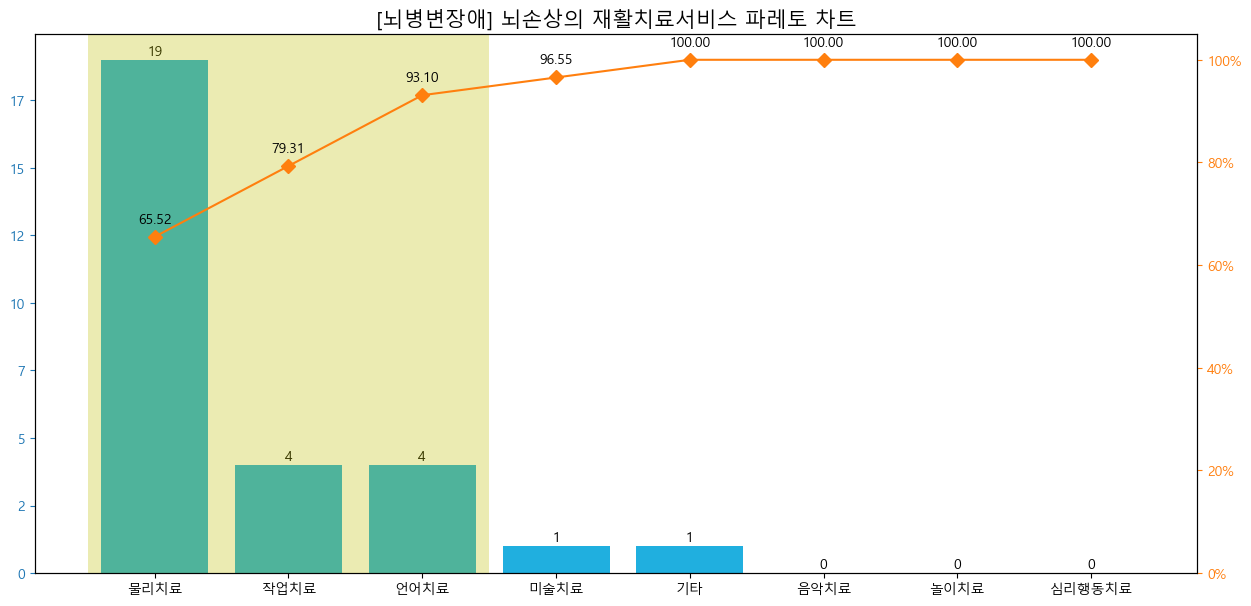

In [250]:
from matplotlib.ticker import PercentFormatter
plt.style.use("default") # 그래프 배경 서식 설정
plt.rc('font', family = 'Malgun Gothic') # 글꼴 설정
plt.rcParams['axes.unicode_minus'] = False # 음수 기호 표시

fig, ax = plt.subplots() # 서브 플롯 설정
fig.set_size_inches(15, 7) # 플롯 크기 설정

## ax1(barchart)
splot = sns.barplot(data=damage_care_pareto, x = 'care', y = 'n', color = 'deepskyblue') # barchart 생성

ax.set_title('[뇌병변장애] 뇌손상의 재활치료서비스 파레토 차트', size = 15) # 제목
ax.set_xlabel('') # x축 이름 
ax.set_ylabel('') # y축 이름
# plt.xticks(rotation=90) # x축 라벨 회전
ax.tick_params(axis="y", colors="C0") # y축 눈금 색깔

for bar in splot.patches: # value label 생성
    ax.annotate("{:,}".format(int(bar.get_height())), # 천단위 콤마 표시
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 6),
                   textcoords='offset points')
    
## ax2(line chart)
ax2 = ax.twinx()
splot2 = ax2.plot(damage_care_pareto['care'], damage_care_pareto["pct"], color="C1", marker="D", ms=7) # line chart 생성
ax2.yaxis.set_major_formatter(PercentFormatter())

for x, y in zip(damage_care_pareto['care'], damage_care_pareto['pct']): # value label 생성
    label = "{:.2f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

### 천단위 콤마 표시(y축)
import matplotlib.ticker as tkr
def yfunc(y, pos):
    s = '{:0,d}'.format(int(y))
    return s
y_format = tkr.FuncFormatter(yfunc)
ax.yaxis.set_major_formatter(y_format) 

ax2.set_ylim([0, 105]) # y축 눈금 범위
ax2.tick_params(axis="y", colors="C1") # y축 눈금 색깔
plt.axvspan(-0.5, 2.5, facecolor='y', alpha=0.3)
# plt.gcf().subplots_adjust(bottom=0.24)
plt.savefig("pyvisual/뇌병변장애/[뇌병변장애] 뇌손상의 재활치료서비스 파레토 차트.png", dpi=300) # 저장
plt.show()

### 지체장애

In [237]:
phy_care = raw_df[raw_df['지체장애여부']==1][['물리치료-이용여부', '작업치료-이용여부', '언어치료-이용여부', '음악치료-이용여부', '놀이치료-이용여부', '미술치료-이용여부', '심리행동치료-이용여부', '기타-이용여부']]

# 각 컬럼명에서 필요한 문자열만 추출(치료명만 추출한다.)
new_phy_col = []

phy_care_lst = phy_care.columns.tolist()
for i in range(len(phy_care_lst)):
    new_phy_col.append(phy_care_lst[i][:len(phy_care_lst[i])-5]) # 필요있는 부분만 출력
phy_care.columns = new_phy_col

# 2-> 0 변경
phy_care_lst = phy_care.columns.tolist()
for i in range(len(phy_care_lst)):
    phy_care.replace({phy_care_lst[i]: 2}, {phy_care_lst[i]: 0}, inplace = True)

phy_care_pareto = pd.DataFrame(phy_care.sum(axis = 0)).reset_index()

# 변수명 변경
phy_care_pareto.rename(columns={'index':'care', 0:'n'}, inplace=True)
phy_care_pareto.sort_values(by = 'n', ascending=False, inplace=True)
phy_care_pareto.head()

phy_care_pareto["pct"] = round(phy_care_pareto["n"].cumsum()/phy_care_pareto.n.sum()*100, 2)
phy_care_pareto

,care,n,pct
0,물리치료,1052,96.96
1,작업치료,14,98.25
7,기타,9,99.08
2,언어치료,5,99.54
4,놀이치료,2,99.72
6,심리행동치료,2,99.91
3,음악치료,1,100.00
5,미술치료,0,100.00


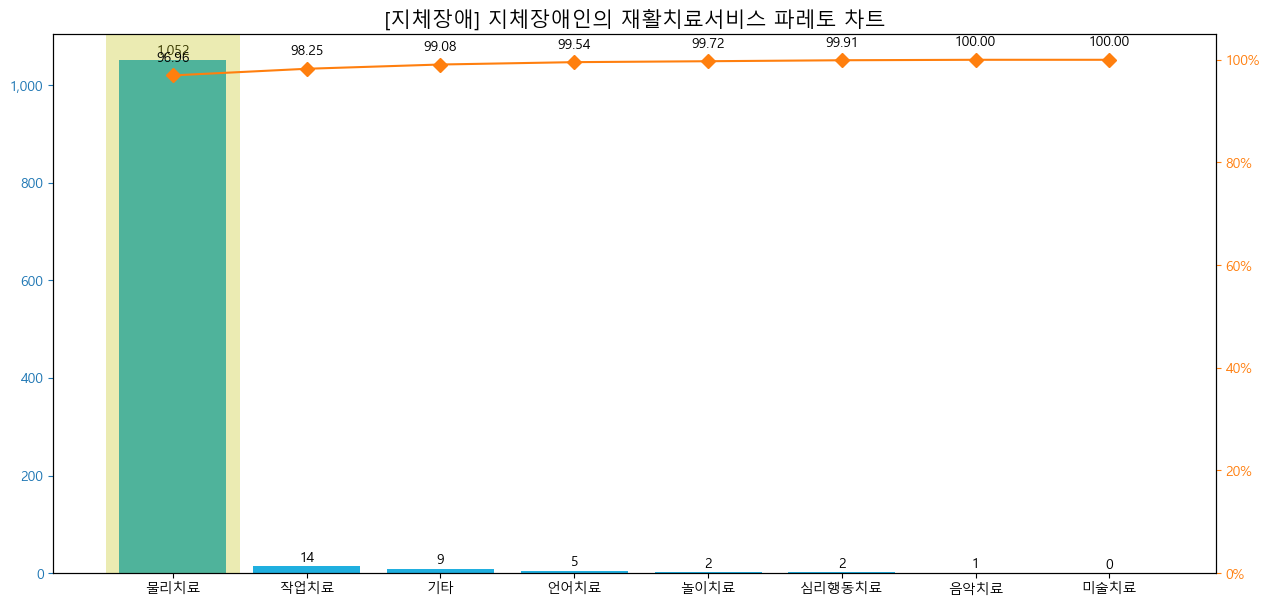

In [474]:
from matplotlib.ticker import PercentFormatter
plt.style.use("default") # 그래프 배경 서식 설정
plt.rc('font', family = 'Malgun Gothic') # 글꼴 설정
plt.rcParams['axes.unicode_minus'] = False # 음수 기호 표시

fig, ax = plt.subplots() # 서브 플롯 설정
fig.set_size_inches(15, 7) # 플롯 크기 설정

## ax1(barchart)
splot = sns.barplot(data=phy_care_pareto, x = 'care', y = 'n', color = 'deepskyblue') # barchart 생성

ax.set_title('[지체장애] 지체장애인의 재활치료서비스 파레토 차트', size = 15) # 제목
ax.set_xlabel('') # x축 이름 
ax.set_ylabel('') # y축 이름
# plt.xticks(rotation=90) # x축 라벨 회전
ax.tick_params(axis="y", colors="C0") # y축 눈금 색깔

for bar in splot.patches: # value label 생성
    ax.annotate("{:,}".format(int(bar.get_height())), # 천단위 콤마 표시
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 6),
                   textcoords='offset points')
    
## ax2(line chart)
ax2 = ax.twinx()
splot2 = ax2.plot(phy_care_pareto['care'], phy_care_pareto["pct"], color="C1", marker="D", ms=7) # line chart 생성
ax2.yaxis.set_major_formatter(PercentFormatter())

for x, y in zip(phy_care_pareto['care'], phy_care_pareto['pct']): # value label 생성
    label = "{:.2f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

### 천단위 콤마 표시(y축)
import matplotlib.ticker as tkr
def yfunc(y, pos):
    s = '{:0,d}'.format(int(y))
    return s
y_format = tkr.FuncFormatter(yfunc)
ax.yaxis.set_major_formatter(y_format) 

ax2.set_ylim([0, 105]) # y축 눈금 범위
ax2.tick_params(axis="y", colors="C1") # y축 눈금 색깔
plt.axvspan(-0.5, 0.5, facecolor='y', alpha=0.3)
# plt.gcf().subplots_adjust(bottom=0.24)
plt.savefig("pyvisual/지체장애/[지체장애]지체장애인의 재활치료서비스 파레토 차트.png", dpi=300) # 저장
plt.show()

### 지체장애 中 절단

In [309]:
cut_care = raw_df[raw_df['지체장애여부']==1][(raw_df['가장 불편한부위']>=11)&(raw_df['가장 불편한부위']<=19)][['물리치료-이용여부', '작업치료-이용여부', '언어치료-이용여부', '음악치료-이용여부', '놀이치료-이용여부', '미술치료-이용여부', '심리행동치료-이용여부', '기타-이용여부']]

# 각 컬럼명에서 필요한 문자열만 추출(치료명만 추출한다.)
new_cut_col = []

cut_care_lst = cut_care.columns.tolist()
for i in range(len(cut_care_lst)):
    new_cut_col.append(cut_care_lst[i][:len(cut_care_lst[i])-5]) # 필요있는 부분만 출력
cut_care.columns = new_cut_col

# 2-> 0 변경
cut_care_lst = cut_care.columns.tolist()
for i in range(len(cut_care_lst)):
    cut_care.replace({cut_care_lst[i]: 2}, {cut_care_lst[i]: 0}, inplace = True)

cut_care_pareto = pd.DataFrame(cut_care.sum(axis = 0)).reset_index()

# 변수명 변경
cut_care_pareto.rename(columns={'index':'care', 0:'n'}, inplace=True)
cut_care_pareto.sort_values(by = 'n', ascending=False, inplace=True)
cut_care_pareto.head()

cut_care_pareto["pct"] = round(cut_care_pareto["n"].cumsum()/cut_care_pareto.n.sum()*100, 2)
cut_care_pareto

<ipython-input-309-141404f09d92>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cut_care = raw_df[raw_df['지체장애여부']==1][(raw_df['가장 불편한부위']>=11)&(raw_df['가장 불편한부위']<=19)][['물리치료-이용여부', '작업치료-이용여부', '언어치료-이용여부', '음악치료-이용여부', '놀이치료-이용여부', '미술치료-이용여부', '심리행동치료-이용여부', '기타-이용여부']]


,care,n,pct
0,물리치료,71,97.26
1,작업치료,1,98.63
7,기타,1,100.00
2,언어치료,0,100.00
3,음악치료,0,100.00
4,놀이치료,0,100.00
5,미술치료,0,100.00
6,심리행동치료,0,100.00


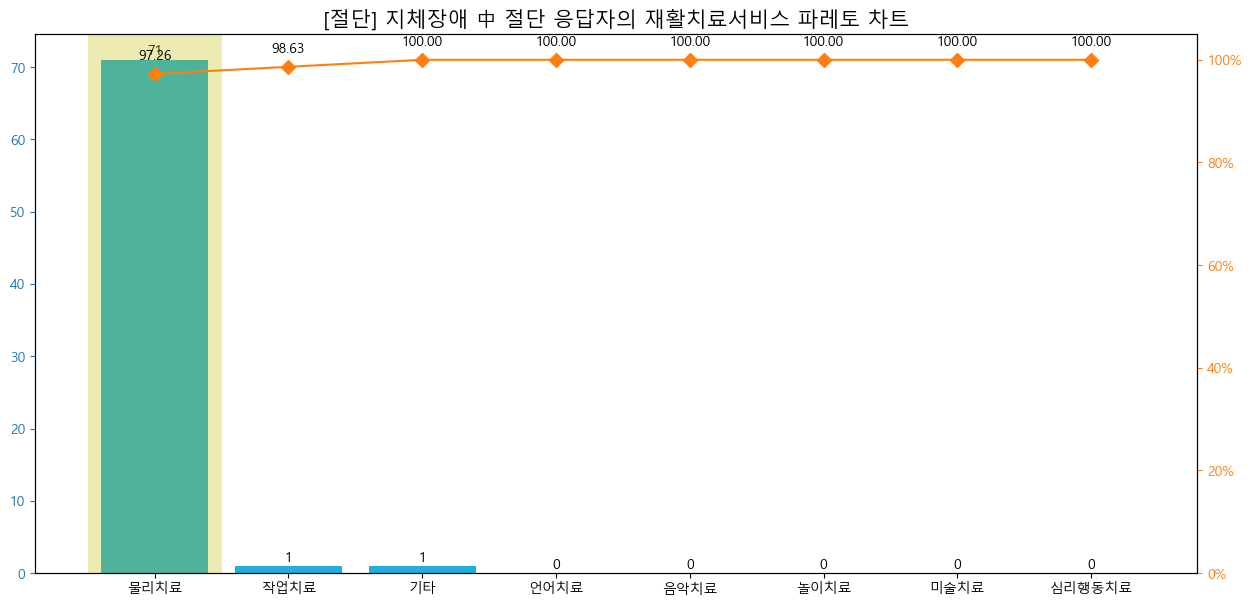

In [319]:
from matplotlib.ticker import PercentFormatter
plt.style.use("default") # 그래프 배경 서식 설정
plt.rc('font', family = 'Malgun Gothic') # 글꼴 설정
plt.rcParams['axes.unicode_minus'] = False # 음수 기호 표시

fig, ax = plt.subplots() # 서브 플롯 설정
fig.set_size_inches(15, 7) # 플롯 크기 설정

## ax1(barchart)
splot = sns.barplot(data=cut_care_pareto, x = 'care', y = 'n', color = 'deepskyblue') # barchart 생성

ax.set_title('[절단] 지체장애 中 절단 응답자의 재활치료서비스 파레토 차트', size = 15) # 제목
ax.set_xlabel('') # x축 이름 
ax.set_ylabel('') # y축 이름
# plt.xticks(rotation=90) # x축 라벨 회전
ax.tick_params(axis="y", colors="C0") # y축 눈금 색깔

for bar in splot.patches: # value label 생성
    ax.annotate("{:,}".format(int(bar.get_height())), # 천단위 콤마 표시
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 6),
                   textcoords='offset points')
    
## ax2(line chart)
ax2 = ax.twinx()
splot2 = ax2.plot(cut_care_pareto['care'], cut_care_pareto["pct"], color="C1", marker="D", ms=7) # line chart 생성
ax2.yaxis.set_major_formatter(PercentFormatter())

for x, y in zip(cut_care_pareto['care'], cut_care_pareto['pct']): # value label 생성
    label = "{:.2f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

### 천단위 콤마 표시(y축)
import matplotlib.ticker as tkr
def yfunc(y, pos):
    s = '{:0,d}'.format(int(y))
    return s
y_format = tkr.FuncFormatter(yfunc)
ax.yaxis.set_major_formatter(y_format) 

ax2.set_ylim([0, 105]) # y축 눈금 범위
ax2.tick_params(axis="y", colors="C1") # y축 눈금 색깔
plt.axvspan(-0.5, 0.5, facecolor='y', alpha=0.3)
# plt.gcf().subplots_adjust(bottom=0.24)
plt.savefig("pyvisual/지체장애/[절단]지체장애 中 절단 응답자의 재활치료서비스 파레토 차트.png", dpi=300) # 저장
plt.show()

### 지체장애 中 마비

In [330]:
paralysis_care = raw_df[raw_df['지체장애여부']==1][(raw_df['가장 불편한부위']>=21)&(raw_df['가장 불편한부위']<=27)][['물리치료-이용여부', '작업치료-이용여부', '언어치료-이용여부', '음악치료-이용여부', '놀이치료-이용여부', '미술치료-이용여부', '심리행동치료-이용여부', '기타-이용여부']]

# 각 컬럼명에서 필요한 문자열만 추출(치료명만 추출한다.)
new_paralysis_col = []

paralysis_care_lst = paralysis_care.columns.tolist()
for i in range(len(paralysis_care_lst)):
    new_paralysis_col.append(paralysis_care_lst[i][:len(paralysis_care_lst[i])-5]) # 필요있는 부분만 출력
paralysis_care.columns = new_paralysis_col

# 2-> 0 변경
paralysis_care_lst = paralysis_care.columns.tolist()
for i in range(len(paralysis_care_lst)):
    paralysis_care.replace({paralysis_care_lst[i]: 2}, {paralysis_care_lst[i]: 0}, inplace = True)

paralysis_care_pareto = pd.DataFrame(paralysis_care.sum(axis = 0)).reset_index()

# 변수명 변경
paralysis_care_pareto.rename(columns={'index':'care', 0:'n'}, inplace=True)
paralysis_care_pareto.sort_values(by = 'n', ascending=False, inplace=True)
paralysis_care_pareto.head()

paralysis_care_pareto["pct"] = round(paralysis_care_pareto["n"].cumsum()/paralysis_care_pareto.n.sum()*100, 2)
paralysis_care_pareto

<ipython-input-330-141186524f69>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  paralysis_care = raw_df[raw_df['지체장애여부']==1][(raw_df['가장 불편한부위']>=21)&(raw_df['가장 불편한부위']<=27)][['물리치료-이용여부', '작업치료-이용여부', '언어치료-이용여부', '음악치료-이용여부', '놀이치료-이용여부', '미술치료-이용여부', '심리행동치료-이용여부', '기타-이용여부']]


,care,n,pct
0,물리치료,90,84.11
1,작업치료,9,92.52
2,언어치료,4,96.26
7,기타,2,98.13
3,음악치료,1,99.07
4,놀이치료,1,100.00
5,미술치료,0,100.00
6,심리행동치료,0,100.00


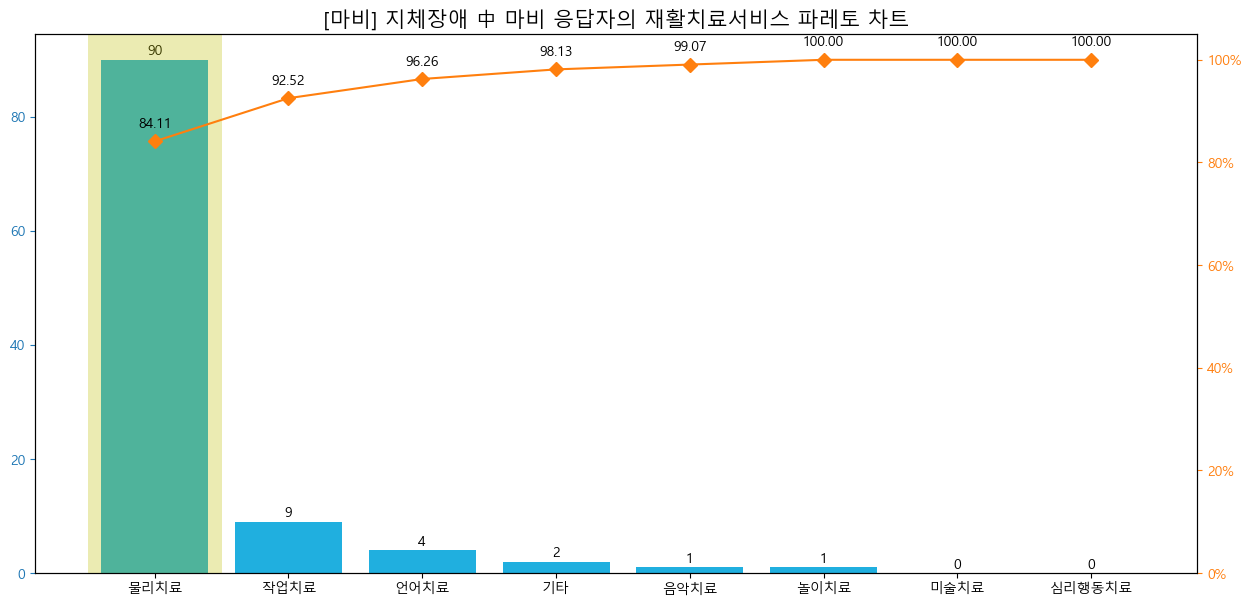

In [331]:
from matplotlib.ticker import PercentFormatter
plt.style.use("default") # 그래프 배경 서식 설정
plt.rc('font', family = 'Malgun Gothic') # 글꼴 설정
plt.rcParams['axes.unicode_minus'] = False # 음수 기호 표시

fig, ax = plt.subplots() # 서브 플롯 설정
fig.set_size_inches(15, 7) # 플롯 크기 설정

## ax1(barchart)
splot = sns.barplot(data=paralysis_care_pareto, x = 'care', y = 'n', color = 'deepskyblue') # barchart 생성

ax.set_title('[마비] 지체장애 中 마비 응답자의 재활치료서비스 파레토 차트', size = 15) # 제목
ax.set_xlabel('') # x축 이름 
ax.set_ylabel('') # y축 이름
# plt.xticks(rotation=90) # x축 라벨 회전
ax.tick_params(axis="y", colors="C0") # y축 눈금 색깔

for bar in splot.patches: # value label 생성
    ax.annotate("{:,}".format(int(bar.get_height())), # 천단위 콤마 표시
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 6),
                   textcoords='offset points')
    
## ax2(line chart)
ax2 = ax.twinx()
splot2 = ax2.plot(paralysis_care_pareto['care'], paralysis_care_pareto["pct"], color="C1", marker="D", ms=7) # line chart 생성
ax2.yaxis.set_major_formatter(PercentFormatter())

for x, y in zip(paralysis_care_pareto['care'], paralysis_care_pareto['pct']): # value label 생성
    label = "{:.2f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

### 천단위 콤마 표시(y축)
import matplotlib.ticker as tkr
def yfunc(y, pos):
    s = '{:0,d}'.format(int(y))
    return s
y_format = tkr.FuncFormatter(yfunc)
ax.yaxis.set_major_formatter(y_format) 

ax2.set_ylim([0, 105]) # y축 눈금 범위
ax2.tick_params(axis="y", colors="C1") # y축 눈금 색깔
plt.axvspan(-0.5, 0.5, facecolor='y', alpha=0.3)
# plt.gcf().subplots_adjust(bottom=0.24)
plt.savefig("pyvisual/지체장애/[마비]지체장애 中 마비 응답자의 재활치료서비스 파레토 차트.png", dpi=300) # 저장
plt.show()

### 지체장애 中 관절장애

In [328]:
articulation_care = raw_df[raw_df['지체장애여부']==1][(raw_df['가장 불편한부위']>=31)&(raw_df['가장 불편한부위']<=38)][['물리치료-이용여부', '작업치료-이용여부', '언어치료-이용여부', '음악치료-이용여부', '놀이치료-이용여부', '미술치료-이용여부', '심리행동치료-이용여부', '기타-이용여부']]

# 각 컬럼명에서 필요한 문자열만 추출(치료명만 추출한다.)
new_articulation_col = []

articulation_care_lst = articulation_care.columns.tolist()
for i in range(len(articulation_care_lst)):
    new_articulation_col.append(articulation_care_lst[i][:len(articulation_care_lst[i])-5]) # 필요있는 부분만 출력
articulation_care.columns = new_articulation_col

# 2-> 0 변경
articulation_care_lst = articulation_care.columns.tolist()
for i in range(len(articulation_care_lst)):
    articulation_care.replace({articulation_care_lst[i]: 2}, {articulation_care_lst[i]: 0}, inplace = True)

articulation_care_pareto = pd.DataFrame(articulation_care.sum(axis = 0)).reset_index()

# 변수명 변경
articulation_care_pareto.rename(columns={'index':'care', 0:'n'}, inplace=True)
articulation_care_pareto.sort_values(by = 'n', ascending=False, inplace=True)
articulation_care_pareto.head()

articulation_care_pareto["pct"] = round(articulation_care_pareto["n"].cumsum()/articulation_care_pareto.n.sum()*100, 2)
articulation_care_pareto

<ipython-input-328-ada0177dd3dc>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  articulation_care = raw_df[raw_df['지체장애여부']==1][(raw_df['가장 불편한부위']>=31)&(raw_df['가장 불편한부위']<=38)][['물리치료-이용여부', '작업치료-이용여부', '언어치료-이용여부', '음악치료-이용여부', '놀이치료-이용여부', '미술치료-이용여부', '심리행동치료-이용여부', '기타-이용여부']]


,care,n,pct
0,물리치료,847,98.60
7,기타,6,99.30
1,작업치료,3,99.65
6,심리행동치료,2,99.88
4,놀이치료,1,100.00
2,언어치료,0,100.00
3,음악치료,0,100.00
5,미술치료,0,100.00


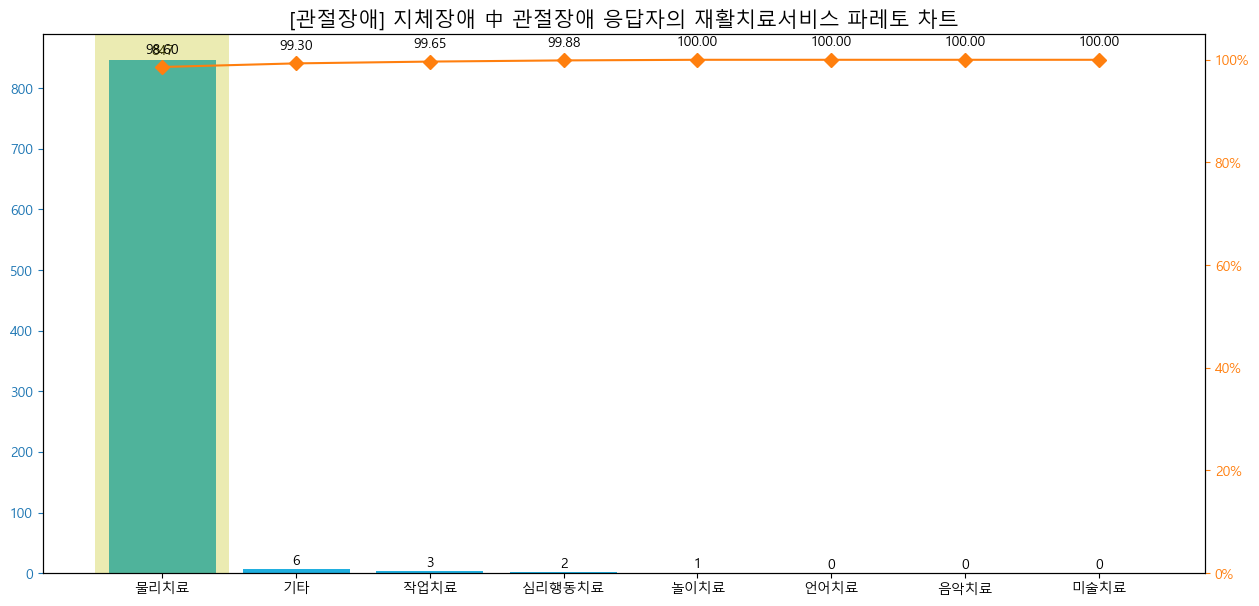

In [329]:
from matplotlib.ticker import PercentFormatter
plt.style.use("default") # 그래프 배경 서식 설정
plt.rc('font', family = 'Malgun Gothic') # 글꼴 설정
plt.rcParams['axes.unicode_minus'] = False # 음수 기호 표시

fig, ax = plt.subplots() # 서브 플롯 설정
fig.set_size_inches(15, 7) # 플롯 크기 설정

## ax1(barchart)
splot = sns.barplot(data=articulation_care_pareto, x = 'care', y = 'n', color = 'deepskyblue') # barchart 생성

ax.set_title('[관절장애] 지체장애 中 관절장애 응답자의 재활치료서비스 파레토 차트', size = 15) # 제목
ax.set_xlabel('') # x축 이름 
ax.set_ylabel('') # y축 이름
# plt.xticks(rotation=90) # x축 라벨 회전
ax.tick_params(axis="y", colors="C0") # y축 눈금 색깔

for bar in splot.patches: # value label 생성
    ax.annotate("{:,}".format(int(bar.get_height())), # 천단위 콤마 표시
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 6),
                   textcoords='offset points')
    
## ax2(line chart)
ax2 = ax.twinx()
splot2 = ax2.plot(articulation_care_pareto['care'], articulation_care_pareto["pct"], color="C1", marker="D", ms=7) # line chart 생성
ax2.yaxis.set_major_formatter(PercentFormatter())

for x, y in zip(articulation_care_pareto['care'], articulation_care_pareto['pct']): # value label 생성
    label = "{:.2f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

### 천단위 콤마 표시(y축)
import matplotlib.ticker as tkr
def yfunc(y, pos):
    s = '{:0,d}'.format(int(y))
    return s
y_format = tkr.FuncFormatter(yfunc)
ax.yaxis.set_major_formatter(y_format) 

ax2.set_ylim([0, 105]) # y축 눈금 범위
ax2.tick_params(axis="y", colors="C1") # y축 눈금 색깔
plt.axvspan(-0.5, 0.5, facecolor='y', alpha=0.3)
# plt.gcf().subplots_adjust(bottom=0.24)
plt.savefig("pyvisual/지체장애/[관절장애]지체장애 中 관절장애 응답자의 재활치료서비스 파레토 차트.png", dpi=300) # 저장
plt.show()

---

## 절단, 마비, 관절장애를 각 범주별로 그룹화

In [76]:
# 절단
df1 = raw_df[raw_df['지체장애여부']==1][(raw_df['가장 불편한부위']>=11)&(raw_df['가장 불편한부위']<=19)]
df1.head()

<ipython-input-76-94f88efb935f>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = raw_df[raw_df['지체장애여부']==1][(raw_df['가장 불편한부위']>=11)&(raw_df['가장 불편한부위']<=19)]


,조사표 종류,가구원 일련번호(장애인),가구원 일련번호(응답자),조사지역(시도),응답자 유형,대리응답이유,장애유형확인1,장애유형확인2,장애유형확인3,개인번호,...,"보육,교육비","보호,간병비",재활기관이용료,통신비,"장애인보조기기 구입,유지비",부모사후 및 노후대비비,기타.4,월평균 총 추가비용,wg_p,ws_p
1,2,1,1,21,NaN,NaN,1,NaN,NaN,1,...,0,0,0,0,0,0,0,0,444.377794,1.132070
16,2,5,5,21,NaN,NaN,1,NaN,NaN,5,...,0,0,0,0,0,0,0,0,474.522473,1.208864
53,2,1,1,38,NaN,NaN,1,NaN,NaN,1,...,0,0,0,0,0,0,0,0,120.858430,0.307892
60,2,1,1,38,NaN,NaN,1,NaN,NaN,1,...,0,0,0,0,0,0,0,0,113.180736,0.288332
75,2,1,1,21,NaN,NaN,1,NaN,NaN,1,...,0,0,0,0,0,0,0,10,444.377794,1.132070


In [77]:
# 마비
df2 = raw_df[raw_df['지체장애여부']==1][(raw_df['가장 불편한부위']>=21)&(raw_df['가장 불편한부위']<=27)]
df2.head()

<ipython-input-77-eb9069838118>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = raw_df[raw_df['지체장애여부']==1][(raw_df['가장 불편한부위']>=21)&(raw_df['가장 불편한부위']<=27)]


,조사표 종류,가구원 일련번호(장애인),가구원 일련번호(응답자),조사지역(시도),응답자 유형,대리응답이유,장애유형확인1,장애유형확인2,장애유형확인3,개인번호,...,"보육,교육비","보호,간병비",재활기관이용료,통신비,"장애인보조기기 구입,유지비",부모사후 및 노후대비비,기타.4,월평균 총 추가비용,wg_p,ws_p
34,2,1,1,21,NaN,NaN,1,NaN,NaN,1,...,0,0,0,0,56,0,0,96,444.377794,1.132070
39,2,1,1,21,NaN,NaN,1,NaN,NaN,1,...,0,0,0,0,0,0,0,70,444.377794,1.132070
44,2,1,1,21,NaN,NaN,1,NaN,NaN,1,...,0,47,0,0,0,0,0,67,474.522473,1.208864
57,2,2,2,38,NaN,NaN,1,NaN,NaN,2,...,0,0,0,0,0,0,0,0,120.858430,0.307892
79,2,1,1,21,NaN,NaN,1,NaN,NaN,1,...,0,0,0,0,10,0,0,72,444.377794,1.132070


In [78]:
# 관절장애
df3 = raw_df[raw_df['지체장애여부']==1][(raw_df['가장 불편한부위']>=31)&(raw_df['가장 불편한부위']<=38)]
df3.head()

<ipython-input-78-ad1a1175b0ab>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df3 = raw_df[raw_df['지체장애여부']==1][(raw_df['가장 불편한부위']>=31)&(raw_df['가장 불편한부위']<=38)]


,조사표 종류,가구원 일련번호(장애인),가구원 일련번호(응답자),조사지역(시도),응답자 유형,대리응답이유,장애유형확인1,장애유형확인2,장애유형확인3,개인번호,...,"보육,교육비","보호,간병비",재활기관이용료,통신비,"장애인보조기기 구입,유지비",부모사후 및 노후대비비,기타.4,월평균 총 추가비용,wg_p,ws_p
0,2,1,1,21,NaN,NaN,1,NaN,NaN,1,...,0,0,0,0,0,0,0,0,444.377794,1.132070
2,2,1,1,21,NaN,NaN,1,NaN,NaN,1,...,0,0,0,0,0,0,0,0,444.377794,1.132070
3,2,2,2,21,NaN,NaN,1,NaN,NaN,2,...,0,0,0,0,0,0,0,28,444.377794,1.132070
8,2,3,3,21,NaN,NaN,1,NaN,NaN,3,...,0,0,0,0,0,0,0,43,444.377794,1.132070
11,2,2,2,21,NaN,NaN,1,14.0,NaN,2,...,0,170,0,0,50,0,0,277,474.522473,1.208864


In [79]:
conditionlist1 = [
    (df1['가장 불편한부위'] >=11) &(df1['가장 불편한부위']<=14) ,
    (df1["가장 불편한부위"]>=15) & (df1["가장 불편한부위"]<=19)]
conditionlist2 = [    
    (df2["가장 불편한부위"]>=21) & (df2["가장 불편한부위"]<=22),
    (df2["가장 불편한부위"]>=23) & (df2["가장 불편한부위"]<=24),
    (df2["가장 불편한부위"]>=25) & (df2["가장 불편한부위"]<=27)]
conditionlist3 = [    
    (df3["가장 불편한부위"]>=31) & (df3["가장 불편한부위"]<=34),
    (df3["가장 불편한부위"]>=35) & (df3["가장 불편한부위"]<=38)]
choicelist1 = ["[상지 절단]손목 미만(손등, 손가락)~어깨 이상", "[하지 절단]양쪽 발가락~엉덩이 이상"]
choicelist2 = ["[상지 마비]상지 한쪽 or 양쪽","[하지 마비]하지 한쪽 or 양쪽", "[상하지 마비]상하지 한쪽 or 양쪽 or 전신마비"]
choicelist3 = ["[상지 관절장애]어깨~손가락", "[하지 관절장애]고관절(엉덩이)~척추(디스크)"]
df1['가장 불편한 부위2'] = np.select(conditionlist1, choicelist1, default='')
df2['가장 불편한 부위2'] = np.select(conditionlist2, choicelist2, default='')
df3['가장 불편한 부위2'] = np.select(conditionlist3, choicelist3, default='')

---
## 물리치료 관련 설문
### 뇌병변장애 中 뇌졸중(뇌경색, 뇌출혈): 이용시간 및 비용

물리치료 받는 뇌졸중: 162명  
물리치료 받는 뇌손상: 19명

In [349]:
df.loc[df['주된 진단명(1)'] == 2].loc[df['물리치료-이용여부']==1][['물리치료-이용시간', '물리치료-비용', '물리치료-재활치료바우처여부', '물리치료-바우처재원인지여부', 
                              '물리치료-제공기관(1)', '물리치료-제공기관(2)', '물리치료-제공기관(3)', '물리치료-제공기관(4)', '물리치료-제공기관(5)']]

,물리치료-이용시간,물리치료-비용,물리치료-재활치료바우처여부,물리치료-바우처재원인지여부,물리치료-제공기관(1),물리치료-제공기관(2),물리치료-제공기관(3),물리치료-제공기관(4),물리치료-제공기관(5)
13,1.0,40.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
42,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
85,1.0,40.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
118,3.0,18.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
127,1.0,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
6348,99.0,9999.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
6455,2.0,9999.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
6474,2.0,60.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
6481,3.0,240.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [365]:
# 99값 제거
df.loc[df['물리치료-이용여부']==1].loc[df['물리치료-이용시간'] != 99] # 3개의 결측치(99) 존재

,조사표 종류,가구원 일련번호(장애인),가구원 일련번호(응답자),조사지역(시도),응답자 유형,대리응답이유,장애유형확인1,장애유형확인2,장애유형확인3,개인번호,...,"보육,교육비","보호,간병비",재활기관이용료,통신비,"장애인보조기기 구입,유지비",부모사후 및 노후대비비,기타.4,월평균 총 추가비용,wg_p,ws_p
13,2,2,2,21,NaN,NaN,2,NaN,NaN,2,...,0,0,0,0,0,0,0,110,461.979521,1.176911
42,2,1,1,21,NaN,NaN,2,NaN,NaN,1,...,0,0,0,0,0,0,0,20,761.982341,1.671569
85,2,1,1,21,NaN,NaN,2,NaN,NaN,1,...,0,0,0,0,10,0,90,240,493.214478,1.081970
118,2,1,88,21,8.0,1.0,2,NaN,NaN,1,...,0,500,0,0,0,0,0,578,493.214478,1.081970
127,2,1,1,38,NaN,NaN,2,5.0,NaN,1,...,0,0,0,0,6,0,0,57,117.663805,0.299753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6345,2,1,1,34,NaN,NaN,2,NaN,NaN,1,...,0,145,0,0,12,0,0,351,170.794249,0.435105
6455,2,6,1,34,5.0,4.0,2,NaN,NaN,6,...,0,0,0,0,30,0,70,755,1063.836249,2.710164
6474,2,2,2,34,NaN,NaN,2,NaN,NaN,2,...,0,0,0,0,0,0,0,85,170.794249,0.435105
6481,2,2,2,23,NaN,NaN,2,NaN,NaN,2,...,0,0,0,0,0,0,0,440,531.898832,1.355033


C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 15.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 29.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


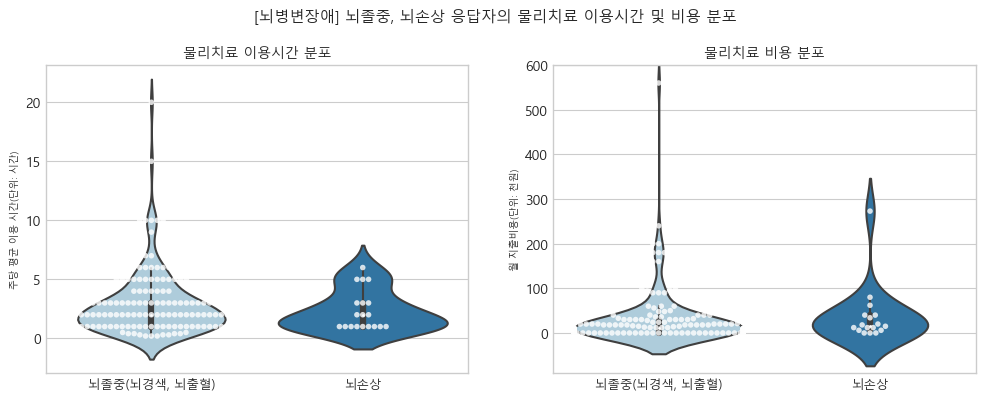

In [464]:
plt.style.use('seaborn-whitegrid')
plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(12, 4)

sns.violinplot(data = df.loc[df['물리치료-이용여부']==1].loc[df['물리치료-이용시간'] != 99], x='주된 진단명(1)', y='물리치료-이용시간', palette='Paired', ax=ax1)
sns.swarmplot(data = df.loc[df['물리치료-이용여부']==1].loc[df['물리치료-이용시간'] != 99], x='주된 진단명(1)', y='물리치료-이용시간', color="white", alpha=0.8, size=4, ax=ax1)

ax1.set_title('물리치료 이용시간 분포', size = 10)
ax1.set_xlabel('')
ax1.set_xticklabels(['뇌졸중(뇌경색, 뇌출혈)', '뇌손상'], size = 9)
ax1.set_ylabel('주당 평균 이용 시간(단위: 시간)', size = 7)

ax = sns.violinplot(data = df.loc[df['물리치료-이용여부']==1].loc[df['물리치료-비용'] != 9999], 
                    x='주된 진단명(1)', y='물리치료-비용', palette='Paired')
sns.swarmplot(data = df.loc[df['물리치료-이용여부']==1].loc[df['물리치료-비용'] != 9999],
              x='주된 진단명(1)', y='물리치료-비용', color="white", alpha=0.8, size=4)
ax.set_title('물리치료 비용 분포', size = 10)
ax.set_xlabel('')
ax.set_xticklabels(['뇌졸중(뇌경색, 뇌출혈)', '뇌손상'], size = 9)
ax.set_ylabel('월 지출비용(단위: 천원)', size = 7)
ax.set_ylim([-90, 600])

fig.suptitle('[뇌병변장애] 뇌졸중, 뇌손상 응답자의 물리치료 이용시간 및 비용 분포', fontsize=11, y = 1.02)
plt.savefig("pyvisual/뇌병변장애/[뇌병변장애] 뇌졸중, 뇌손상 응답자의 물리치료 이용시간 및 비용 분포.png", dpi=300)
plt.show()

In [467]:
df.loc[df['물리치료-이용여부']==1].loc[df['주된 진단명(1)'] ==2][['물리치료-이용시간']].value_counts()

물리치료-이용시간
1.0          44
2.0          36
3.0          31
5.0          13
4.0           7
6.0           6
10.0          5
0.4           4
0.2           3
0.3           3
99.0          3
0.5           2
7.0           2
9.0           1
15.0          1
20.0          1
dtype: int64

In [472]:
pd.DataFrame(df.loc[df['물리치료-이용여부']==1].loc[df['주된 진단명(1)'] ==2][['물리치료-비용']].value_counts()).sort_values(by='물리치료-비용', ascending =False)

,0
물리치료-비용,
9999.0,16
560.0,1
240.0,1
200.0,2
180.0,3
160.0,2
99.0,2
96.0,1
94.0,1


In [468]:
df.loc[df['물리치료-이용여부']==1].loc[df['주된 진단명(1)'] ==3][['물리치료-이용시간']].value_counts()

물리치료-이용시간
1.0          9
2.0          3
3.0          3
5.0          3
6.0          1
dtype: int64

In [473]:
pd.DataFrame(df.loc[df['물리치료-이용여부']==1].loc[df['주된 진단명(1)'] ==3][['물리치료-비용']].value_counts()).sort_values(by='물리치료-비용', ascending =False)

,0
물리치료-비용,
9999.0,2
273.0,1
80.0,1
62.0,1
40.0,2
34.0,1
20.0,1
18.0,1
15.0,1


---
---
## 물리치료 이용여부에 따른 재활운동 및 체육 필요 인식 탐색: 교차분석 및 t-test
### 뇌병변장애

In [111]:
# 1. 교차분석
cp_pt_crosstab = pd.crosstab(df['물리치료-이용여부'], df['재활운동체육 필요여부'], margins=True)
print(cp_pt_crosstab)

from scipy.stats import chi2_contingency
result = chi2_contingency(observed = cp_pt_crosstab, correction=False)
print("1. 카이제곱 통계량:", result[0])
print("2. p-value:", result[1])
print("3. df:", result[2]) #(행의개수-1)*(열의개수-1)
# print("4. 기대값 행렬:")
# pd.DataFrame(result[3]).rename(index={0:'예', 1:'아니오', 2:'합계'}, columns={0:'매우 필요', 1:'필요', 2:'필요 없음', 3:'전혀 필요 없음', 4:'합계'})

재활운동체육 필요여부    1    2   3  4  All
물리치료-이용여부                        
1             63  107  11  0  181
2             93  244  30  6  373
All          156  351  41  6  554
1. 카이제곱 통계량: 8.530084349250885
2. p-value: 0.3834724391924268
3. df: 8


### 뇌졸중(뇌경색, 뇌출혈)

In [95]:
# 1. 교차분석
storke_pt_df = df.loc[df['주된 진단명(1)'] == 2][['물리치료-이용여부', '재활운동체육 필요여부']]
storke_pt_df.head() # 총 476개 행 존재

stroke_pt_crosstab = pd.crosstab(storke_pt_df['물리치료-이용여부'], storke_pt_df['재활운동체육 필요여부'], margins=True)
print(stroke_pt_crosstab)

from scipy.stats import chi2_contingency
result = chi2_contingency(observed = stroke_pt_crosstab, correction=False)
print("1. 카이제곱 통계량:", result[0])
print("2. p-value:", result[1])
print("3. df:", result[2]) #(행의개수-1)*(열의개수-1)
# print("4. 기대값 행렬:")
# pd.DataFrame(result[3]).rename(index={0:'예', 1:'아니오', 2:'합계'}, columns={0:'매우 필요', 1:'필요', 2:'필요 없음', 3:'전혀 필요 없음', 4:'합계'})

재활운동체육 필요여부    1    2   3  4  All
물리치료-이용여부                        
1             52  101   9  0  162
2             81  201  27  5  314
All          133  302  36  5  476
1. 카이제곱 통계량: 5.454246535288555
2. p-value: 0.7081036527715288
3. df: 8


In [89]:
# 2. t-test
from scipy import stats

group1 = storke_pt_df[storke_pt_df['물리치료-이용여부'] == 1]
group2 = storke_pt_df[storke_pt_df['물리치료-이용여부'] == 2]

# Levene의 등분산 검정 
lresult = stats.levene(group1['재활운동체육 필요여부'], group2['재활운동체육 필요여부'])
print('LeveneResult(F) : %.3f \np-value : %.3f' % (lresult))

# t-test
t_stat, p_val = stats.ttest_ind(group1['재활운동체육 필요여부'], group2['재활운동체육 필요여부'], equal_var=False, alternative='two-sided') 
print("t-statistics : {:.3f}, p-value : {:.3f}".format(t_stat, p_val))

LeveneResult(F) : 0.000 
p-value : 0.988
t-statistics : -2.236, p-value : 0.026


### 뇌손상

In [97]:
damage_pt_df = df.loc[df['주된 진단명(1)'] == 3][['물리치료-이용여부', '재활운동체육 필요여부']]
damage_pt_df.head() # 총 78개 행 존재

damage_pt_crosstab = pd.crosstab(damage_pt_df['물리치료-이용여부'], damage_pt_df['재활운동체육 필요여부'], margins=True)
print(damage_pt_crosstab)

from scipy.stats import chi2_contingency
result = chi2_contingency(observed = damage_pt_crosstab, correction=False)
print("1. 카이제곱 통계량:", result[0])
print("2. p-value:", result[1])
print("3. df:", result[2]) #(행의개수-1)*(열의개수-1)
# print("4. 기대값 행렬:")
# pd.DataFrame(result[3]).rename(index={0:'예', 1:'아니오', 2:'합계'}, columns={0:'매우 필요', 1:'필요', 2:'필요 없음', 3:'전혀 필요 없음', 4:'합계'})

재활운동체육 필요여부   1   2  3  4  All
물리치료-이용여부                     
1            11   6  2  0   19
2            12  43  3  1   59
All          23  49  5  1   78
1. 카이제곱 통계량: 11.762897400359517
2. p-value: 0.16210046156057142
3. df: 8


In [90]:
# 2. t-test
from scipy import stats

group1 = damage_pt_df[damage_pt_df['물리치료-이용여부'] == 1]
group2 = damage_pt_df[damage_pt_df['물리치료-이용여부'] == 2]

# Levene의 등분산 검정 
lresult = stats.levene(group1['재활운동체육 필요여부'], group2['재활운동체육 필요여부'])
print('LeveneResult(F) : %.3f \np-value : %.3f' % (lresult))

# t-test
t_stat, p_val = stats.ttest_ind(group1['재활운동체육 필요여부'], group2['재활운동체육 필요여부'], equal_var=False, alternative='two-sided') 
print("t-statistics : {:.3f}, p-value : {:.3f}".format(t_stat, p_val))

LeveneResult(F) : 2.713 
p-value : 0.104
t-statistics : -2.021, p-value : 0.054


### 지체장애인

In [101]:
# 지체장애 응답자만 추출
phy_df = raw_df[raw_df['지체장애여부']==1]
phy_df.head() # 총 3,296행 존재

# 물리치료 이용여부와 재활운동체육 필요여부 컬럼만 추출
phy_pt_df = phy_df[['물리치료-이용여부', '재활운동체육 필요여부']]
phy_pt_df.head()

phy_pt_crosstab = pd.crosstab(phy_pt_df['물리치료-이용여부'], phy_pt_df['재활운동체육 필요여부'], margins=True)
print(phy_pt_crosstab)

# 1. 교차분석
from scipy.stats import chi2_contingency
result = chi2_contingency(observed = phy_pt_crosstab, correction=False)
print("1. 카이제곱 통계량:", result[0])
print("2. p-value:", result[1])
print("3. df:", result[2]) #(행의개수-1)*(열의개수-1)
# print("4. 기대값 행렬:")
# pd.DataFrame(result[3]).rename(index={0:'예', 1:'아니오', 2:'합계'}, columns={0:'매우 필요', 1:'필요', 2:'필요 없음', 3:'전혀 필요 없음', 4:'합계'})

재활운동체육 필요여부    1     2    3   4   All
물리치료-이용여부                            
1            192   733  120   7  1052
2            440  1465  302  37  2244
All          632  2198  422  44  3296
1. 카이제곱 통계량: 10.301888550883671
2. p-value: 0.244473346629659
3. df: 8


In [91]:
# 2. t-test
from scipy import stats

group1 = phy_pt_df[phy_pt_df['물리치료-이용여부'] == 1]
group2 = phy_pt_df[phy_pt_df['물리치료-이용여부'] == 2]

# Levene의 등분산 검정 
lresult = stats.levene(group1['재활운동체육 필요여부'], group2['재활운동체육 필요여부'])
print('LeveneResult(F) : %.3f \np-value : %.3f' % (lresult))

# t-test
t_stat, p_val = stats.ttest_ind(group1['재활운동체육 필요여부'], group2['재활운동체육 필요여부'], equal_var=True, alternative='two-sided') 
print("t-statistics : {:.3f}, p-value : {:.3f}".format(t_stat, p_val))

LeveneResult(F) : 8.190 
p-value : 0.004
t-statistics : -1.168, p-value : 0.243


### 지체장애인(절단)

In [102]:
# 1. 교차분석
cut_pt_df = phy_df.loc[(phy_df['가장 불편한부위']>=11)&(phy_df['가장 불편한부위']<=19)][['물리치료-이용여부', '재활운동체육 필요여부']]
cut_pt_df.head() # 총 436개 행 존재

cut_pt_crosstab = pd.crosstab(cut_pt_df['물리치료-이용여부'], cut_pt_df['재활운동체육 필요여부'], margins=True)
print(cut_pt_crosstab)

from scipy.stats import chi2_contingency
result = chi2_contingency(observed = cut_pt_crosstab, correction=False)
print("1. 카이제곱 통계량:", result[0])
print("2. p-value:", result[1])
print("3. df:", result[2]) #(행의개수-1)*(열의개수-1)
# print("4. 기대값 행렬:")
# pd.DataFrame(result[3]).rename(index={0:'예', 1:'아니오', 2:'합계'}, columns={0:'매우 필요', 1:'필요', 2:'필요 없음', 3:'전혀 필요 없음', 4:'합계'})

재활운동체육 필요여부   1    2   3   4  All
물리치료-이용여부                        
1            12   56   3   0   71
2            61  234  59  11  365
All          73  290  62  11  436
1. 카이제곱 통계량: 10.046740684901549
2. p-value: 0.26176065079755395
3. df: 8


In [92]:
# 2. t-test
from scipy import stats

group1 = cut_pt_df[cut_pt_df['물리치료-이용여부'] == 1]
group2 = cut_pt_df[cut_pt_df['물리치료-이용여부'] == 2]

# Levene의 등분산 검정 
lresult = stats.levene(group1['재활운동체육 필요여부'], group2['재활운동체육 필요여부'])
print('LeveneResult(F) : %.3f \np-value : %.3f' % (lresult))

# t-test
t_stat, p_val = stats.ttest_ind(group1['재활운동체육 필요여부'], group2['재활운동체육 필요여부'], equal_var=True, alternative='two-sided') 
print("t-statistics : {:.3f}, p-value : {:.3f}".format(t_stat, p_val))

LeveneResult(F) : 6.761 
p-value : 0.010
t-statistics : -2.193, p-value : 0.029


### 지체장애인(마비)

In [103]:
# 1. 교차분석
paralysis_pt_df = phy_df.loc[(phy_df['가장 불편한부위']>=21)&(phy_df['가장 불편한부위']<=27)][['물리치료-이용여부', '재활운동체육 필요여부']]
paralysis_pt_df.head() # 총 417개 행 존재

paralysis_pt_crosstab = pd.crosstab(paralysis_pt_df['물리치료-이용여부'], paralysis_pt_df['재활운동체육 필요여부'], margins=True)
print(paralysis_pt_crosstab)

from scipy.stats import chi2_contingency
result = chi2_contingency(observed = paralysis_pt_crosstab, correction=False)
print("1. 카이제곱 통계량:", result[0])
print("2. p-value:", result[1])
print("3. df:", result[2]) #(행의개수-1)*(열의개수-1)
# print("4. 기대값 행렬:")
# pd.DataFrame(result[3]).rename(index={0:'예', 1:'아니오', 2:'합계'}, columns={0:'매우 필요', 1:'필요', 2:'필요 없음', 3:'전혀 필요 없음', 4:'합계'})

재활운동체육 필요여부    1    2   3  4  All
물리치료-이용여부                        
1             23   57  10  0   90
2             78  214  32  3  327
All          101  271  42  3  417
1. 카이제곱 통계량: 1.0815364086838377
2. p-value: 0.9976788797729229
3. df: 8


In [104]:
# 2. t-test
from scipy import stats

group1 = paralysis_pt_df[paralysis_pt_df['물리치료-이용여부'] == 1]
group2 = paralysis_pt_df[paralysis_pt_df['물리치료-이용여부'] == 2]

# Levene의 등분산 검정 
lresult = stats.levene(group1['재활운동체육 필요여부'], group2['재활운동체육 필요여부'])
print('LeveneResult(F) : %.3f \np-value : %.3f' % (lresult))

# t-test
t_stat, p_val = stats.ttest_ind(group1['재활운동체육 필요여부'], group2['재활운동체육 필요여부'], equal_var=False, alternative='two-sided') 
print("t-statistics : {:.3f}, p-value : {:.3f}".format(t_stat, p_val))

LeveneResult(F) : 0.041 
p-value : 0.840
t-statistics : -0.313, p-value : 0.754


### 지체장애인(관절장애)

In [105]:
# 1. 교차분석
articulation_pt_df = phy_df.loc[(phy_df['가장 불편한부위']>=31)&(phy_df['가장 불편한부위']<=38)][['물리치료-이용여부', '재활운동체육 필요여부']]
articulation_pt_df.head() # 총 2,258개 행 존재

articulation_pt_crosstab = pd.crosstab(articulation_pt_df['물리치료-이용여부'], articulation_pt_df['재활운동체육 필요여부'], margins=True)
print(articulation_pt_crosstab)

from scipy.stats import chi2_contingency
result = chi2_contingency(observed = articulation_pt_crosstab, correction=False)
print("1. 카이제곱 통계량:", result[0])
print("2. p-value:", result[1])
print("3. df:", result[2]) #(행의개수-1)*(열의개수-1)
# print("4. 기대값 행렬:")
# pd.DataFrame(result[3]).rename(index={0:'예', 1:'아니오', 2:'합계'}, columns={0:'매우 필요', 1:'필요', 2:'필요 없음', 3:'전혀 필요 없음', 4:'합계'})

재활운동체육 필요여부    1     2    3   4   All
물리치료-이용여부                            
1            147   594  100   6   847
2            277   930  183  21  1411
All          424  1524  283  27  2258
1. 카이제곱 통계량: 6.120034377215595
2. p-value: 0.6337881930980951
3. df: 8


In [106]:
# 2. t-test
from scipy import stats

group1 = articulation_pt_df[articulation_pt_df['물리치료-이용여부'] == 1]
group2 = articulation_pt_df[articulation_pt_df['물리치료-이용여부'] == 2]

# Levene의 등분산 검정
lresult = stats.levene(group1['재활운동체육 필요여부'], group2['재활운동체육 필요여부'])
print('LeveneResult(F) : %.3f \np-value : %.3f' % (lresult))

# t-test
t_stat, p_val = stats.ttest_ind(group1['재활운동체육 필요여부'], group2['재활운동체육 필요여부'], equal_var=True, alternative='two-sided') 
print("t-statistics : {:.3f}, p-value : {:.3f}".format(t_stat, p_val))

LeveneResult(F) : 5.355 
p-value : 0.021
t-statistics : -0.171, p-value : 0.864


---
---
## 물리치료 이용여부에 따른 재활운동 및 체육전문지도사 필요성 인식: 교차분석 및 t-test
### 뇌병변장애

In [167]:
# 1. 교차분석
cp_need_crosstab = pd.crosstab(df['물리치료-이용여부'], df['장애인 체육지도자 필요여부'], margins=True)
print(cp_need_crosstab)

from scipy.stats import chi2_contingency
result = chi2_contingency(observed = cp_need_crosstab, correction=False)
print("1. 카이제곱 통계량:", result[0])
print("2. p-value:", result[1])
print("3. df:", result[2]) #(행의개수-1)*(열의개수-1)
# print("4. 기대값 행렬:")
# pd.DataFrame(result[3]).rename(index={0:'예', 1:'아니오', 2:'합계'}, columns={0:'매우 필요', 1:'필요', 2:'필요 없음', 3:'전혀 필요 없음', 4:'합계'})

장애인 체육지도자 필요여부    1    2   3  4  All
물리치료-이용여부                           
1                61   99  21  0  181
2                71  244  49  9  373
All             132  343  70  9  554
1. 카이제곱 통계량: 17.85843023662733
2. p-value: 0.022313262865739657
3. df: 8


### 뇌졸중(뇌경색, 뇌출혈)

In [169]:
# 1. 교차분석
storke_need_df = df.loc[df['주된 진단명(1)'] == 2][['물리치료-이용여부', '장애인 체육지도자 필요여부']]
storke_need_df.head() # 총 476개 행 존재

stroke_need_crosstab = pd.crosstab(storke_need_df['물리치료-이용여부'], storke_need_df['장애인 체육지도자 필요여부'], margins=True)
print(stroke_need_crosstab)

from scipy.stats import chi2_contingency
result = chi2_contingency(observed = stroke_need_crosstab, correction=False)
print("1. 카이제곱 통계량:", result[0])
print("2. p-value:", result[1])
print("3. df:", result[2]) #(행의개수-1)*(열의개수-1)
# print("4. 기대값 행렬:")
# pd.DataFrame(result[3]).rename(index={0:'예', 1:'아니오', 2:'합계'}, columns={0:'매우 필요', 1:'필요', 2:'필요 없음', 3:'전혀 필요 없음', 4:'합계'})

장애인 체육지도자 필요여부    1    2   3  4  All
물리치료-이용여부                           
1                49   95  18  0  162
2                62  201  43  8  314
All             111  296  61  8  476
1. 카이제곱 통계량: 10.233589680081854
2. p-value: 0.2490123111804005
3. df: 8


### 뇌손상

In [171]:
damage_need_df = df.loc[df['주된 진단명(1)'] == 3][['물리치료-이용여부', '장애인 체육지도자 필요여부']]
damage_need_df.head() # 총 78개 행 존재

damage_need_crosstab = pd.crosstab(damage_need_df['물리치료-이용여부'], damage_need_df['장애인 체육지도자 필요여부'], margins=True)
print(damage_need_crosstab)

from scipy.stats import chi2_contingency
result = chi2_contingency(observed = damage_need_crosstab, correction=False)
print("1. 카이제곱 통계량:", result[0])
print("2. p-value:", result[1])
print("3. df:", result[2]) #(행의개수-1)*(열의개수-1)
# print("4. 기대값 행렬:")
# pd.DataFrame(result[3]).rename(index={0:'예', 1:'아니오', 2:'합계'}, columns={0:'매우 필요', 1:'필요', 2:'필요 없음', 3:'전혀 필요 없음', 4:'합계'})

장애인 체육지도자 필요여부   1   2  3  4  All
물리치료-이용여부                        
1               12   4  3  0   19
2                9  43  6  1   59
All             21  47  9  1   78
1. 카이제곱 통계량: 19.371994718133237
2. p-value: 0.012991945918581136
3. df: 8


### 지체장애인

In [172]:
# 지체장애 응답자만 추출
phy_df = raw_df[raw_df['지체장애여부']==1]
phy_df.head() # 총 3,296행 존재

# 물리치료 이용여부와 재활운동체육 필요여부 컬럼만 추출
phy_need_df = phy_df[['물리치료-이용여부', '장애인 체육지도자 필요여부']]
phy_need_df.head()

phy_need_crosstab = pd.crosstab(phy_need_df['물리치료-이용여부'], phy_need_df['장애인 체육지도자 필요여부'], margins=True)
print(phy_need_crosstab)

# 1. 교차분석
from scipy.stats import chi2_contingency
result = chi2_contingency(observed = phy_need_crosstab, correction=False)
print("1. 카이제곱 통계량:", result[0])
print("2. p-value:", result[1])
print("3. df:", result[2]) #(행의개수-1)*(열의개수-1)
# print("4. 기대값 행렬:")
# pd.DataFrame(result[3]).rename(index={0:'예', 1:'아니오', 2:'합계'}, columns={0:'매우 필요', 1:'필요', 2:'필요 없음', 3:'전혀 필요 없음', 4:'합계'})

장애인 체육지도자 필요여부    1     2    3   4   All
물리치료-이용여부                               
1               165   640  238   9  1052
2               390  1306  499  49  2244
All             555  1946  737  58  3296
1. 카이제곱 통계량: 9.292742969361289
2. p-value: 0.3182056303534211
3. df: 8


### 지체장애인(절단)

In [178]:
# 1. 교차분석
cut_need_df = phy_df.loc[(phy_df['가장 불편한부위']>=11)&(phy_df['가장 불편한부위']<=19)][['물리치료-이용여부', '장애인 체육지도자 필요여부']]
cut_need_df.head() # 총 436개 행 존재

cut_need_crosstab = pd.crosstab(cut_need_df['물리치료-이용여부'], cut_need_df['장애인 체육지도자 필요여부'], margins=True)
print(cut_need_crosstab)

from scipy.stats import chi2_contingency
result = chi2_contingency(observed = cut_need_crosstab, correction=False)
print("1. 카이제곱 통계량:", result[0])
print("2. p-value:", result[1])
print("3. df:", result[2]) #(행의개수-1)*(열의개수-1)
# print("4. 기대값 행렬:")
# pd.DataFrame(result[3]).rename(index={0:'예', 1:'아니오', 2:'합계'}, columns={0:'매우 필요', 1:'필요', 2:'필요 없음', 3:'전혀 필요 없음', 4:'합계'})

장애인 체육지도자 필요여부   1    2    3  4  All
물리치료-이용여부                           
1               13   46   12  0   71
2               58  208   90  9  365
All             71  254  102  9  436
1. 카이제곱 통계량: 4.113881744133253
2. p-value: 0.8467051792483254
3. df: 8


### 지체장애인(마비)

In [174]:
# 1. 교차분석
paralysis_need_df = phy_df.loc[(phy_df['가장 불편한부위']>=21)&(phy_df['가장 불편한부위']<=27)][['물리치료-이용여부', '장애인 체육지도자 필요여부']]
paralysis_need_df.head() # 총 417개 행 존재

paralysis_need_crosstab = pd.crosstab(paralysis_need_df['물리치료-이용여부'], paralysis_need_df['장애인 체육지도자 필요여부'], margins=True)
print(paralysis_need_crosstab)

from scipy.stats import chi2_contingency
result = chi2_contingency(observed = paralysis_need_crosstab, correction=False)
print("1. 카이제곱 통계량:", result[0])
print("2. p-value:", result[1])
print("3. df:", result[2]) #(행의개수-1)*(열의개수-1)
# print("4. 기대값 행렬:")
# pd.DataFrame(result[3]).rename(index={0:'예', 1:'아니오', 2:'합계'}, columns={0:'매우 필요', 1:'필요', 2:'필요 없음', 3:'전혀 필요 없음', 4:'합계'})

장애인 체육지도자 필요여부   1    2   3  4  All
물리치료-이용여부                          
1               22   53  15  0   90
2               74  200  48  5  327
All             96  253  63  5  417
1. 카이제곱 통계량: 1.7217646506088864
2. p-value: 0.9883863175834726
3. df: 8


### 지체장애인(관절장애)

In [179]:
# 1. 교차분석
articulation_need_df = phy_df.loc[(phy_df['가장 불편한부위']>=31)&(phy_df['가장 불편한부위']<=38)][['물리치료-이용여부', '장애인 체육지도자 필요여부']]
articulation_need_df.head() # 총 2,258개 행 존재

articulation_need_crosstab = pd.crosstab(articulation_need_df['물리치료-이용여부'], articulation_need_df['장애인 체육지도자 필요여부'], margins=True)
print(articulation_need_crosstab)

from scipy.stats import chi2_contingency
result = chi2_contingency(observed = articulation_need_crosstab, correction=False)
print("1. 카이제곱 통계량:", result[0])
print("2. p-value:", result[1])
print("3. df:", result[2]) #(행의개수-1)*(열의개수-1)
# print("4. 기대값 행렬:")
# pd.DataFrame(result[3]).rename(index={0:'예', 1:'아니오', 2:'합계'}, columns={0:'매우 필요', 1:'필요', 2:'필요 없음', 3:'전혀 필요 없음', 4:'합계'})

장애인 체육지도자 필요여부    1     2    3   4   All
물리치료-이용여부                               
1               121   518  200   8   847
2               237   822  322  30  1411
All             358  1340  522  38  2258
1. 카이제곱 통계량: 7.389951864651419
2. p-value: 0.49520236576189147
3. df: 8


---
---
## 물리치료 관련 설문
### 지체장애의 물리치료 이용시간 및 비용

In [130]:
# (절단) (마비) (관절장애) 범주화
phy_data = raw_df[raw_df['지체장애여부']==1][(raw_df['가장 불편한부위']>=11)&(raw_df['가장 불편한부위']<=38)]

bins = [11, 21, 31]
phy_data['grp'] = np.digitize(phy_data['가장 불편한부위'], bins) # 범주화
phy_data.head()

<ipython-input-130-66d0def62b1d>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phy_data = raw_df[raw_df['지체장애여부']==1][(raw_df['가장 불편한부위']>=11)&(raw_df['가장 불편한부위']<=38)]


,조사표 종류,가구원 일련번호(장애인),가구원 일련번호(응답자),조사지역(시도),응답자 유형,대리응답이유,장애유형확인1,장애유형확인2,장애유형확인3,개인번호,...,"보호,간병비",재활기관이용료,통신비,"장애인보조기기 구입,유지비",부모사후 및 노후대비비,기타.4,월평균 총 추가비용,wg_p,ws_p,grp
0,2,1,1,21,NaN,NaN,1,NaN,NaN,1,...,0,0,0,0,0,0,0,444.377794,1.13207,3
1,2,1,1,21,NaN,NaN,1,NaN,NaN,1,...,0,0,0,0,0,0,0,444.377794,1.13207,1
2,2,1,1,21,NaN,NaN,1,NaN,NaN,1,...,0,0,0,0,0,0,0,444.377794,1.13207,3
3,2,2,2,21,NaN,NaN,1,NaN,NaN,2,...,0,0,0,0,0,0,28,444.377794,1.13207,3
8,2,3,3,21,NaN,NaN,1,NaN,NaN,3,...,0,0,0,0,0,0,43,444.377794,1.13207,3


C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 14.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 78.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 20.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 75.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


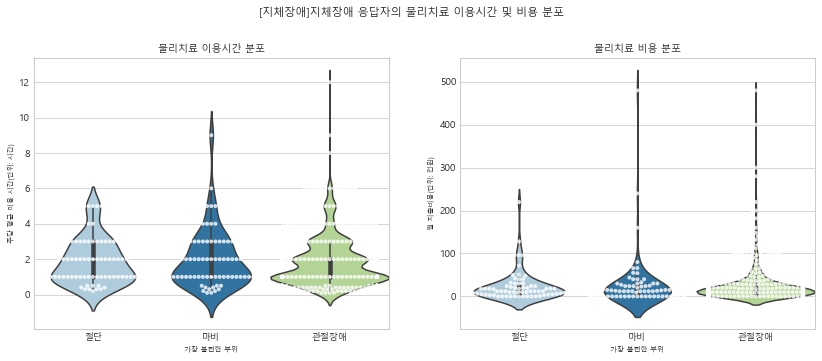

In [150]:
# 시각화
plt.style.use('seaborn-whitegrid')
plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(14, 5)

sns.violinplot(data = phy_data.loc[phy_data['물리치료-이용여부']==1].loc[phy_data['물리치료-이용시간'] != 99], 
               x='grp', y='물리치료-이용시간', palette='Paired', width=1, ax=ax1)
sns.swarmplot(data = phy_data.loc[phy_data['물리치료-이용여부']==1].loc[phy_data['물리치료-이용시간'] != 99], x='grp', y='물리치료-이용시간', color="white", alpha=0.8, size=4, ax=ax1)

ax1.set_title('물리치료 이용시간 분포', size = 10)
ax1.set_xlabel('가장 불편한 부위', size = 7)
ax1.set_xticklabels(['절단', '마비', '관절장애'], size = 9)
ax1.set_ylabel('주당 평균 이용 시간(단위: 시간)', size = 7)

sns.violinplot(data = phy_data.loc[phy_data['물리치료-이용여부']==1].loc[phy_data['물리치료-비용'] != 9999], 
               x='grp', y='물리치료-비용', palette='Paired', width=1, ax=ax2)
sns.swarmplot(data = phy_data.loc[phy_data['물리치료-이용여부']==1].loc[phy_data['물리치료-비용'] != 9999], x='grp', y='물리치료-비용', color="white", alpha=0.8, size=4, ax=ax2)
ax2.set_title('물리치료 비용 분포', size = 10)
ax2.set_xlabel('가장 불편한 부위', size = 7)
ax2.set_xticklabels(['절단', '마비', '관절장애'], size = 9)
ax2.set_ylabel('월 지출비용(단위: 천원)', size = 7)
# ax.set_ylim([-90, 600])

fig.suptitle('[지체장애]지체장애 응답자의 물리치료 이용시간 및 비용 분포', fontsize=11, y = 1.02)
# plt.savefig("pyvisual/지체장애/[지체장애] 지체장애 응답자의 물리치료 이용시간 및 비용 분포.png", dpi=300)
plt.show()

In [ ]:
### 

## 재활운동 및 체육의 필요성 인식과 재활운동 및 체육전문지도자의 필요성 인식 히트맵
### 뇌병변장애

In [257]:
df_copy = df 

In [258]:
cp_need = df_copy.loc[df_copy['주된 진단명(1)'] == 2][['장애인 체육지도자 필요여부', '재활운동체육 필요여부']].groupby(['장애인 체육지도자 필요여부', '재활운동체육 필요여부'])[['장애인 체육지도자 필요여부']].count().add_suffix('_Count').reset_index()
cp_need

,장애인 체육지도자 필요여부,재활운동체육 필요여부,장애인 체육지도자 필요여부_Count
0,1,1,100
1,1,2,11
2,2,1,31
3,2,2,265
4,3,1,2
5,3,2,25
6,3,3,34
7,4,2,1
8,4,3,2
9,4,4,5


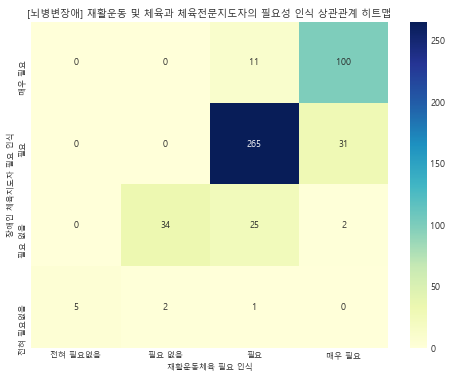

In [256]:
cp_need_pivot = cp_need.pivot('장애인 체육지도자 필요여부', '재활운동체육 필요여부', '장애인 체육지도자 필요여부_Count').fillna(0)
x_axis_labels = ['매우 필요', '필요', '필요 없음', '전혀 필요없음'] # labels for x-axis
y_axis_labels = ['매우 필요', '필요', '필요 없음', '전혀 필요없음'] # labels for y-axis

fig, ax = plt.subplots()
fig.set_size_inches(8, 6)

cmap = 'YlGnBu'
sns.heatmap(cp_need_pivot, annot=True, cmap=cmap, annot_kws={"size": 9},
            xticklabels=x_axis_labels, yticklabels=y_axis_labels, fmt='g') # fmt='g': e-notation을 일반표기법으로

# use matplotlib.colorbar.Colorbar object
cbar = ax.collections[0].colorbar
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=9)

plt.title('[뇌병변장애] 재활운동 및 체육과 체육전문지도자의 필요성 인식 상관관계 히트맵', fontsize=10)
ax.set_xlabel('재활운동체육 필요 인식', size = 8)
ax.tick_params (axis = 'x', labelsize = 8)
ax.tick_params (axis = 'y', labelsize = 8)
ax.set_ylabel('장애인 체육지도자 필요 인식', size = 8)
ax.invert_xaxis() # x축 순서 거꾸로

# plt.savefig("pyvisual/뇌병변장애/[뇌병변장애] 재활운동 및 체육과 체육전문지도자의 필요성 인식 상관관계 히트맵.png", dpi=300)
plt.show()

In [261]:
pd.crosstab(df_copy['장애인 체육지도자 필요여부'], df_copy['재활운동체육 필요여부'])

재활운동체육 필요여부,1,2,3,4
장애인 체육지도자 필요여부,,,,
1,119,13,0,0
2,34,309,0,0
3,3,28,39,0
4,0,1,2,6


In [262]:
chi, p, df, ex = stats.chi2_contingency(pd.crosstab(df_copy['장애인 체육지도자 필요여부'], df_copy['재활운동체육 필요여부']))
msg = "chi2 : {:.4f}, p-value : {:.4f}, df : {}".format(chi, p, df) 
print(msg)

chi2 : 967.5861, p-value : 0.0000, df : 9


In [226]:
# 크래머 V 계수
#load necessary packages and functions
import scipy.stats as stats
import numpy as np

# ceate data set
cp_need_data = np.array(df.loc[df['주된 진단명(1)'] == 2][['장애인 체육지도자 필요여부', '재활운동체육 필요여부']])

# Chi-squared test statistic, sample size, and minimum of rows and columns
X2 = stats.chi2_contingency(cp_need_data, correction=False)[0]
n = np.sum(cp_need_data)
minDim = min(cp_need_data.shape)-1

# calculate Cramer's V 
V = np.sqrt((X2/n) / minDim)

# display Cramer's V
print(V)

0.10695124192034455


### 지체장애

In [210]:
phy_need = phy_df[['장애인 체육지도자 필요여부', '재활운동체육 필요여부']].groupby(['장애인 체육지도자 필요여부', '재활운동체육 필요여부'])[['장애인 체육지도자 필요여부']].count().add_suffix('_Count').reset_index()
phy_need

,장애인 체육지도자 필요여부,재활운동체육 필요여부,장애인 체육지도자 필요여부_Count
0,1,1,479
1,1,2,76
2,2,1,124
3,2,2,1811
4,2,3,11
5,3,1,25
6,3,2,298
7,3,3,410
8,3,4,4
9,4,1,4


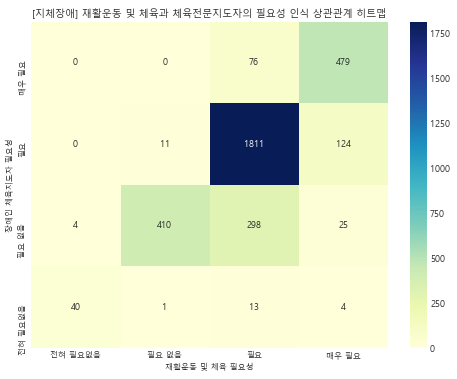

In [215]:
phy_need_pivot = phy_need.pivot('장애인 체육지도자 필요여부', '재활운동체육 필요여부', '장애인 체육지도자 필요여부_Count').fillna(0)
x_axis_labels = ['매우 필요', '필요', '필요 없음', '전혀 필요없음'] # labels for x-axis
y_axis_labels = ['매우 필요', '필요', '필요 없음', '전혀 필요없음'] # labels for y-axis

fig, ax = plt.subplots()
fig.set_size_inches(8, 6)

cmap = 'YlGnBu'
sns.heatmap(phy_need_pivot, annot=True, cmap=cmap, annot_kws={"size": 9},
            xticklabels=x_axis_labels, yticklabels=y_axis_labels, fmt='g') # fmt='g': e-notation을 일반표기법으로

# use matplotlib.colorbar.Colorbar object
cbar = ax.collections[0].colorbar
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=9)

plt.title('[지체장애] 재활운동 및 체육과 체육전문지도자의 필요성 인식 상관관계 히트맵', fontsize=10)
ax.set_xlabel('재활운동 및 체육 필요성', size = 8)
ax.tick_params (axis = 'x', labelsize = 8)
ax.tick_params (axis = 'y', labelsize = 8)
ax.set_ylabel('장애인 체육지도자 필요성', size = 8)
ax.invert_xaxis() # x축 순서 거꾸로

plt.savefig("pyvisual/지체장애/[지체장애]재활운동 및 체육과 체육전문지도자의 필요성 인식 상관관계 히트맵.png", dpi=300)
plt.show()

In [264]:
pd.crosstab(phy_df['장애인 체육지도자 필요여부'], phy_df['재활운동체육 필요여부'])

재활운동체육 필요여부,1,2,3,4
장애인 체육지도자 필요여부,,,,
1,479,76,0,0
2,124,1811,11,0
3,25,298,410,4
4,4,13,1,40


In [265]:
chi, p, df, ex = stats.chi2_contingency(pd.crosstab(phy_df['장애인 체육지도자 필요여부'], phy_df['재활운동체육 필요여부']))
msg = "chi2 : {:.4f}, p-value : {:.4f}, df : {}".format(chi, p, df) 
print(msg)

chi2 : 5485.1678, p-value : 0.0000, df : 9


---
## 물리치료 및 바우처 여부
### 뇌졸중(뇌경색, 뇌출혈)

In [22]:
phy_vou = df[df['주된 진단명(1)']==2].loc[df['물리치료-이용여부']==1][['물리치료-재활치료바우처여부', '물리치료-바우처재원인지여부', 
                                                '물리치료-제공기관(1)', '물리치료-제공기관(2)', '물리치료-제공기관(3)', '물리치료-제공기관(4)', '물리치료-제공기관(5)']]
phy_vou

,물리치료-재활치료바우처여부,물리치료-바우처재원인지여부,물리치료-제공기관(1),물리치료-제공기관(2),물리치료-제공기관(3),물리치료-제공기관(4),물리치료-제공기관(5)
13,2.0,0.0,0.0,0.0,0.0,0.0,0.0
42,2.0,0.0,0.0,0.0,0.0,0.0,0.0
85,2.0,0.0,0.0,0.0,0.0,0.0,0.0
118,2.0,0.0,0.0,0.0,0.0,0.0,0.0
127,2.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
6348,2.0,0.0,0.0,0.0,0.0,0.0,0.0
6455,2.0,0.0,0.0,0.0,0.0,0.0,0.0
6474,2.0,0.0,0.0,0.0,0.0,0.0,0.0
6481,2.0,0.0,0.0,0.0,0.0,0.0,0.0


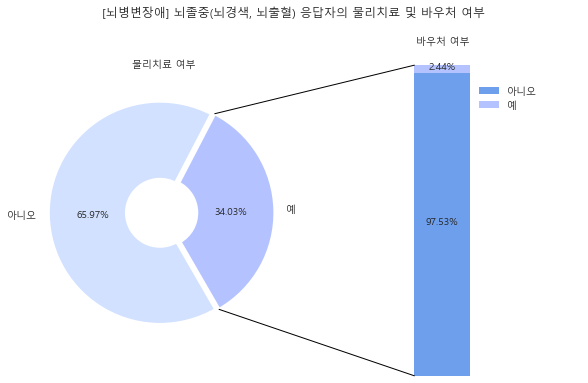

In [85]:
from matplotlib.patches import ConnectionPatch

# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
fig.subplots_adjust(wspace=0)

# pie chart parameters
ratios = [162, 314]
labels = ['예', '아니오']
colors = ['#b4c3ff', '#d2e1ff', '#e8f5ff']
explode = [0, 0.03]
angle = -180 * ratios[0]
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 3}
ax1.set_title('물리치료 여부', size = 10)

ax1.pie(ratios, autopct='%0.2f%%', startangle=300, colors = colors, labels=labels, explode=explode, wedgeprops=wedgeprops)

# bar chart parameters
xpos = 0
bottom = 0
ratios = [158/162, 4/164]
width = .2
colors = ['#6e9fed', '#b4c3ff', '#e8f5ff']

for j in range(len(ratios)):
    height = ratios[j]
    ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos, ypos, "%0.2f%%" % (ax2.patches[j].get_height()*100),
             ha='center')

ax2.set_title('바우처 여부', size = 10)
ax2.legend(('아니오', '예'), 
           loc='center left', bbox_to_anchor=(0.6, 0.85)) # 범례 위치 조정
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
# get the wedge data
theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
center, r = ax1.patches[0].center, ax1.patches[0].r
bar_height = sum([item.get_height() for item in ax2.patches])

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(1)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(1)

fig.suptitle('[뇌병변장애] 뇌졸중(뇌경색, 뇌출혈) 응답자의 물리치료 및 바우처 여부', fontsize=12, y = .98)
# plt.savefig('pyvisual/뇌병변장애/[뇌병변장애] 뇌졸중(뇌경색, 뇌출혈) 응답자의 물리치료 및 바우처 여부.png', dpi=300)
plt.show()

In [23]:
phy_vou.loc[phy_vou['물리치료-재활치료바우처여부'] == 1]

,물리치료-재활치료바우처여부,물리치료-바우처재원인지여부,물리치료-제공기관(1),물리치료-제공기관(2),물리치료-제공기관(3),물리치료-제공기관(4),물리치료-제공기관(5)
748,1.0,1.0,2.0,2.0,2.0,1.0,2.0
1314,1.0,1.0,2.0,2.0,2.0,1.0,2.0
3721,1.0,1.0,2.0,2.0,2.0,1.0,2.0
3856,1.0,1.0,2.0,2.0,1.0,2.0,2.0


In [24]:
print('재활치료서비스를 받고 있는 응답자 총 162명 중 재활치료 바우처여부 "예" 응답자:', len(phy_vou.loc[phy_vou['물리치료-재활치료바우처여부'] == 1]), '명')

재활치료서비스를 받고 있는 응답자 총 162명 중 재활치료 바우처여부 "예" 응답자: 4 명


In [25]:
pd.DataFrame({'제공기관': ['지자체', '지자체', '지자체', '고용노동부']})

,제공기관
0,지자체
1,지자체
2,지자체
3,고용노동부


### 뇌손상

In [30]:
phy_vou = df[df['주된 진단명(1)']==3].loc[df['물리치료-이용여부']==1][['물리치료-재활치료바우처여부', '물리치료-바우처재원인지여부', 
                                                '물리치료-제공기관(1)', '물리치료-제공기관(2)', '물리치료-제공기관(3)', '물리치료-제공기관(4)', '물리치료-제공기관(5)']]
phy_vou

,물리치료-재활치료바우처여부,물리치료-바우처재원인지여부,물리치료-제공기관(1),물리치료-제공기관(2),물리치료-제공기관(3),물리치료-제공기관(4),물리치료-제공기관(5)
335,2.0,0.0,0.0,0.0,0.0,0.0,0.0
414,2.0,0.0,0.0,0.0,0.0,0.0,0.0
498,1.0,1.0,1.0,2.0,2.0,2.0,2.0
1309,2.0,0.0,0.0,0.0,0.0,0.0,0.0
1760,1.0,1.0,2.0,1.0,2.0,2.0,2.0
2395,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2589,2.0,0.0,0.0,0.0,0.0,0.0,0.0
3007,2.0,0.0,0.0,0.0,0.0,0.0,0.0
3289,2.0,0.0,0.0,0.0,0.0,0.0,0.0
3295,2.0,0.0,0.0,0.0,0.0,0.0,0.0


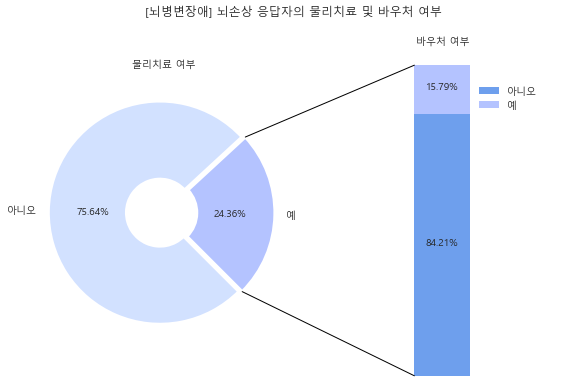

In [90]:
from matplotlib.patches import ConnectionPatch

# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
fig.subplots_adjust(wspace=0)

# pie chart parameters
ratios = [19, 59]
labels = ['예', '아니오']
colors = ['#b4c3ff', '#d2e1ff', '#e8f5ff']
explode = [0, 0.03]
angle = -180 * ratios[0]
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 3}
ax1.set_title('물리치료 여부', size = 10)

ax1.pie(ratios, autopct='%0.2f%%', startangle=315, colors = colors, labels=labels, explode=explode, wedgeprops=wedgeprops)

# bar chart parameters
xpos = 0
bottom = 0
ratios = [16/19, 3/19]
width = .2
colors = ['#6e9fed', '#b4c3ff', '#e8f5ff']

for j in range(len(ratios)):
    height = ratios[j]
    ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos, ypos, "%0.2f%%" % (ax2.patches[j].get_height()*100),
             ha='center')

ax2.set_title('바우처 여부', size = 10)
ax2.legend(('아니오', '예'),
           loc='center left', bbox_to_anchor=(0.6, 0.85)) # 범례 위치 조정
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)


# use ConnectionPatch to draw lines between the two plots
# get the wedge data
theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
center, r = ax1.patches[0].center, ax1.patches[0].r
bar_height = sum([item.get_height() for item in ax2.patches])

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(1)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(1)

fig.suptitle('[뇌병변장애] 뇌손상 응답자의 물리치료 및 바우처 여부', fontsize=12, y = .98)
# plt.savefig('pyvisual/뇌병변장애/[뇌병변장애] 뇌손상 응답자의 물리치료 및 바우처 여부.png', dpi=300)
plt.show()

In [31]:
phy_vou.loc[phy_vou['물리치료-재활치료바우처여부'] == 1]

,물리치료-재활치료바우처여부,물리치료-바우처재원인지여부,물리치료-제공기관(1),물리치료-제공기관(2),물리치료-제공기관(3),물리치료-제공기관(4),물리치료-제공기관(5)
498,1.0,1.0,1.0,2.0,2.0,2.0,2.0
1760,1.0,1.0,2.0,1.0,2.0,2.0,2.0
4510,1.0,1.0,2.0,2.0,2.0,1.0,2.0


In [28]:
print('재활치료서비스를 받고 있는 응답자 총 19명 중 재활치료 바우처여부 "예" 응답자:', len(phy_vou.loc[phy_vou['물리치료-재활치료바우처여부'] == 1]), '명')

재활치료서비스를 받고 있는 응답자 총 162명 중 재활치료 바우처여부 "예" 응답자: 3 명


In [32]:
pd.DataFrame({'제공기관': ['보건복지부', '교육부', '지자체']})

,제공기관
0,보건복지부
1,교육부
2,지자체


### 지체장애인

In [92]:
raw_df[raw_df['지체장애여부']==1].loc[raw_df['물리치료-이용여부']==1]

,조사표 종류,가구원 일련번호(장애인),가구원 일련번호(응답자),조사지역(시도),응답자 유형,대리응답이유,장애유형확인1,장애유형확인2,장애유형확인3,개인번호,...,"보육,교육비","보호,간병비",재활기관이용료,통신비,"장애인보조기기 구입,유지비",부모사후 및 노후대비비,기타.4,월평균 총 추가비용,wg_p,ws_p
1,2,1,1,21,NaN,NaN,1,NaN,NaN,1,...,0,0,0,0,0,0,0,0,444.377794,1.132070
14,2,2,2,21,NaN,NaN,1,NaN,NaN,2,...,0,70,0,0,0,0,0,284,444.377794,1.132070
16,2,5,5,21,NaN,NaN,1,NaN,NaN,5,...,0,0,0,0,0,0,0,0,474.522473,1.208864
18,2,2,2,21,NaN,NaN,1,NaN,NaN,2,...,0,100,0,0,0,0,0,234,444.377794,1.132070
23,2,2,2,38,NaN,NaN,1,NaN,NaN,2,...,0,0,0,0,0,0,0,105,684.116317,1.742813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6524,2,2,2,31,NaN,NaN,1,NaN,NaN,2,...,0,0,0,0,0,0,0,21,61.800775,0.157440
6538,2,2,2,31,NaN,NaN,1,NaN,NaN,2,...,0,0,0,0,0,0,0,129,61.800775,0.157440
6539,2,1,1,31,NaN,NaN,1,NaN,NaN,1,...,0,0,0,0,167,0,0,245,61.800775,0.157440
6540,2,2,2,31,NaN,NaN,1,NaN,NaN,2,...,0,0,0,0,54,0,0,246,65.993074,0.168120


3,296명의 지체장애인 중 물리치료를 이용한 사람은 1,052명으로 나타남.

In [105]:
raw_df[raw_df['지체장애여부']==1].loc[raw_df['물리치료-이용여부']==1].loc[raw_df['물리치료-재활치료바우처여부']==1]

,조사표 종류,가구원 일련번호(장애인),가구원 일련번호(응답자),조사지역(시도),응답자 유형,대리응답이유,장애유형확인1,장애유형확인2,장애유형확인3,개인번호,...,"보육,교육비","보호,간병비",재활기관이용료,통신비,"장애인보조기기 구입,유지비",부모사후 및 노후대비비,기타.4,월평균 총 추가비용,wg_p,ws_p
404,2,1,1,36,NaN,NaN,1,NaN,NaN,1,...,0,0,0,0,0,0,0,6,330.400743,0.841709
939,2,1,1,34,NaN,NaN,1,NaN,NaN,1,...,0,0,0,0,0,0,0,3,153.850330,0.391940
1451,2,1,1,32,NaN,NaN,1,NaN,NaN,1,...,0,0,0,0,0,0,0,21,145.275638,0.370095
3471,2,1,1,21,NaN,NaN,1,NaN,NaN,1,...,0,0,0,0,0,0,0,0,444.377794,1.132070
3490,2,2,2,21,NaN,NaN,1,NaN,NaN,2,...,0,0,0,0,0,0,340,440,444.377794,1.132070
3515,2,2,1,21,3.0,1.0,1,NaN,NaN,2,...,0,2170,0,0,0,0,100,3800,474.522473,1.208864
3557,2,1,1,38,NaN,NaN,1,4.0,NaN,1,...,0,0,0,8,150,0,0,188,113.180736,0.288332
3777,2,1,1,36,NaN,NaN,1,NaN,NaN,1,...,0,0,20,15,0,0,0,55,136.555743,0.347881
3979,2,2,2,36,NaN,NaN,1,NaN,NaN,2,...,0,0,0,0,57,0,0,85,330.400743,0.841709
3992,2,1,1,29,NaN,NaN,1,NaN,NaN,1,...,0,0,0,0,0,0,0,20,238.154719,0.606708


물리치료를 이용한 지체장애인 중 바우처 여부에 '예' 응답한 사람은 총 12명

In [104]:
raw_df[raw_df['지체장애여부']==1].loc[raw_df['물리치료-이용여부']==1].loc[raw_df['물리치료-재활치료바우처여부']==1][['물리치료-제공기관(1)', '물리치료-제공기관(2)', '물리치료-제공기관(3)', '물리치료-제공기관(4)', '물리치료-제공기관(5)']]

,물리치료-제공기관(1),물리치료-제공기관(2),물리치료-제공기관(3),물리치료-제공기관(4),물리치료-제공기관(5)
404,1.0,2.0,2.0,2.0,2.0
939,0.0,0.0,0.0,0.0,0.0
1451,2.0,2.0,2.0,1.0,2.0
3471,1.0,2.0,2.0,2.0,2.0
3490,1.0,2.0,2.0,2.0,2.0
3515,1.0,2.0,2.0,2.0,2.0
3557,1.0,2.0,2.0,2.0,2.0
3777,2.0,2.0,2.0,1.0,2.0
3979,0.0,0.0,0.0,0.0,0.0
3992,0.0,0.0,0.0,0.0,0.0


바우처 여부에 '예'라고 응답한 12명 중 바우처 재원 인지 여부에 '아니오' 응답한 사람은 총 3명이며 제공기관은 남은 9명에서 파악 가능

In [106]:
pd.DataFrame({'제공기관': ['보건복지부', '지자체', '보건복지부', '보건복지부', '보건복지부', '보건복지부', '지자체', '지자체', '지자체']})

,제공기관
0,보건복지부
1,지자체
2,보건복지부
3,보건복지부
4,보건복지부
5,보건복지부
6,지자체
7,지자체
8,지자체


### 지체장애 中 절단 장애

In [115]:
df1.loc[raw_df['물리치료-이용여부']==1].head()

,조사표 종류,가구원 일련번호(장애인),가구원 일련번호(응답자),조사지역(시도),응답자 유형,대리응답이유,장애유형확인1,장애유형확인2,장애유형확인3,개인번호,...,"보호,간병비",재활기관이용료,통신비,"장애인보조기기 구입,유지비",부모사후 및 노후대비비,기타.4,월평균 총 추가비용,wg_p,ws_p,가장 불편한 부위2
1,2,1,1,21,NaN,NaN,1,NaN,NaN,1,...,0,0,0,0,0,0,0,444.377794,1.132070,"[상지 절단]손목미만(손등, 손가락)~어깨 이상"
16,2,5,5,21,NaN,NaN,1,NaN,NaN,5,...,0,0,0,0,0,0,0,474.522473,1.208864,"[상지 절단]손목미만(손등, 손가락)~어깨 이상"
121,2,1,1,21,NaN,NaN,1,NaN,NaN,1,...,0,0,0,0,0,0,40,444.377794,1.132070,"[상지 절단]손목미만(손등, 손가락)~어깨 이상"
129,2,1,1,38,NaN,NaN,1,NaN,NaN,1,...,0,0,0,0,0,0,125,113.180736,0.288332,"[상지 절단]손목미만(손등, 손가락)~어깨 이상"
198,2,1,1,21,NaN,NaN,1,NaN,NaN,1,...,0,0,0,0,0,0,0,444.377794,1.132070,"[상지 절단]손목미만(손등, 손가락)~어깨 이상"


절단 장애 436명 중 물리치료 이용한 사람은 71명

In [114]:
df1.loc[df1['물리치료-이용여부']==1].loc[df1['물리치료-재활치료바우처여부']==1]

,조사표 종류,가구원 일련번호(장애인),가구원 일련번호(응답자),조사지역(시도),응답자 유형,대리응답이유,장애유형확인1,장애유형확인2,장애유형확인3,개인번호,...,"보호,간병비",재활기관이용료,통신비,"장애인보조기기 구입,유지비",부모사후 및 노후대비비,기타.4,월평균 총 추가비용,wg_p,ws_p,가장 불편한 부위2


71명 중 재활치료 바우처 여부 '예' 응답한 사람 없음

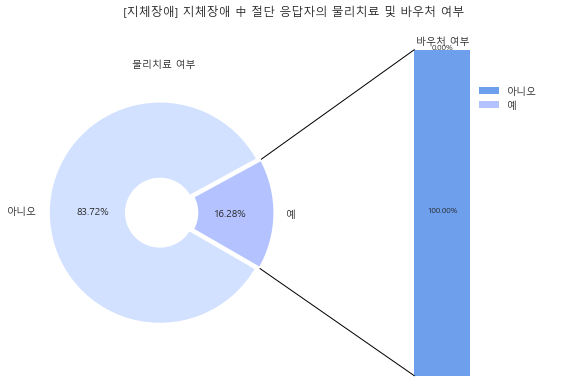

In [138]:
from matplotlib.patches import ConnectionPatch

# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
fig.subplots_adjust(wspace=0)

# pie chart parameters
ratios = [71, 436-71]
labels = ['예', '아니오']
colors = ['#b4c3ff', '#d2e1ff', '#e8f5ff']
explode = [0, 0.03]
angle = -180 * ratios[0]
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 3}
ax1.set_title('물리치료 여부', size = 10)

ax1.pie(ratios, autopct='%0.2f%%', startangle=330, colors = colors, labels=labels, explode=explode, wedgeprops=wedgeprops)

# bar chart parameters
xpos = 0
bottom = 0
ratios = [71/71, 0/71]
width = .2
colors = ['#6e9fed', '#b4c3ff', '#e8f5ff']

for j in range(len(ratios)):
    height = ratios[j]
    ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos, ypos, "%0.2f%%" % (ax2.patches[j].get_height()*100),
             ha='center', size = 8)

ax2.set_title('바우처 여부', size = 10)
ax2.legend(('아니오', '예'),
           loc='center left', bbox_to_anchor=(0.6, 0.85)) # 범례 위치 조정
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
# get the wedge data
theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
center, r = ax1.patches[0].center, ax1.patches[0].r
bar_height = sum([item.get_height() for item in ax2.patches])

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(1)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(1)

fig.suptitle('[지체장애] 지체장애 中 절단 응답자의 물리치료 및 바우처 여부', fontsize=12, y = .98)
# plt.savefig('pyvisual/지체장애/[지체장애]지체장애 中 절단 응답자의 물리치료 및 바우처 여부.png', dpi=300)
plt.show()

### 지체장애 中 마비 장애

In [133]:
df2.loc[raw_df['물리치료-이용여부']==1].head()

,조사표 종류,가구원 일련번호(장애인),가구원 일련번호(응답자),조사지역(시도),응답자 유형,대리응답이유,장애유형확인1,장애유형확인2,장애유형확인3,개인번호,...,"보호,간병비",재활기관이용료,통신비,"장애인보조기기 구입,유지비",부모사후 및 노후대비비,기타.4,월평균 총 추가비용,wg_p,ws_p,가장 불편한 부위2
79,2,1,1,21,NaN,NaN,1,NaN,NaN,1,...,0,0,0,10,0,0,72,444.377794,1.132070,[상지 마비]상지 한쪽 or 양쪽
107,2,4,1,38,5.0,1.0,1,NaN,NaN,4,...,0,0,0,38,0,0,63,684.116317,1.742813,[상지 마비]상지 한쪽 or 양쪽
116,2,1,1,21,NaN,NaN,1,NaN,NaN,1,...,0,0,0,0,0,0,47,444.377794,1.132070,[하지 마비]하지 한쪽 or 양쪽
209,2,1,1,38,NaN,NaN,1,NaN,NaN,1,...,0,0,0,0,0,0,20,292.376056,0.641388,[상지 마비]상지 한쪽 or 양쪽
210,2,2,2,38,NaN,NaN,1,NaN,NaN,2,...,0,0,0,6,0,0,85,113.180736,0.288332,[하지 마비]하지 한쪽 or 양쪽


마비 장애 417명 중 물리치료 이용한 사람은 90명

In [136]:
df2.loc[df2['물리치료-이용여부']==1].loc[df2['물리치료-재활치료바우처여부']==1][['물리치료-제공기관(1)', '물리치료-제공기관(2)', '물리치료-제공기관(3)', '물리치료-제공기관(4)', '물리치료-제공기관(5)']]

,물리치료-제공기관(1),물리치료-제공기관(2),물리치료-제공기관(3),물리치료-제공기관(4),물리치료-제공기관(5)
3471,1.0,2.0,2.0,2.0,2.0
3515,1.0,2.0,2.0,2.0,2.0


90명 중 재활치료 바우처 여부 '예' 응답한 사람 2명

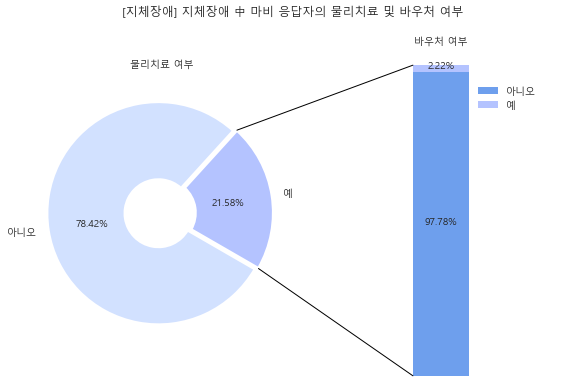

In [141]:
from matplotlib.patches import ConnectionPatch

# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
fig.subplots_adjust(wspace=0)

# pie chart parameters
ratios = [90, 417-90]
labels = ['예', '아니오']
colors = ['#b4c3ff', '#d2e1ff', '#e8f5ff']
explode = [0, 0.03]
angle = -180 * ratios[0]
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 3}
ax1.set_title('물리치료 여부', size = 10)

ax1.pie(ratios, autopct='%0.2f%%', startangle=330, colors = colors, labels=labels, explode=explode, wedgeprops=wedgeprops)

# bar chart parameters
xpos = 0
bottom = 0
ratios = [(90-2)/90, 2/90]
width = .2
colors = ['#6e9fed', '#b4c3ff', '#e8f5ff']

for j in range(len(ratios)):
    height = ratios[j]
    ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos, ypos, "%0.2f%%" % (ax2.patches[j].get_height()*100),
             ha='center')

ax2.set_title('바우처 여부', size = 10)
ax2.legend(('아니오', '예'),
           loc='center left', bbox_to_anchor=(0.6, 0.85)) # 범례 위치 조정
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
# get the wedge data
theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
center, r = ax1.patches[0].center, ax1.patches[0].r
bar_height = sum([item.get_height() for item in ax2.patches])

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(1)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(1)

fig.suptitle('[지체장애] 지체장애 中 마비 응답자의 물리치료 및 바우처 여부', fontsize=12, y = .98)
# plt.savefig('pyvisual/지체장애/[지체장애]지체장애 中 마비 응답자의 물리치료 및 바우처 여부.png', dpi=300)
plt.show()

### 지체장애 中 관절장애

In [146]:
df3.loc[raw_df['물리치료-이용여부']==1].head()

,조사표 종류,가구원 일련번호(장애인),가구원 일련번호(응답자),조사지역(시도),응답자 유형,대리응답이유,장애유형확인1,장애유형확인2,장애유형확인3,개인번호,...,"보호,간병비",재활기관이용료,통신비,"장애인보조기기 구입,유지비",부모사후 및 노후대비비,기타.4,월평균 총 추가비용,wg_p,ws_p,가장 불편한 부위2
14,2,2,2,21,NaN,NaN,1,NaN,NaN,2,...,70,0,0,0,0,0,284,444.377794,1.132070,[하지 관절장애]고관절(엉덩이)~척추(디스크)
18,2,2,2,21,NaN,NaN,1,NaN,NaN,2,...,100,0,0,0,0,0,234,444.377794,1.132070,[하지 관절장애]고관절(엉덩이)~척추(디스크)
23,2,2,2,38,NaN,NaN,1,NaN,NaN,2,...,0,0,0,0,0,0,105,684.116317,1.742813,[하지 관절장애]고관절(엉덩이)~척추(디스크)
32,2,2,2,38,NaN,NaN,1,NaN,NaN,2,...,0,0,0,0,0,0,28,684.116317,1.742813,[하지 관절장애]고관절(엉덩이)~척추(디스크)
48,2,2,2,38,NaN,NaN,1,NaN,NaN,2,...,140,0,0,5,0,0,231,227.343545,0.498726,[하지 관절장애]고관절(엉덩이)~척추(디스크)


관절장애 2,258명 중 물리치료 이용한 사람은 847명

In [147]:
df3.loc[df3['물리치료-이용여부']==1].loc[df3['물리치료-재활치료바우처여부']==1][['물리치료-제공기관(1)', '물리치료-제공기관(2)', '물리치료-제공기관(3)', '물리치료-제공기관(4)', '물리치료-제공기관(5)']]

,물리치료-제공기관(1),물리치료-제공기관(2),물리치료-제공기관(3),물리치료-제공기관(4),물리치료-제공기관(5)
404,1.0,2.0,2.0,2.0,2.0
939,0.0,0.0,0.0,0.0,0.0
1451,2.0,2.0,2.0,1.0,2.0
3557,1.0,2.0,2.0,2.0,2.0
3777,2.0,2.0,2.0,1.0,2.0
3979,0.0,0.0,0.0,0.0,0.0
3992,0.0,0.0,0.0,0.0,0.0
5445,2.0,2.0,2.0,1.0,2.0
6242,2.0,2.0,2.0,1.0,2.0


847명 중 재활치료 바우처 여부 '예' 응답한 사람 9명

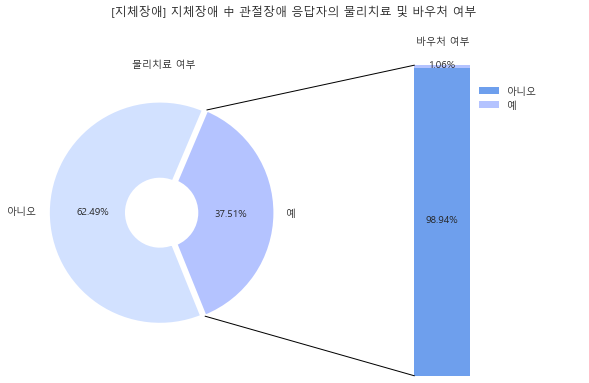

In [155]:
from matplotlib.patches import ConnectionPatch

# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
fig.subplots_adjust(wspace=0)

# pie chart parameters
ratios = [847, 2258-847]
labels = ['예', '아니오']
colors = ['#b4c3ff', '#d2e1ff', '#e8f5ff']
explode = [0, 0.03]
angle = -180 * ratios[0]
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 3}
ax1.set_title('물리치료 여부', size = 10)

ax1.pie(ratios, autopct='%0.2f%%', startangle=292, colors = colors, labels=labels, explode=explode, wedgeprops=wedgeprops)

# bar chart parameters
xpos = 0
bottom = 0
ratios = [(847-9)/847, 9/847]
width = .2
colors = ['#6e9fed', '#b4c3ff', '#e8f5ff']

for j in range(len(ratios)):
    height = ratios[j]
    ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos, ypos, "%0.2f%%" % (ax2.patches[j].get_height()*100),
             ha='center')

ax2.set_title('바우처 여부', size = 10)
ax2.legend(('아니오', '예'),
           loc='center left', bbox_to_anchor=(0.6, 0.85)) # 범례 위치 조정
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
# get the wedge data
theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
center, r = ax1.patches[0].center, ax1.patches[0].r
bar_height = sum([item.get_height() for item in ax2.patches])

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(1)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(1)

fig.suptitle('[지체장애] 지체장애 中 관절장애 응답자의 물리치료 및 바우처 여부', fontsize=12, y = .98)
# plt.savefig('pyvisual/지체장애/[지체장애]지체장애 中 관절장애 응답자의 물리치료 및 바우처 여부.png', dpi=300)
plt.show()

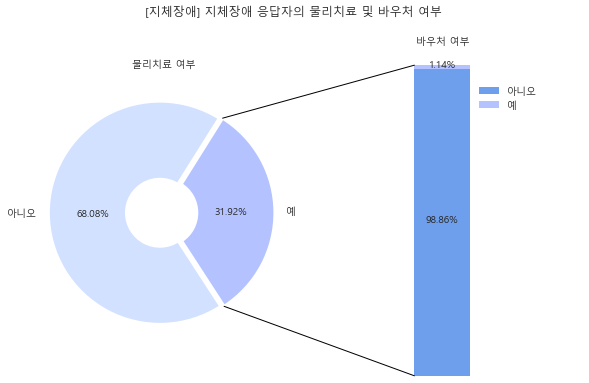

In [101]:
from matplotlib.patches import ConnectionPatch

# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
fig.subplots_adjust(wspace=0)

# pie chart parameters
ratios = [1052, 3296-1052]
labels = ['예', '아니오']
colors = ['#b4c3ff', '#d2e1ff', '#e8f5ff']
explode = [0, 0.03]
angle = -180 * ratios[0]
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 3}
ax1.set_title('물리치료 여부', size = 10)

ax1.pie(ratios, autopct='%0.2f%%', startangle=303, colors = colors, labels=labels, explode=explode, wedgeprops=wedgeprops)

# bar chart parameters
xpos = 0
bottom = 0
ratios = [(1052-12)/1052, 12/1052]
width = .2
colors = ['#6e9fed', '#b4c3ff', '#e8f5ff']

for j in range(len(ratios)):
    height = ratios[j]
    ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos, ypos, "%0.2f%%" % (ax2.patches[j].get_height()*100),
             ha='center')

ax2.set_title('바우처 여부', size = 10)
ax2.legend(('아니오', '예'),
           loc='center left', bbox_to_anchor=(0.6, 0.85)) # 범례 위치 조정
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)


# use ConnectionPatch to draw lines between the two plots
# get the wedge data
theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
center, r = ax1.patches[0].center, ax1.patches[0].r
bar_height = sum([item.get_height() for item in ax2.patches])

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(1)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(1)

fig.suptitle('[지체장애] 지체장애 응답자의 물리치료 및 바우처 여부', fontsize=12, y = .98)
# plt.savefig('pyvisual/지체장애/[지체장애]지체장애 응답자의 물리치료 및 바우처 여부.png', dpi=300)
plt.show()

---
## 작업치료 및 바우처 여부
### 뇌졸중(뇌경색, 뇌출혈)

In [4]:
occ_vou = df[df['주된 진단명(1)']==2].loc[df['작업치료-이용여부']==1][['작업치료-재활치료바우처여부', '작업치료-바우처재원인지여부', 
                                                '작업치료-제공기관 (1)', '작업치료-제공기관 (2)', '작업치료-제공기관 (3)', '작업치료-제공기관 (4)', '작업치료-제공기관 (5)']]
occ_vou

,작업치료-재활치료바우처여부,작업치료-바우처재원인지여부,작업치료-제공기관 (1),작업치료-제공기관 (2),작업치료-제공기관 (3),작업치료-제공기관 (4),작업치료-제공기관 (5)
993,2.0,0.0,0.0,0.0,0.0,0.0,0.0
1287,1.0,1.0,2.0,2.0,2.0,1.0,2.0
1492,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2136,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2221,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2334,2.0,0.0,0.0,0.0,0.0,0.0,0.0
3170,2.0,0.0,0.0,0.0,0.0,0.0,0.0
3844,2.0,0.0,0.0,0.0,0.0,0.0,0.0
3856,2.0,0.0,0.0,0.0,0.0,0.0,0.0
3977,2.0,0.0,0.0,0.0,0.0,0.0,0.0


뇌졸중 응답자 476명 중 작업치료 응답자는 17명  
17명 중 바우처 여부에 '예' 응답자는 총 2명, 이들의 바우처 제공기관은 모두 '지자체'

### 뇌손상

In [7]:
occ_vou = df[df['주된 진단명(1)']==3].loc[df['작업치료-이용여부']==1][['작업치료-재활치료바우처여부', '작업치료-바우처재원인지여부', 
                                                '작업치료-제공기관 (1)', '작업치료-제공기관 (2)', '작업치료-제공기관 (3)', '작업치료-제공기관 (4)', '작업치료-제공기관 (5)']]
occ_vou

,작업치료-재활치료바우처여부,작업치료-바우처재원인지여부,작업치료-제공기관 (1),작업치료-제공기관 (2),작업치료-제공기관 (3),작업치료-제공기관 (4),작업치료-제공기관 (5)
498,1.0,1.0,1.0,2.0,2.0,2.0,2.0
1309,2.0,0.0,0.0,0.0,0.0,0.0,0.0
3295,1.0,1.0,1.0,2.0,2.0,2.0,2.0
3496,2.0,0.0,0.0,0.0,0.0,0.0,0.0


뇌손상 응답자 78명 중 작업치료 응답자는 4명  
4명 중 바우처 여부에 '예' 응답자는 총 2명, 이들의 바우처 제공기관은 모두 '보건복지부'

### 지체장애인

In [9]:
raw_df[raw_df['지체장애여부']==1].loc[raw_df['작업치료-이용여부']==1]

,조사표 종류,가구원 일련번호(장애인),가구원 일련번호(응답자),조사지역(시도),응답자 유형,대리응답이유,장애유형확인1,장애유형확인2,장애유형확인3,개인번호,...,"보육,교육비","보호,간병비",재활기관이용료,통신비,"장애인보조기기 구입,유지비",부모사후 및 노후대비비,기타.4,월평균 총 추가비용,wg_p,ws_p
429,2,1,1,24,NaN,NaN,1,NaN,NaN,1,...,0,0,0,0,133,0,100,743,613.666654,1.563340
700,2,2,2,36,NaN,NaN,1,NaN,NaN,2,...,0,0,0,0,0,0,0,12,136.555743,0.347881
878,2,1,1,36,NaN,NaN,1,NaN,NaN,1,...,0,0,0,0,0,0,0,32,127.880855,0.325781
879,2,2,2,36,NaN,NaN,1,NaN,NaN,2,...,0,0,0,0,0,0,0,48,127.880855,0.325781
1389,2,2,2,32,NaN,NaN,1,NaN,NaN,2,...,0,600,0,0,92,0,0,1974,710.830302,1.810868
2136,2,5,2,11,5.0,1.0,1,2.0,5.0,5,...,0,1000,0,1,0,0,300,1763,702.766756,1.790326
2460,2,4,4,11,NaN,NaN,1,NaN,NaN,4,...,0,0,0,0,17,100,0,293,675.990876,1.722113
3124,2,1,1,34,NaN,NaN,1,NaN,NaN,1,...,0,0,0,0,181,0,0,181,164.286874,0.418527
3515,2,2,1,21,3.0,1.0,1,NaN,NaN,2,...,0,2170,0,0,0,0,100,3800,474.522473,1.208864
3575,2,1,1,11,NaN,NaN,1,NaN,NaN,1,...,0,0,0,0,14,0,0,67,633.047646,1.612713


In [17]:
raw_df[raw_df['지체장애여부']==1].loc[raw_df['작업치료-이용여부']==1][['작업치료-재활치료바우처여부', '작업치료-바우처재원인지여부', 
                                                '작업치료-제공기관 (1)', '작업치료-제공기관 (2)', '작업치료-제공기관 (3)', '작업치료-제공기관 (4)', '작업치료-제공기관 (5)']]

,작업치료-재활치료바우처여부,작업치료-바우처재원인지여부,작업치료-제공기관 (1),작업치료-제공기관 (2),작업치료-제공기관 (3),작업치료-제공기관 (4),작업치료-제공기관 (5)
429,2.0,0.0,0.0,0.0,0.0,0.0,0.0
700,2.0,0.0,0.0,0.0,0.0,0.0,0.0
878,2.0,0.0,0.0,0.0,0.0,0.0,0.0
879,2.0,0.0,0.0,0.0,0.0,0.0,0.0
1389,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2136,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2460,2.0,0.0,0.0,0.0,0.0,0.0,0.0
3124,2.0,0.0,0.0,0.0,0.0,0.0,0.0
3515,1.0,1.0,1.0,2.0,2.0,2.0,2.0
3575,2.0,0.0,0.0,0.0,0.0,0.0,0.0


지체장애인 총 3,296명 중 작업치료 응답자 14명  
작업치료를 이용한 14명의 지체장애인 중 바우처 여부에 '예' 응답한 사람은 총 2명, 이들의 제공기관은 보건복지부와 지자체

### 지체장애 中 절단 장애

In [34]:
df1.loc[df1['작업치료-이용여부']==1]

,조사표 종류,가구원 일련번호(장애인),가구원 일련번호(응답자),조사지역(시도),응답자 유형,대리응답이유,장애유형확인1,장애유형확인2,장애유형확인3,개인번호,...,"보호,간병비",재활기관이용료,통신비,"장애인보조기기 구입,유지비",부모사후 및 노후대비비,기타.4,월평균 총 추가비용,wg_p,ws_p,가장 불편한 부위2
3124,2,1,1,34,NaN,NaN,1,NaN,NaN,1,...,0,0,0,181,0,0,181,164.286874,0.418527,"[상지 절단]손목미만(손등, 손가락)~어깨 이상"


In [25]:
df1.loc[df1['작업치료-이용여부']==1].loc[df1['작업치료-재활치료바우처여부']==1]

,조사표 종류,가구원 일련번호(장애인),가구원 일련번호(응답자),조사지역(시도),응답자 유형,대리응답이유,장애유형확인1,장애유형확인2,장애유형확인3,개인번호,...,"보호,간병비",재활기관이용료,통신비,"장애인보조기기 구입,유지비",부모사후 및 노후대비비,기타.4,월평균 총 추가비용,wg_p,ws_p,가장 불편한 부위2


절단 장애 436명 중 물리치료 이용한 사람은 1명이며 바우처 여부에 응답한 사람 없음

### 지체장애 中 마비 장애

In [33]:
df2.loc[df2['작업치료-이용여부']==1]

,조사표 종류,가구원 일련번호(장애인),가구원 일련번호(응답자),조사지역(시도),응답자 유형,대리응답이유,장애유형확인1,장애유형확인2,장애유형확인3,개인번호,...,"보호,간병비",재활기관이용료,통신비,"장애인보조기기 구입,유지비",부모사후 및 노후대비비,기타.4,월평균 총 추가비용,wg_p,ws_p,가장 불편한 부위2
429,2,1,1,24,NaN,NaN,1,NaN,NaN,1,...,0,0,0,133,0,100,743,613.666654,1.563340,[상하지 마비]상하지 한쪽 or 양쪽 or 전신마비
700,2,2,2,36,NaN,NaN,1,NaN,NaN,2,...,0,0,0,0,0,0,12,136.555743,0.347881,[상하지 마비]상하지 한쪽 or 양쪽 or 전신마비
1389,2,2,2,32,NaN,NaN,1,NaN,NaN,2,...,600,0,0,92,0,0,1974,710.830302,1.810868,[하지 마비]하지 한쪽 or 양쪽
2460,2,4,4,11,NaN,NaN,1,NaN,NaN,4,...,0,0,0,17,100,0,293,675.990876,1.722113,[상하지 마비]상하지 한쪽 or 양쪽 or 전신마비
3515,2,2,1,21,3.0,1.0,1,NaN,NaN,2,...,2170,0,0,0,0,100,3800,474.522473,1.208864,[상하지 마비]상하지 한쪽 or 양쪽 or 전신마비
3575,2,1,1,11,NaN,NaN,1,NaN,NaN,1,...,0,0,0,14,0,0,67,633.047646,1.612713,[상지 마비]상지 한쪽 or 양쪽
5727,2,2,2,36,NaN,NaN,1,NaN,NaN,2,...,0,0,0,11,0,60,193,352.813709,0.898807,[하지 마비]하지 한쪽 or 양쪽
6119,2,3,2,34,2.0,3.0,1,NaN,NaN,3,...,64,0,0,25,0,0,447,1023.303381,2.606905,[상하지 마비]상하지 한쪽 or 양쪽 or 전신마비
6201,2,1,1,31,NaN,NaN,1,NaN,NaN,1,...,208,45,0,0,0,0,253,65.993074,0.168120,[상지 마비]상지 한쪽 or 양쪽


In [29]:
df2.loc[df2['작업치료-이용여부']==1][['작업치료-재활치료바우처여부', '작업치료-바우처재원인지여부', 
                                                '작업치료-제공기관 (1)', '작업치료-제공기관 (2)', '작업치료-제공기관 (3)', '작업치료-제공기관 (4)', '작업치료-제공기관 (5)']]

,작업치료-재활치료바우처여부,작업치료-바우처재원인지여부,작업치료-제공기관 (1),작업치료-제공기관 (2),작업치료-제공기관 (3),작업치료-제공기관 (4),작업치료-제공기관 (5)
429,2.0,0.0,0.0,0.0,0.0,0.0,0.0
700,2.0,0.0,0.0,0.0,0.0,0.0,0.0
1389,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2460,2.0,0.0,0.0,0.0,0.0,0.0,0.0
3515,1.0,1.0,1.0,2.0,2.0,2.0,2.0
3575,2.0,0.0,0.0,0.0,0.0,0.0,0.0
5727,2.0,0.0,0.0,0.0,0.0,0.0,0.0
6119,1.0,1.0,2.0,2.0,2.0,1.0,2.0
6201,2.0,0.0,0.0,0.0,0.0,0.0,0.0


마비 장애 417명 중 물리치료 이용한 사람은 9명이며 바우처 여부에 응답한 사람 없음  
9명 중, 바우처 여부에 응답한 사람은 2명이며 제공기관은 '보건복지부'와 '지자체'임

### 지체장애 中 관절장애

In [32]:
df3.loc[df3['작업치료-이용여부']==1]

,조사표 종류,가구원 일련번호(장애인),가구원 일련번호(응답자),조사지역(시도),응답자 유형,대리응답이유,장애유형확인1,장애유형확인2,장애유형확인3,개인번호,...,"보호,간병비",재활기관이용료,통신비,"장애인보조기기 구입,유지비",부모사후 및 노후대비비,기타.4,월평균 총 추가비용,wg_p,ws_p,가장 불편한 부위2
878,2,1,1,36,NaN,NaN,1,NaN,NaN,1,...,0,0,0,0,0,0,32,127.880855,0.325781,[하지 관절장애]고관절(엉덩이)~척추(디스크)
879,2,2,2,36,NaN,NaN,1,NaN,NaN,2,...,0,0,0,0,0,0,48,127.880855,0.325781,[하지 관절장애]고관절(엉덩이)~척추(디스크)
2136,2,5,2,11,5.0,1.0,1,2.0,5.0,5,...,1000,0,1,0,0,300,1763,702.766756,1.790326,[하지 관절장애]고관절(엉덩이)~척추(디스크)


In [31]:
df3.loc[df3['작업치료-이용여부']==1][['작업치료-재활치료바우처여부', '작업치료-바우처재원인지여부', 
                                                '작업치료-제공기관 (1)', '작업치료-제공기관 (2)', '작업치료-제공기관 (3)', '작업치료-제공기관 (4)', '작업치료-제공기관 (5)']]

,작업치료-재활치료바우처여부,작업치료-바우처재원인지여부,작업치료-제공기관 (1),작업치료-제공기관 (2),작업치료-제공기관 (3),작업치료-제공기관 (4),작업치료-제공기관 (5)
878,2.0,0.0,0.0,0.0,0.0,0.0,0.0
879,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2136,2.0,0.0,0.0,0.0,0.0,0.0,0.0


관절장애 2,258명 중 작업치료 이용한 사람은 3명이지만 바우처 여부에 모두 '아니오' 응답함

---
## 작업치료 이용시간 및 비용
### 뇌병변장애

작업치료 받는 뇌졸중: 17명  
작업치료 받는 뇌손상: 4명

In [38]:
df.loc[df['주된 진단명(1)'] == 2].loc[df['작업치료-이용여부']==1][['작업치료-이용시간', '작업치료-비용']]

,작업치료-이용시간,작업치료-비용
993,0.5,0.0
1287,4.0,0.0
1492,1.0,0.0
2136,5.0,90.0
2221,3.0,30.0
2334,5.0,200.0
3170,1.0,0.0
3844,3.0,30.0
3856,3.0,0.0
3977,3.0,100.0


In [36]:
# 99값 제거
df.loc[df['작업치료-이용여부']==1].loc[df['작업치료-이용시간'] != 99] # 3개의 결측치(99) 존재

,조사표 종류,가구원 일련번호(장애인),가구원 일련번호(응답자),조사지역(시도),응답자 유형,대리응답이유,장애유형확인1,장애유형확인2,장애유형확인3,개인번호,...,"보육,교육비","보호,간병비",재활기관이용료,통신비,"장애인보조기기 구입,유지비",부모사후 및 노후대비비,기타.4,월평균 총 추가비용,wg_p,ws_p
498,2,4,2,24,2.0,1.0,2,NaN,NaN,4,...,0,0,0,0,99,0,0,102,637.973882,1.625263
993,2,1,1,33,NaN,NaN,2,NaN,NaN,1,...,0,0,0,0,8,70,0,78,373.830758,0.952348
1287,2,1,1,32,NaN,NaN,2,NaN,NaN,1,...,0,0,0,0,0,0,18,84,151.029981,0.384755
1309,2,6,3,32,2.0,1.0,2,5.0,NaN,6,...,80,0,0,0,267,0,0,742,161.275205,0.410855
1492,2,1,1,32,NaN,NaN,2,NaN,NaN,1,...,0,0,0,0,0,0,0,102,151.029981,0.384755
2136,2,5,2,11,5.0,1.0,1,2.0,5.0,5,...,0,1000,0,1,0,0,300,1763,702.766756,1.790326
2221,2,2,1,21,3.0,2.0,2,NaN,NaN,2,...,0,300,0,0,0,0,250,2100,493.214478,1.081970
2334,2,3,5,31,5.0,1.0,2,5.0,NaN,3,...,0,0,400,5,30,0,0,815,904.636964,2.304598
3170,2,1,1,38,NaN,NaN,2,NaN,NaN,1,...,0,0,0,0,0,0,0,100,759.459747,1.934753
3295,2,5,2,11,2.0,3.0,2,NaN,NaN,5,...,80,0,470,0,0,35,0,961,702.766756,1.790326


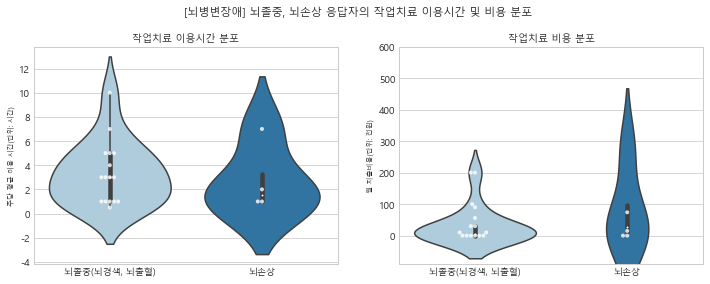

In [45]:
plt.style.use('seaborn-whitegrid')
plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(12, 4)

sns.violinplot(data = df.loc[df['작업치료-이용여부']==1].loc[df['작업치료-이용시간'] != 99], x='주된 진단명(1)', y='작업치료-이용시간', palette='Paired', ax=ax1)
sns.swarmplot(data = df.loc[df['작업치료-이용여부']==1].loc[df['작업치료-이용시간'] != 99], x='주된 진단명(1)', y='작업치료-이용시간', color="white", alpha=0.8, size=4, ax=ax1)

ax1.set_title('작업치료 이용시간 분포', size = 10)
ax1.set_xlabel('')
ax1.set_xticklabels(['뇌졸중(뇌경색, 뇌출혈)', '뇌손상'], size = 9)
ax1.set_ylabel('주당 평균 이용 시간(단위: 시간)', size = 7)

ax = sns.violinplot(data = df.loc[df['작업치료-이용여부']==1].loc[df['작업치료-비용'] != 9999], 
                    x='주된 진단명(1)', y='물리치료-비용', palette='Paired')
sns.swarmplot(data = df.loc[df['작업치료-이용여부']==1].loc[df['작업치료-비용'] != 9999],
              x='주된 진단명(1)', y='작업치료-비용', color="white", alpha=0.8, size=4)
ax.set_title('작업치료 비용 분포', size = 10)
ax.set_xlabel('')
ax.set_xticklabels(['뇌졸중(뇌경색, 뇌출혈)', '뇌손상'], size = 9)
ax.set_ylabel('월 지출비용(단위: 천원)', size = 7)
ax.set_ylim([-90, 600])

fig.suptitle('[뇌병변장애] 뇌졸중, 뇌손상 응답자의 작업치료 이용시간 및 비용 분포', fontsize=11, y = 1.02)
# plt.savefig("pyvisual/뇌병변장애/[뇌병변장애] 뇌졸중, 뇌손상 응답자의 작업치료 이용시간 및 비용 분포.png", dpi=300)
plt.show()

In [41]:
df.loc[df['작업치료-이용여부']==1].loc[df['주된 진단명(1)'] ==2][['작업치료-이용시간']].value_counts()

작업치료-이용시간
1.0          5
3.0          4
5.0          3
0.5          1
4.0          1
7.0          1
10.0         1
99.0         1
dtype: int64

In [42]:
pd.DataFrame(df.loc[df['작업치료-이용여부']==1].loc[df['주된 진단명(1)'] ==2][['작업치료-비용']].value_counts()).sort_values(by='작업치료-비용', ascending =False)

,0
작업치료-비용,
9999.0,2
200.0,2
100.0,1
90.0,1
56.0,1
30.0,2
10.0,2
0.0,6


In [43]:
df.loc[df['작업치료-이용여부']==1].loc[df['주된 진단명(1)'] ==3][['작업치료-이용시간']].value_counts()

작업치료-이용시간
1.0          2
2.0          1
7.0          1
dtype: int64

In [44]:
pd.DataFrame(df.loc[df['작업치료-이용여부']==1].loc[df['주된 진단명(1)'] ==3][['작업치료-비용']].value_counts()).sort_values(by='작업치료-비용', ascending =False)

,0
작업치료-비용,
74.0,1
15.0,1
0.0,2


### 지체장애

In [46]:
# (절단) (마비) (관절장애) 범주화
phy_data = raw_df[raw_df['지체장애여부']==1][(raw_df['가장 불편한부위']>=11)&(raw_df['가장 불편한부위']<=38)]

bins = [11, 21, 31]
phy_data['grp'] = np.digitize(phy_data['가장 불편한부위'], bins) # 범주화
phy_data.head()

<ipython-input-46-94a925281f09>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phy_data = raw_df[raw_df['지체장애여부']==1][(raw_df['가장 불편한부위']>=11)&(raw_df['가장 불편한부위']<=38)]


,조사표 종류,가구원 일련번호(장애인),가구원 일련번호(응답자),조사지역(시도),응답자 유형,대리응답이유,장애유형확인1,장애유형확인2,장애유형확인3,개인번호,...,"보호,간병비",재활기관이용료,통신비,"장애인보조기기 구입,유지비",부모사후 및 노후대비비,기타.4,월평균 총 추가비용,wg_p,ws_p,grp
0,2,1,1,21,NaN,NaN,1,NaN,NaN,1,...,0,0,0,0,0,0,0,444.377794,1.13207,3
1,2,1,1,21,NaN,NaN,1,NaN,NaN,1,...,0,0,0,0,0,0,0,444.377794,1.13207,1
2,2,1,1,21,NaN,NaN,1,NaN,NaN,1,...,0,0,0,0,0,0,0,444.377794,1.13207,3
3,2,2,2,21,NaN,NaN,1,NaN,NaN,2,...,0,0,0,0,0,0,28,444.377794,1.13207,3
8,2,3,3,21,NaN,NaN,1,NaN,NaN,3,...,0,0,0,0,0,0,43,444.377794,1.13207,3


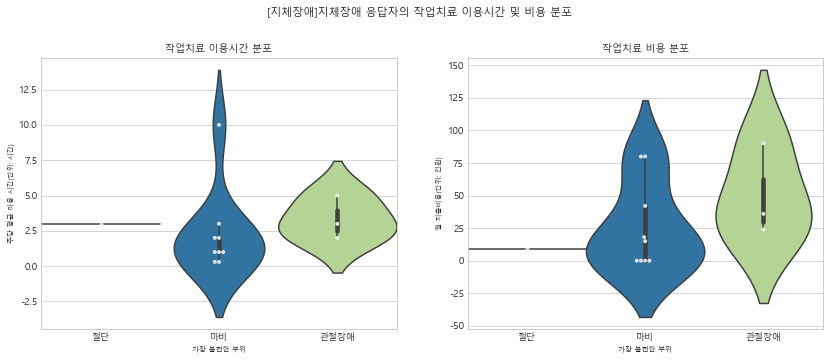

In [50]:
# 시각화
plt.style.use('seaborn-whitegrid')
plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(14, 5)

sns.violinplot(data = phy_data.loc[phy_data['작업치료-이용여부']==1].loc[phy_data['작업치료-이용시간'] != 99], 
               x='grp', y='작업치료-이용시간', palette='Paired', width=1, ax=ax1)
sns.swarmplot(data = phy_data.loc[phy_data['작업치료-이용여부']==1].loc[phy_data['작업치료-이용시간'] != 99], x='grp', y='작업치료-이용시간', color="white", alpha=0.8, size=4, ax=ax1)

ax1.set_title('작업치료 이용시간 분포', size = 10)
ax1.set_xlabel('가장 불편한 부위', size = 7)
ax1.set_xticklabels(['절단', '마비', '관절장애'], size = 9)
ax1.set_ylabel('주당 평균 이용 시간(단위: 시간)', size = 7)

sns.violinplot(data = phy_data.loc[phy_data['작업치료-이용여부']==1].loc[phy_data['작업치료-비용'] != 9999], 
               x='grp', y='작업치료-비용', palette='Paired', width=1, ax=ax2)
sns.swarmplot(data = phy_data.loc[phy_data['작업치료-이용여부']==1].loc[phy_data['작업치료-비용'] != 9999], x='grp', y='작업치료-비용', color="white", alpha=0.8, size=4, ax=ax2)
ax2.set_title('작업치료 비용 분포', size = 10)
ax2.set_xlabel('가장 불편한 부위', size = 7)
ax2.set_xticklabels(['절단', '마비', '관절장애'], size = 9)
ax2.set_ylabel('월 지출비용(단위: 천원)', size = 7)
# ax.set_ylim([-90, 600])

fig.suptitle('[지체장애]지체장애 응답자의 작업치료 이용시간 및 비용 분포', fontsize=11, y = 1.02)
# plt.savefig("pyvisual/지체장애/[지체장애]지체장애 응답자의 작업치료 이용시간 및 비용 분포.png", dpi=300)
plt.show()

---
## 재활치료서비스를 하나도 이용하지 않는 이유
### 뇌병변장애

In [104]:
# 데이터 추출
reason_df = pd.DataFrame(df[['재활치료서비스를 하나도 이용하지 않은 경우 이유']].loc[df['재활치료서비스를 하나도 이용하지 않은 경우 이유'] !=0].value_counts()).reset_index()

# 컬럼 값 변경
col_values = ['몰라서', '시설이 없어서', '믿지 못해서', '다른 방법이 있어서', '비용부담 때문에', '대기중이어서', '다닐 필요가 없어서', '접근하기 어려워서', '기타']

for i in range(len(reason_df)):
    reason_df.replace({'재활치료서비스를 하나도 이용하지 않은 경우 이유': i+1}, {'재활치료서비스를 하나도 이용하지 않은 경우 이유': col_values[i]}, inplace=True)
reason_df

,재활치료서비스를 하나도 이용하지 않은 경우 이유,0
0,다닐 필요가 없어서,142
1,접근하기 어려워서,103
2,비용부담 때문에,49
3,다른 방법이 있어서,27
4,시설이 없어서,18
5,믿지 못해서,12
6,기타,12
7,몰라서,3
8,대기중이어서,2


In [113]:
order_lst = reason_df['재활치료서비스를 하나도 이용하지 않은 경우 이유'].tolist()

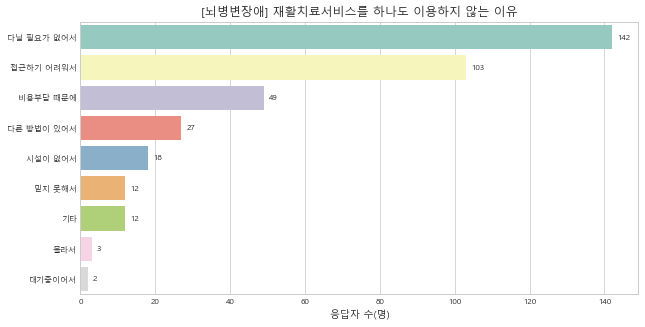

In [112]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)

splot = sns.barplot(data = reason_df, y='재활치료서비스를 하나도 이용하지 않은 경우 이유', x = 0,order = order_lst, palette='Set3')
ax.set_title('[뇌병변장애] 재활치료서비스를 하나도 이용하지 않는 이유', size = 12)
ax.set_xlabel('응답자 수(명)')
plt.yticks(size = 8)
plt.xticks(size = 8)
ax.set_ylabel('')

for p in splot.patches:
    ax.annotate("%.0f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center", size = 8)    

# plt.savefig('pyvisual/뇌병변장애/[뇌병변장애] 뇌병변장애 응답자의 재활치료서비스를 하나도 이용하지 않는 이유.png', dpi=300)
plt.show()

### 뇌졸중(뇌경색, 뇌출혈)

In [128]:
# 데이터 추출
reason_df = pd.DataFrame(df[['재활치료서비스를 하나도 이용하지 않은 경우 이유']].loc[df['재활치료서비스를 하나도 이용하지 않은 경우 이유'] !=0][df['주된 진단명(1)']==2].value_counts()).reset_index()

# 컬럼 값 변경
col_values = ['몰라서', '시설이 없어서', '믿지 못해서', '다른 방법이 있어서', '비용부담 때문에', '대기중이어서', '다닐 필요가 없어서', '접근하기 어려워서', '기타']

for i in range(len(reason_df)):
    reason_df.replace({'재활치료서비스를 하나도 이용하지 않은 경우 이유': i+1}, {'재활치료서비스를 하나도 이용하지 않은 경우 이유': col_values[i]}, inplace=True)
reason_df

<ipython-input-128-42139ce810ab>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  reason_df = pd.DataFrame(df[['재활치료서비스를 하나도 이용하지 않은 경우 이유']].loc[df['재활치료서비스를 하나도 이용하지 않은 경우 이유'] !=0][df['주된 진단명(1)']==2].value_counts()).reset_index()


,재활치료서비스를 하나도 이용하지 않은 경우 이유,0
0,다닐 필요가 없어서,116
1,접근하기 어려워서,86
2,비용부담 때문에,44
3,다른 방법이 있어서,23
4,시설이 없어서,16
5,믿지 못해서,11
6,기타,9
7,몰라서,2
8,대기중이어서,2


In [129]:
order_lst = reason_df['재활치료서비스를 하나도 이용하지 않은 경우 이유'].tolist()

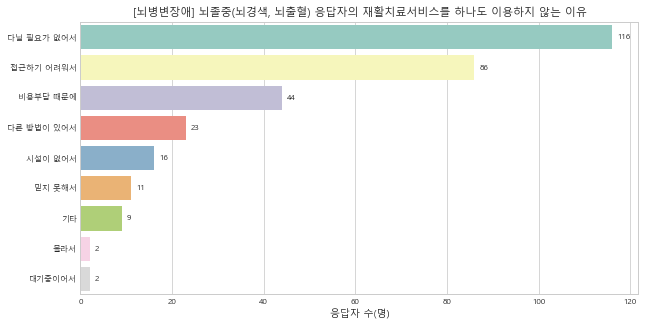

In [131]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)

splot = sns.barplot(data = reason_df, y='재활치료서비스를 하나도 이용하지 않은 경우 이유', x = 0,order = order_lst, palette='Set3')
ax.set_title('[뇌병변장애] 뇌졸중(뇌경색, 뇌출혈) 응답자의 재활치료서비스를 하나도 이용하지 않는 이유', size = 11)
ax.set_xlabel('응답자 수(명)')
plt.yticks(size = 8)
plt.xticks(size = 8)
ax.set_ylabel('')

for p in splot.patches:
    ax.annotate("%.0f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center", size = 8)    

# plt.savefig('pyvisual/뇌병변장애/[뇌병변장애] 뇌졸중(뇌경색, 뇌출혈) 응답자의 재활치료서비스를 하나도 이용하지 않는 이유.png', dpi=300)
plt.show()

### 뇌손상

In [136]:
# 데이터 추출
reason_df = pd.DataFrame(df[['재활치료서비스를 하나도 이용하지 않은 경우 이유']].loc[df['재활치료서비스를 하나도 이용하지 않은 경우 이유'] !=0][df['주된 진단명(1)']==3].value_counts()).reset_index()

reason_df.replace({'재활치료서비스를 하나도 이용하지 않은 경우 이유': 1}, {'재활치료서비스를 하나도 이용하지 않은 경우 이유': '몰라서'}, inplace=True)
reason_df.replace({'재활치료서비스를 하나도 이용하지 않은 경우 이유': 2}, {'재활치료서비스를 하나도 이용하지 않은 경우 이유': '시설이 없어서'}, inplace=True)
reason_df.replace({'재활치료서비스를 하나도 이용하지 않은 경우 이유': 3}, {'재활치료서비스를 하나도 이용하지 않은 경우 이유': '믿지 못해서'}, inplace=True)
reason_df.replace({'재활치료서비스를 하나도 이용하지 않은 경우 이유': 4}, {'재활치료서비스를 하나도 이용하지 않은 경우 이유': '다른 방법이 있어서'}, inplace=True)
reason_df.replace({'재활치료서비스를 하나도 이용하지 않은 경우 이유': 5}, {'재활치료서비스를 하나도 이용하지 않은 경우 이유': '비용부담 때문에'}, inplace=True)
reason_df.replace({'재활치료서비스를 하나도 이용하지 않은 경우 이유': 7}, {'재활치료서비스를 하나도 이용하지 않은 경우 이유': '다닐 필요가 없어서'}, inplace=True)
reason_df.replace({'재활치료서비스를 하나도 이용하지 않은 경우 이유': 8}, {'재활치료서비스를 하나도 이용하지 않은 경우 이유': '접근하기 어려워서'}, inplace=True)
reason_df.replace({'재활치료서비스를 하나도 이용하지 않은 경우 이유': 9}, {'재활치료서비스를 하나도 이용하지 않은 경우 이유': '기타'}, inplace=True)

reason_df

<ipython-input-136-7f6fe45be299>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  reason_df = pd.DataFrame(df[['재활치료서비스를 하나도 이용하지 않은 경우 이유']].loc[df['재활치료서비스를 하나도 이용하지 않은 경우 이유'] !=0][df['주된 진단명(1)']==3].value_counts()).reset_index()


,재활치료서비스를 하나도 이용하지 않은 경우 이유,0
0,다닐 필요가 없어서,26
1,접근하기 어려워서,17
2,비용부담 때문에,5
3,다른 방법이 있어서,4
4,기타,3
5,시설이 없어서,2
6,몰라서,1
7,믿지 못해서,1


In [137]:
order_lst = reason_df['재활치료서비스를 하나도 이용하지 않은 경우 이유'].tolist()

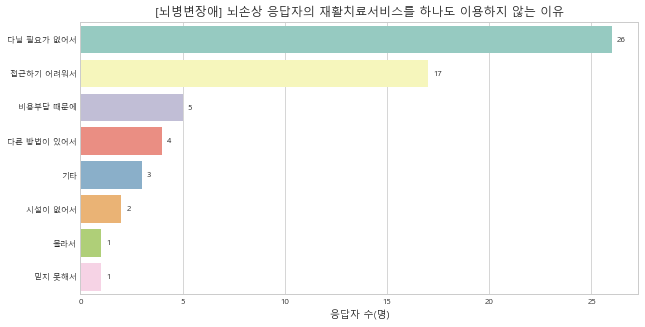

In [139]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)

splot = sns.barplot(data = reason_df, y='재활치료서비스를 하나도 이용하지 않은 경우 이유', x = 0, order = order_lst, palette='Set3')
ax.set_title('[뇌병변장애] 뇌손상 응답자의 재활치료서비스를 하나도 이용하지 않는 이유', size = 12)
ax.set_xlabel('응답자 수(명)')
plt.yticks(size = 8)
plt.xticks(size = 8)
ax.set_ylabel('')

for p in splot.patches:
    ax.annotate("%.0f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center", size = 8)    

# plt.savefig('pyvisual/뇌병변장애/[뇌병변장애] 뇌손상 응답자의 재활치료서비스를 하나도 이용하지 않는 이유.png', dpi=300)
plt.show()

---
---
## 뇌병변장애인 中 재활치료서비스를 하나도 이용하지 않는 응답자의 이유
#### *가설1. 재활치료가 아닌 건강관리를 위해 개인적으로 운동을 하고 있을 것이다.*

In [10]:
df[df['재활치료서비스를 하나도 이용하지 않은 경우 이유'] == 0][['건강관리운동']].value_counts()

건강관리운동
1         114
2          72
dtype: int64

운동을 하고 있는 응답자가 더 많지만 그렇지 않은 응답자와 차이가 크지 않다.

#### *가설2. 재활치료를 받을 만큼 일상생활에 남의 도움이 필요하지 않을 것이다.*

In [24]:
df[df['재활치료서비스를 하나도 이용하지 않은 경우 이유'] == 0][['일상생활시 남의도움 정도']].value_counts()

일상생활시 남의도움 정도
3                54
4                47
5                38
2                29
1                18
dtype: int64

상위 3개의 응답이 모두 도움이 필요하다는 응답으로 가설2를 받아들이기 힘듦.

In [16]:
df[df['재활치료서비스를 하나도 이용하지 않은 경우 이유'] == 0][['현재 일상생활 도와주는 이\n유무']].value_counts()

현재 일상생활 도와주는 이\n유무
1                     153
0                      18
2                      15
dtype: int64

In [18]:
df[df['재활치료서비스를 하나도 이용하지 않은 경우 이유'] == 0][['현재 도움 충분도']].value_counts()

현재 도움 충분도
2            67
3            59
0            33
4            14
1            13
dtype: int64

#### *가설3. 현재 건강 상태가 괜찮기 때문에 재활치료가 필요 없다.*

In [19]:
df[df['재활치료서비스를 하나도 이용하지 않은 경우 이유'] == 0][['EQ-5D (운동능력)']].value_counts()

EQ-5D (운동능력)
2               144
3                31
1                 7
0                 4
dtype: int64

In [26]:
df[df['재활치료서비스를 하나도 이용하지 않은 경우 이유'] == 0][['EQ-5D (자기관리)']].value_counts()

EQ-5D (자기관리)
2               88
3               48
1               46
0                4
dtype: int64

In [28]:
df[df['재활치료서비스를 하나도 이용하지 않은 경우 이유'] == 0][['EQ-5D (일상활동)']].value_counts()

EQ-5D (일상활동)
2               134
3                38
1                10
0                 4
dtype: int64

In [29]:
df[df['재활치료서비스를 하나도 이용하지 않은 경우 이유'] == 0][['EQ-5D (통증/불편)']].value_counts()

186

---
## 재활치료서비스를 하나도 이용하지 않는 이유
### 지체장애 中 절단(상지 절단, 하지 절단)

In [184]:
cut_high_reason = df1[df1['재활치료서비스를 하나도 이용하지 않은 경우 이유'] != 0][['재활치료서비스를 하나도 이용하지 않은 경우 이유', '가장 불편한 부위2']].loc[df1['가장 불편한 부위2'] == '[상지 절단]손목 미만(손등, 손가락)~어깨 이상']

# 컬럼 값 변경
col_values = ['몰라서', '시설이 없어서', '믿지 못해서', '다른 방법이 있어서', '비용부담 때문에', '대기중이어서', '다닐 필요가 없어서', '접근하기 어려워서', '기타']

for i in range(len(col_values)):
    cut_high_reason.replace({'재활치료서비스를 하나도 이용하지 않은 경우 이유': i+1}, {'재활치료서비스를 하나도 이용하지 않은 경우 이유': col_values[i]}, inplace=True)

cut_high_reason = pd.DataFrame(cut_high_reason.groupby('재활치료서비스를 하나도 이용하지 않은 경우 이유')['재활치료서비스를 하나도 이용하지 않은 경우 이유'].count()).add_suffix('_Count').reset_index()
cut_high_reason['pct'] = round(cut_high_reason['재활치료서비스를 하나도 이용하지 않은 경우 이유_Count'] / np.sum(cut_high_reason['재활치료서비스를 하나도 이용하지 않은 경우 이유_Count'])*100, 2 )
cut_high_reason

,재활치료서비스를 하나도 이용하지 않은 경우 이유,재활치료서비스를 하나도 이용하지 않은 경우 이유_Count,pct
0,기타,3,1.02
1,다닐 필요가 없어서,253,86.35
2,다른 방법이 있어서,4,1.37
3,대기중이어서,1,0.34
4,몰라서,2,0.68
5,믿지 못해서,2,0.68
6,비용부담 때문에,9,3.07
7,시설이 없어서,11,3.75
8,접근하기 어려워서,8,2.73


In [185]:
cut_low_reason = df1[df1['재활치료서비스를 하나도 이용하지 않은 경우 이유'] != 0][['재활치료서비스를 하나도 이용하지 않은 경우 이유', '가장 불편한 부위2']].loc[df1['가장 불편한 부위2'] == '[하지 절단]양쪽 발가락~엉덩이 이상']

for i in range(len(col_values)):
    cut_low_reason.replace({'재활치료서비스를 하나도 이용하지 않은 경우 이유': i+1}, {'재활치료서비스를 하나도 이용하지 않은 경우 이유': col_values[i]}, inplace=True)

cut_low_reason = pd.DataFrame(cut_low_reason.groupby('재활치료서비스를 하나도 이용하지 않은 경우 이유')['재활치료서비스를 하나도 이용하지 않은 경우 이유'].count()).add_suffix('_Count').reset_index()
cut_low_reason['pct'] = round(cut_low_reason['재활치료서비스를 하나도 이용하지 않은 경우 이유_Count'] / np.sum(cut_low_reason['재활치료서비스를 하나도 이용하지 않은 경우 이유_Count'])*100, 2 )
cut_low_reason

,재활치료서비스를 하나도 이용하지 않은 경우 이유,재활치료서비스를 하나도 이용하지 않은 경우 이유_Count,pct
0,기타,1,1.43
1,다닐 필요가 없어서,47,67.14
2,다른 방법이 있어서,7,10.00
3,몰라서,2,2.86
4,믿지 못해서,3,4.29
5,비용부담 때문에,5,7.14
6,시설이 없어서,2,2.86
7,접근하기 어려워서,3,4.29


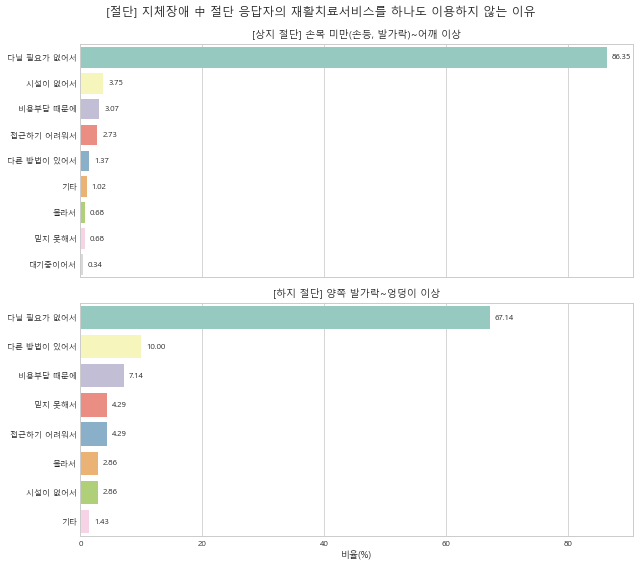

In [212]:
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, sharex=True)
fig.set_size_inches(9, 8)

## ax1
colist1 = cut_high_reason.sort_values(by='재활치료서비스를 하나도 이용하지 않은 경우 이유_Count', ascending=False)['재활치료서비스를 하나도 이용하지 않은 경우 이유'].tolist()

splot1 = sns.barplot(data = cut_high_reason, y = '재활치료서비스를 하나도 이용하지 않은 경우 이유', x='pct', order = colist1, palette='Set3', ax=ax1)
ax1.set_title('[상지 절단] 손목 미만(손등, 발가락)~어깨 이상', size = 10)
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.tick_params (axis = 'x', labelsize =8)
ax1.tick_params (axis = 'y', labelsize =8)

for p in splot1.patches:
    ax1.annotate("%.2f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center", size = 8)

## ax2
colist2 = cut_low_reason.sort_values(by='재활치료서비스를 하나도 이용하지 않은 경우 이유_Count', ascending=False)['재활치료서비스를 하나도 이용하지 않은 경우 이유'].tolist()

splot2 = sns.barplot(data = cut_low_reason, y = '재활치료서비스를 하나도 이용하지 않은 경우 이유', x='pct', order = colist2, palette='Set3', ax=ax2)
ax2.set_title('[하지 절단] 양쪽 발가락~엉덩이 이상', size = 10)
ax2.set_xlabel('비율(%)', size = 9)
ax2.set_ylabel('')
ax2.tick_params (axis = 'x', labelsize =8)
ax2.tick_params (axis = 'y', labelsize =8)

for p in splot2.patches:
    ax2.annotate("%.2f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center", size = 8)

plt.suptitle('[절단] 지체장애 中 절단 응답자의 재활치료서비스를 하나도 이용하지 않는 이유', size = 12)
plt.tight_layout()
# plt.savefig('pyvisual/지체장애/[절단]지체장애 中 절단 응답자의 재활치료서비스를 하나도 이용하지 않는 이유.png', dpi=300)
plt.show()

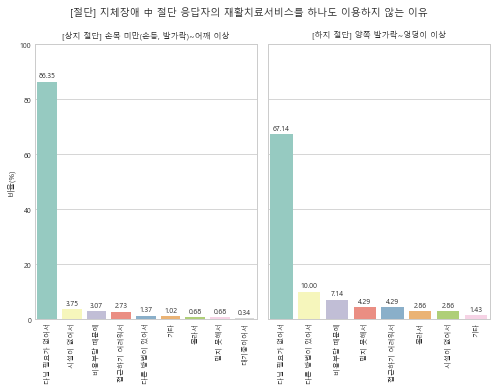

In [275]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, sharey=True)
fig.set_size_inches(7, 5.5)

## ax1
colist1 = cut_high_reason.sort_values(by='재활치료서비스를 하나도 이용하지 않은 경우 이유_Count', ascending=False)['재활치료서비스를 하나도 이용하지 않은 경우 이유'].tolist()

splot1 = sns.barplot(data = cut_high_reason, x = '재활치료서비스를 하나도 이용하지 않은 경우 이유', y='pct', order = colist1, palette='Set3', ax=ax1)
ax1.set_title('[상지 절단] 손목 미만(손등, 발가락)~어깨 이상', size = 8)
ax1.set_xlabel('')
ax1.set_ylabel('비율(%)', size = 8)
ax1.tick_params(axis = 'x', labelsize =7, labelrotation = 90)
ax1.tick_params(axis = 'y', labelsize =7)
ax1.set_ylim([0, 100])

for bar in splot1.patches: # value label 생성
    ax1.annotate("{:0.2f}".format(float(bar.get_height())), # 천단위 콤마 표시
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=7, xytext=(0, 6),
                   textcoords='offset points')

## ax2
colist2 = cut_low_reason.sort_values(by='재활치료서비스를 하나도 이용하지 않은 경우 이유_Count', ascending=False)['재활치료서비스를 하나도 이용하지 않은 경우 이유'].tolist()

splot2 = sns.barplot(data = cut_low_reason, x = '재활치료서비스를 하나도 이용하지 않은 경우 이유', y='pct', order = colist2, palette='Set3', ax=ax2)
ax2.set_title('[하지 절단] 양쪽 발가락~엉덩이 이상', size = 8)
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.tick_params(axis = 'x', labelsize = 7, labelrotation = 90)
ax2.tick_params(axis = 'y', labelsize = 7)
ax2.set_ylim([0, 100])

for bar in splot2.patches: # value label 생성
    ax2.annotate("{:0.2f}".format(float(bar.get_height())), # 천단위 콤마 표시
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=7, xytext=(0, 6),
                   textcoords='offset points')

plt.suptitle('[절단] 지체장애 中 절단 응답자의 재활치료서비스를 하나도 이용하지 않는 이유', size = 10)
plt.tight_layout()
plt.savefig('pyvisual/지체장애/[절단]지체장애 中 절단 응답자의 재활치료서비스를 하나도 이용하지 않는 이유.png', dpi=300)
plt.show()

### 지체장애 中 마비(상지 절단, 하지 절단)

In [213]:
df2['가장 불편한 부위2'].unique()

array(['[하지 마비]하지 한쪽 or 양쪽', '[상하지 마비]상하지 한쪽 or 양쪽 or 전신마비',
       '[상지 마비]상지 한쪽 or 양쪽'], dtype=object)

#### [상지 마비]상지 한쪽 or 양쪽

In [242]:
paralysis_top_reason = df2[df2['재활치료서비스를 하나도 이용하지 않은 경우 이유'] != 0][['재활치료서비스를 하나도 이용하지 않은 경우 이유', '가장 불편한 부위2']].loc[df2['가장 불편한 부위2'] == '[상지 마비]상지 한쪽 or 양쪽']

# 컬럼 값 변경
col_values = ['몰라서', '시설이 없어서', '믿지 못해서', '다른 방법이 있어서', '비용부담 때문에', '대기중이어서', '다닐 필요가 없어서', '접근하기 어려워서', '기타']

for i in range(len(col_values)):
    paralysis_top_reason.replace({'재활치료서비스를 하나도 이용하지 않은 경우 이유': i+1}, {'재활치료서비스를 하나도 이용하지 않은 경우 이유': col_values[i]}, inplace=True)

paralysis_top_reason = pd.DataFrame(paralysis_top_reason.groupby('재활치료서비스를 하나도 이용하지 않은 경우 이유')['재활치료서비스를 하나도 이용하지 않은 경우 이유'].count()).add_suffix('_Count').reset_index()
paralysis_top_reason['pct'] = round(paralysis_top_reason['재활치료서비스를 하나도 이용하지 않은 경우 이유_Count'] / np.sum(paralysis_top_reason['재활치료서비스를 하나도 이용하지 않은 경우 이유_Count'])*100, 2 )
paralysis_top_reason

,재활치료서비스를 하나도 이용하지 않은 경우 이유,재활치료서비스를 하나도 이용하지 않은 경우 이유_Count,pct
0,기타,1,1.75
1,다닐 필요가 없어서,42,73.68
2,다른 방법이 있어서,5,8.77
3,몰라서,1,1.75
4,믿지 못해서,2,3.51
5,비용부담 때문에,1,1.75
6,접근하기 어려워서,5,8.77


#### [상하지 마비]상하지 한쪽 or 양쪽 or 전신마비

In [243]:
paralysis_med_reason = df2[df2['재활치료서비스를 하나도 이용하지 않은 경우 이유'] != 0][['재활치료서비스를 하나도 이용하지 않은 경우 이유', '가장 불편한 부위2']].loc[df2['가장 불편한 부위2'] == '[상하지 마비]상하지 한쪽 or 양쪽 or 전신마비']

# 컬럼 값 변경
col_values = ['몰라서', '시설이 없어서', '믿지 못해서', '다른 방법이 있어서', '비용부담 때문에', '대기중이어서', '다닐 필요가 없어서', '접근하기 어려워서', '기타']

for i in range(len(col_values)):
    paralysis_med_reason.replace({'재활치료서비스를 하나도 이용하지 않은 경우 이유': i+1}, {'재활치료서비스를 하나도 이용하지 않은 경우 이유': col_values[i]}, inplace=True)

paralysis_med_reason = pd.DataFrame(paralysis_med_reason.groupby('재활치료서비스를 하나도 이용하지 않은 경우 이유')['재활치료서비스를 하나도 이용하지 않은 경우 이유'].count()).add_suffix('_Count').reset_index()
paralysis_med_reason['pct'] = round(paralysis_med_reason['재활치료서비스를 하나도 이용하지 않은 경우 이유_Count'] / np.sum(paralysis_med_reason['재활치료서비스를 하나도 이용하지 않은 경우 이유_Count'])*100, 2 )
paralysis_med_reason

,재활치료서비스를 하나도 이용하지 않은 경우 이유,재활치료서비스를 하나도 이용하지 않은 경우 이유_Count,pct
0,기타,1,2.44
1,다닐 필요가 없어서,19,46.34
2,다른 방법이 있어서,1,2.44
3,믿지 못해서,1,2.44
4,비용부담 때문에,5,12.20
5,시설이 없어서,2,4.88
6,접근하기 어려워서,12,29.27


#### [하지 마비]하지 한쪽 or 양쪽

In [244]:
cond1 = (df2['재활치료서비스를 하나도 이용하지 않은 경우 이유'] != 0) & (df2['재활치료서비스를 하나도 이용하지 않은 경우 이유'] != 99) & (df2['가장 불편한 부위2'] == '[하지 마비]하지 한쪽 or 양쪽')
paralysis_low_reason = df2.loc[cond1, ['재활치료서비스를 하나도 이용하지 않은 경우 이유', '가장 불편한 부위2']]

# 컬럼 값 변경
col_values = ['몰라서', '시설이 없어서', '믿지 못해서', '다른 방법이 있어서', '비용부담 때문에', '대기중이어서', '다닐 필요가 없어서', '접근하기 어려워서', '기타']

for i in range(len(col_values)):
    paralysis_low_reason.replace({'재활치료서비스를 하나도 이용하지 않은 경우 이유': i+1}, {'재활치료서비스를 하나도 이용하지 않은 경우 이유': col_values[i]}, inplace=True)

paralysis_low_reason = pd.DataFrame(paralysis_low_reason.groupby('재활치료서비스를 하나도 이용하지 않은 경우 이유')['재활치료서비스를 하나도 이용하지 않은 경우 이유'].count()).add_suffix('_Count').reset_index()
paralysis_low_reason['pct'] = round(paralysis_low_reason['재활치료서비스를 하나도 이용하지 않은 경우 이유_Count'] / np.sum(paralysis_low_reason['재활치료서비스를 하나도 이용하지 않은 경우 이유_Count'])*100, 2 )
paralysis_low_reason

,재활치료서비스를 하나도 이용하지 않은 경우 이유,재활치료서비스를 하나도 이용하지 않은 경우 이유_Count,pct
0,기타,5,2.24
1,다닐 필요가 없어서,136,60.99
2,다른 방법이 있어서,17,7.62
3,대기중이어서,1,0.45
4,몰라서,4,1.79
5,믿지 못해서,5,2.24
6,비용부담 때문에,17,7.62
7,시설이 없어서,6,2.69
8,접근하기 어려워서,32,14.35


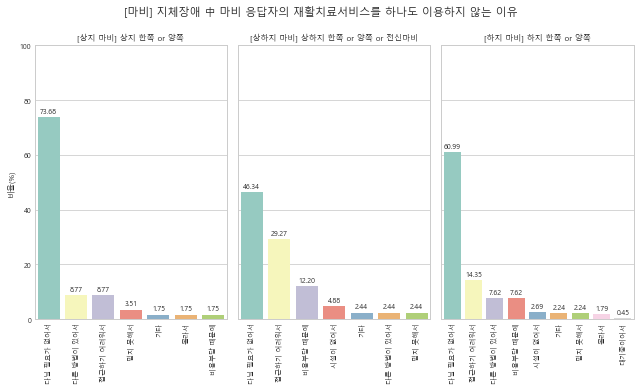

In [266]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, sharey=True)
fig.set_size_inches(9,5.5)

## ax1
colist1 = paralysis_top_reason.sort_values(by='재활치료서비스를 하나도 이용하지 않은 경우 이유_Count', 
                                           ascending=False)['재활치료서비스를 하나도 이용하지 않은 경우 이유'].tolist()

splot1 = sns.barplot(data = paralysis_top_reason, x = '재활치료서비스를 하나도 이용하지 않은 경우 이유', y='pct', order = colist1, palette='Set3', ax=ax1)
ax1.set_title('[상지 마비] 상지 한쪽 or 양쪽', size = 8)
ax1.set_ylabel('비율(%)', size =8)
ax1.set_xlabel('')
ax1.set_ylim([0, 100])
ax1.tick_params(axis = 'x', labelsize =7, labelrotation = 90)
ax1.tick_params(axis = 'y', labelsize =7)

for bar in splot1.patches: # value label 생성
    ax1.annotate("{:0.2f}".format(float(bar.get_height())), # 천단위 콤마 표시
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=7, xytext=(0, 6),
                   textcoords='offset points')

## ax2
colist2 = paralysis_med_reason.sort_values(by='재활치료서비스를 하나도 이용하지 않은 경우 이유_Count', 
                                           ascending=False)['재활치료서비스를 하나도 이용하지 않은 경우 이유'].tolist()

splot2 = sns.barplot(data = paralysis_med_reason, x = '재활치료서비스를 하나도 이용하지 않은 경우 이유', y='pct', order = colist2, palette='Set3', ax=ax2)
ax2.set_title('[상하지 마비] 상하지 한쪽 or 양쪽 or 전신마비', size = 8)
ax2.set_ylabel('')
ax2.set_xlabel('')
ax2.set_ylim([0, 100])
ax2.tick_params(axis = 'x', labelsize =7, labelrotation = 90)
ax2.tick_params(axis = 'y', labelsize =7)

for bar in splot2.patches: # value label 생성
    ax2.annotate("{:0.2f}".format(float(bar.get_height())), # 천단위 콤마 표시
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=7, xytext=(0, 6),
                   textcoords='offset points')

## ax3
colist3 = paralysis_low_reason.sort_values(by='재활치료서비스를 하나도 이용하지 않은 경우 이유_Count', 
                                           ascending=False)['재활치료서비스를 하나도 이용하지 않은 경우 이유'].tolist()

splot3 = sns.barplot(data = paralysis_low_reason, x = '재활치료서비스를 하나도 이용하지 않은 경우 이유', y='pct', order = colist3, palette='Set3', ax=ax3)
ax3.set_title('[하지 마비] 하지 한쪽 or 양쪽', size = 8)
ax3.set_ylabel('')
ax3.set_xlabel('')
ax3.set_ylim([0, 100])
ax3.tick_params(axis = 'x', labelsize =7, labelrotation = 90)
ax3.tick_params(axis = 'y', labelsize =7)

for bar in splot3.patches: # value label 생성
    ax3.annotate("{:0.2f}".format(float(bar.get_height())), # 천단위 콤마 표시
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=7, xytext=(0, 6),
                   textcoords='offset points')

plt.suptitle('[마비] 지체장애 中 마비 응답자의 재활치료서비스를 하나도 이용하지 않는 이유', size = 11)
plt.tight_layout()
plt.savefig('pyvisual/지체장애/[마비]지체장애 中 마비 응답자의 재활치료서비스를 하나도 이용하지 않는 이유.png', dpi=300)
plt.show()

In [12]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler, MinMaxScaler

data = df[['주된 진단명(1)', '성별', '생년\xa0', '장애등록연도', '장애등급', '만성질환 유무']].loc[df['주된 진단명(1)'] == 2]
data = data.rename(columns={'성별': 'gender', 
                            '생년\xa0': 'birth', 
                            '장애등급': 'grade', 
                            '장애등록연도': 'enroll_year', 
                            '만성질환 유무': 'y'})
data.head()

X = data.iloc[:, 1:5]
y = data.iloc[:, -1]
X, y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)
print('훈련 데이터 셋 개수: ', len(X_train), '개')
print('평가 데이터 셋 개수: ', len(X_test), '개')

model = SVC()
model.fit(X_train, y_train)

print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))